# 0: reduce memory and load data to colab

In [ ]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
!pip install kaggle 

In [ ]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"keremrkmez","key":"aae2929903bdfbf767cf421b005d66e5"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sobhanmoosavi/us-accidents

 97% 225M/232M [00:10<00:00, 18.6MB/s]
100% 232M/232M [00:11<00:00, 22.1MB/s]


In [ ]:
from zipfile import ZipFile 
file_name = "us-accidents.zip"

with ZipFile(file_name,'r') as zip_:
  zip_.extractall()
  print('Done')

Done


In [ ]:
import numpy as np
import pandas as pd
import time

In [ ]:
data_path = ("/content/US_Accidents_June20.csv")

In [ ]:
def reduce_mem(df):
    starttime = time.time()
    numerics = ['int32', 'int64', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if pd.isnull(c_min) or pd.isnull(c_max):
                continue
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    print('-- Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction),time spend:{:2.2f} min'.format(end_mem,
                                                                                                           100*(start_mem-end_mem)/start_mem,
                                                                                                           (time.time()-starttime)/60))
    return df

In [ ]:
df = reduce_mem(pd.read_csv(data_path))
df_copy = df.copy()

-- Mem. usage decreased to 807.55 Mb (19.9% reduction),time spend:0.01 min


# 1: Overwiev

In [ ]:
display(df)

ID    Source  ...  Nautical_Twilight  Astronomical_Twilight
0              A-1  MapQuest  ...              Night                  Night
1              A-2  MapQuest  ...              Night                    Day
2              A-3  MapQuest  ...                Day                    Day
3              A-4  MapQuest  ...                Day                    Day
4              A-5  MapQuest  ...                Day                    Day
...            ...       ...  ...                ...                    ...
3513612  A-3513776      Bing  ...                Day                    Day
3513613  A-3513777      Bing  ...                Day                    Day
3513614  A-3513778      Bing  ...                Day                    Day
3513615  A-3513779      Bing  ...                Day                    Day
3513616  A-3513780      Bing  ...                Day                    Day

[3513617 rows x 49 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float32
 3   Severity               int32  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float32
 7   Start_Lng              float32
 8   End_Lat                float32
 9   End_Lng                float32
 10  Distance(mi)           float32
 11  Description            object 
 12  Number                 float32
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
TypeOfVariables = pd.read_csv("//content/drive/My Drive/TypeOfVariables.csv")
TypeOfVariables.columns = ['Variables', 'TypeOfVariables']

TypeOfVariables

Variables    TypeOfVariables
0                  Source  Categoric-Nominal
1                     TMC  Categoric-Nominal
2                Severity  Categoric-Ordinal
3              Start_Time      Numeric-Ratio
4                End_Time      Numeric-Ratio
5               Start_Lat      Numeric-Ratio
6               Start_Lng      Numeric-Ratio
7                 End_Lat      Numeric-Ratio
8                 End_Lng      Numeric-Ratio
9            Distance(mi)      Numeric-Ratio
10            Description               Text
11                 Number  Categoric-Nominal
12                 Street  Categoric-Nominal
13                   Side  Categoric-Nominal
14                   City  Categoric-Nominal
15                 County  Categoric-Nominal
16                  State  Categoric-Nominal
17                Zipcode  Categoric-Nominal
18                Country  Categoric-Nominal
19               Timezone  Categoric-Nominal
20           Airport_Code  Categoric-Nominal
21      Weather_Timestamp  Categoric-Nominal
22         Temperature(F)   Numeric-Interval
23          Wind_Chill(F)   Numeric-Interval
24            Humidity(%)   Numeric-Interval
25           Pressure(in)   Numeric-Interval
26         Visibility(mi)      Numeric-Ratio
27         Wind_Direction  Categoric-Nominal
28        Wind_Speed(mph)   Numeric-Interval
29      Precipitation(in)      Numeric-Ratio
30      Weather_Condition  Categoric-Nominal
31                Amenity  Categoric-Nominal
32                   Bump  Categoric-Nominal
33               Crossing  Categoric-Nominal
34               Give_Way  Categoric-Nominal
35               Junction  Categoric-Nominal
36                No_Exit  Categoric-Nominal
37                Railway  Categoric-Nominal
38             Roundabout  Categoric-Nominal
39                Station  Categoric-Nominal
40                   Stop  Categoric-Nominal
41        Traffic_Calming  Categoric-Nominal
42         Traffic_Signal  Categoric-Nominal
43           Turning_Loop  Categoric-Nominal
44         Sunrise_Sunset  Categoric-Nominal
45         Civil_Twilight  Categoric-Nominal
46      Nautical_Twilight  Categoric-Nominal
47  Astronomical_Twilight  Categoric-Nominal

In [ ]:
df.isna().any()

ID                       False
Source                   False
TMC                       True
Severity                 False
Start_Time               False
End_Time                 False
Start_Lat                False
Start_Lng                False
End_Lat                   True
End_Lng                   True
Distance(mi)             False
Description               True
Number                    True
Street                   False
Side                     False
City                      True
County                   False
State                    False
Zipcode                   True
Country                  False
Timezone                  True
Airport_Code              True
Weather_Timestamp         True
Temperature(F)            True
Wind_Chill(F)             True
Humidity(%)               True
Pressure(in)              True
Visibility(mi)            True
Wind_Direction            True
Wind_Speed(mph)           True
Precipitation(in)         True
Weather_Condition         True
Amenity 

In [ ]:
df['Severity'].unique() #TARGET OLARAK KULLANACAGIMIZ DEGISKEN

array([3, 2, 1, 4], dtype=int32)

In [ ]:
df['Description'] 

0          Right lane blocked due to accident on I-70 Eas...
1          Accident on Brice Rd at Tussing Rd. Expect del...
2          Accident on OH-32 State Route 32 Westbound at ...
3          Accident on I-75 Southbound at Exits 52 52B US...
4          Accident on McEwen Rd at OH-725 Miamisburg Cen...
                                 ...                        
3513612                             At Market St - Accident.
3513613      At Camino Del Rio/Mission Center Rd - Accident.
3513614    At Glassell St/Grand Ave - Accident. in the ri...
3513615       At CA-90/Marina Fwy/Jefferson Blvd - Accident.
3513616                At Highland Ave/Arden Ave - Accident.
Name: Description, Length: 3513617, dtype: object

In [ ]:
df.describe().T

count         mean  ...          75%           max
TMC                2478818.0   206.128998  ...   201.000000  4.060000e+02
Severity           3513617.0     2.339929  ...     3.000000  4.000000e+00
Start_Lat          3513617.0    36.382648  ...    40.322170  4.900220e+01
Start_Lng          3513617.0   -96.490135  ...   -80.932991 -6.711317e+01
End_Lat            1034799.0    37.532249  ...    41.051392  4.907500e+01
End_Lng            1034799.0  -100.382965  ...   -82.101677 -6.710925e+01
Distance(mi)       3513617.0     0.281526  ...     0.010000  3.336300e+02
Number             1250753.0  5974.372559  ...  7098.000000  9.999997e+06
Temperature(F)     3447885.0    61.885952  ...    75.900002  1.706000e+02
Wind_Chill(F)      1645368.0    53.549561  ...    72.000000  1.150000e+02
Humidity(%)        3443930.0    65.102203  ...    84.000000  1.000000e+02
Pressure(in)       3457735.0    30.567234  ...    30.090000  5.774000e+01
Visibility(mi)     3437761.0     9.118745  ...    10.000000  1.400000e+02
Wind_Speed(mph)    3059008.0     8.232502  ...    11.500000  9.840000e+02
Precipitation(in)  1487743.0     0.015962  ...     0.000000  2.500000e+01

[15 rows x 8 columns]

In [ ]:
zzz = df.head(5)
zzz.T

0  ...                                                  4
ID                                                                   A-1  ...                                                A-5
Source                                                          MapQuest  ...                                           MapQuest
TMC                                                                  201  ...                                                201
Severity                                                               3  ...                                                  2
Start_Time                                           2016-02-08 05:46:00  ...                                2016-02-08 07:39:07
End_Time                                             2016-02-08 11:00:00  ...                                2016-02-08 08:09:07
Start_Lat                                                        39.8651  ...                                            39.6278
Start_Lng                                                       -84.0587  ...                                           -84.1884
End_Lat                                                              NaN  ...                                                NaN
End_Lng                                                              NaN  ...                                                NaN
Distance(mi)                                                        0.01  ...                                               0.01
Description            Right lane blocked due to accident on I-70 Eas...  ...  Accident on McEwen Rd at OH-725 Miamisburg Cen...
Number                                                               NaN  ...                                                NaN
Street                                                            I-70 E  ...                          Miamisburg Centerville Rd
Side                                                                   R  ...                                                  R
City                                                              Dayton  ...                                             Dayton
County                                                        Montgomery  ...                                         Montgomery
State                                                                 OH  ...                                                 OH
Zipcode                                                            45424  ...                                              45459
Country                                                               US  ...                                                 US
Timezone                                                      US/Eastern  ...                                         US/Eastern
Airport_Code                                                        KFFO  ...                                               KMGY
Weather_Timestamp                                    2016-02-08 05:58:00  ...                                2016-02-08 07:53:00
Temperature(F)                                                      36.9  ...                                                 36
Wind_Chill(F)                                                        NaN  ...                                               33.3
Humidity(%)                                                           91  ...                                                 89
Pressure(in)                                                       29.68  ...                                              29.65
Visibility(mi)                                                        10  ...                                                  6
Wind_Direction                                                      Calm  ...                                                 SW
Wind_Speed(mph)                                                      NaN  ...                                                3.5
Precipitation(in)                                                   0.02

In [ ]:
def dataframeInformations(df):
  totalEntryList=[]
  totalMissingValueList=[]
  missingValRateList=[]
  dataTypeList=[]
  uniqueValuesList=[]
  totalUniqueValList=[]
  variableNameList=[]
  
  for element in df.columns:
    missingValRate=round((df[element].isna().sum()/len(df[element]))*100,2) #to show correct decimal and float part of number.
    totalEntryList.append(len(df[element]))
    totalMissingValueList.append(df[element].isna().sum())
    missingValRateList.append(missingValRate)
    dataTypeList.append(df[element].dtype)
    uniqueValuesList.append(list(df[element].unique()))
    totalUniqueValList.append(len(df[element].unique()))
    variableNameList.append(element)
  #create a dataframe to show all informations together
  dataInfoDf=pd.DataFrame({'Variable':variableNameList,'#_Total_Entry':totalEntryList,\
                           '#_Missing_Value':totalMissingValueList,'%_Missing_Value':missingValRateList,\
                           'Data_Type':dataTypeList,'Unique_Values':uniqueValuesList,\
                           '#_Uniques_Values':totalUniqueValList})
  return dataInfoDf.sort_values(by="Variable")

In [ ]:
dataInfo=dataframeInformations(df)
variableList=[element for element in dataInfo['Variable'] ]
dataInfo=dataInfo.set_index('Variable')
dataInfo

#_Total_Entry  ...  #_Uniques_Values
Variable                              ...                  
Airport_Code                 3513617  ...              2002
Amenity                      3513617  ...                 2
Astronomical_Twilight        3513617  ...                 3
Bump                         3513617  ...                 2
City                         3513617  ...             11896
Civil_Twilight               3513617  ...                 3
Country                      3513617  ...                 1
County                       3513617  ...              1724
Crossing                     3513617  ...                 2
Description                  3513617  ...           1780093
Distance(mi)                 3513617  ...             12323
End_Lat                      3513617  ...            357651
End_Lng                      3513617  ...            356854
End_Time                     3513617  ...           3246120
Give_Way                     3513617  ...                 2
Humidity(%)                  3513617  ...               101
ID                           3513617  ...           3513617
Junction                     3513617  ...                 2
Nautical_Twilight            3513617  ...                 3
No_Exit                      3513617  ...                 2
Number                       3513617  ...             40366
Precipitation(in)            3513617  ...               262
Pressure(in)                 3513617  ...              1023
Railway                      3513617  ...                 2
Roundabout                   3513617  ...                 2
Severity                     3513617  ...                 4
Side                         3513617  ...                 3
Source                       3513617  ...                 3
Start_Lat                    3513617  ...           1031724
Start_Lng                    3513617  ...            990344
Start_Time                   3513617  ...           3200042
State                        3513617  ...                49
Station                      3513617  ...                 2
Stop                         3513617  ...                 2
Street                       3513617  ...            176262
Sunrise_Sunset               3513617  ...                 3
TMC                          3513617  ...                22
Temperature(F)               3513617  ...               832
Timezone                     3513617  ...                 5
Traffic_Calming              3513617  ...                 2
Traffic_Signal               3513617  ...                 2
Turning_Loop                 3513617  ...                 1
Visibility(mi)               3513617  ...                86
Weather_Condition            3513617  ...               128
Weather_Timestamp            3513617  ...            546087
Wind_Chill(F)                3513617  ...               975
Wind_Direction               3513617  ...                25
Wind_Speed(mph)              3513617  ...               161
Zipcode                      3513617  ...            418781

[49 rows x 6 columns]

# 2: Preprocessing                     w| data visualization
# 3: Exploratary Data Analysis         w| data visualization
# 4: Feature Engineering               w| data visualization
# 5: Model Oncesi Islemler             w| data visualization 

In [ ]:
df.dropna(axis=0, how='all', inplace=True) # boş satırları düşürdük

In [ ]:
df['Severity'].isnull().sum()

0

In [ ]:
df = df[df['Severity'].notnull()]

In [ ]:
print("Unique count of categorical features:")
for i in df.columns:
    if type(i)!=np.number:
      print(i,df[i].unique().size)

Unique count of categorical features:
ID 3513617
Source 3
TMC 22
Severity 4
Start_Time 3200042
End_Time 3246120
Start_Lat 1031724
Start_Lng 990344
End_Lat 357651
End_Lng 356854
Distance(mi) 12323
Description 1780093
Number 40366
Street 176262
Side 3
City 11896
County 1724
State 49
Zipcode 418781
Country 1
Timezone 5
Airport_Code 2002
Weather_Timestamp 546087
Temperature(F) 832
Wind_Chill(F) 975
Humidity(%) 101
Pressure(in) 1023
Visibility(mi) 86
Wind_Direction 25
Wind_Speed(mph) 161
Precipitation(in) 262
Weather_Condition 128
Amenity 2
Bump 2
Crossing 2
Give_Way 2
Junction 2
No_Exit 2
Railway 2
Roundabout 2
Station 2
Stop 2
Traffic_Calming 2
Traffic_Signal 2
Turning_Loop 1
Sunrise_Sunset 3
Civil_Twilight 3
Nautical_Twilight 3
Astronomical_Twilight 3


In [ ]:
len(df['ID'])==df['ID'].unique().size 

True

In [ ]:
df.drop('ID',axis=1,inplace=True)

In [ ]:
df.drop(['Country','Turning_Loop'], axis=1, inplace=True) # tek tür kategoriye sahip kategorik değişken oldukları için eğiticilikleri yok

In [ ]:
empty_cols = [col for col in df.columns if df[col].isnull().all()] # boş sütunları silmek için fakat boş sütun yokmuş

print(empty_cols)

df.drop(empty_cols,
        axis=1,
        inplace=True)

[]


100%|██████████| 29174/29174 [00:00<00:00, 241883.73it/s]


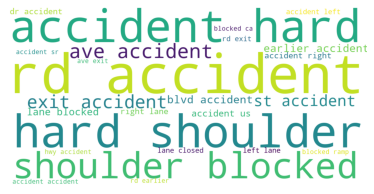

100%|██████████| 2373210/2373210 [00:10<00:00, 223942.27it/s]


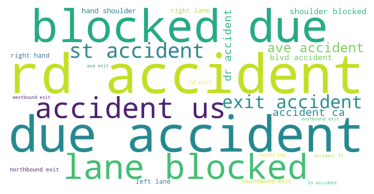

100%|██████████| 998913/998913 [00:05<00:00, 177832.26it/s]


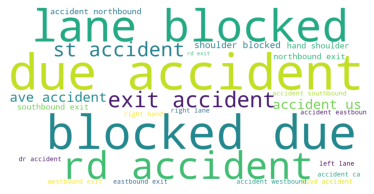

100%|██████████| 112320/112320 [00:00<00:00, 186337.35it/s]


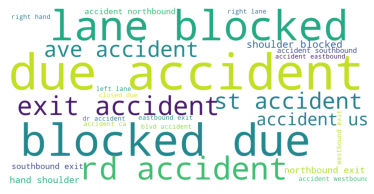

In [ ]:
from tqdm import tqdm                           
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 


comment_words = '' 
stopwords = set(STOPWORDS) 

for i in range(1,5):
    for val in tqdm(df[df['Severity']==i].Description): 

        val = str(val) 

        tokens = val.split() 

        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
      
        comment_words += " ".join(tokens)+" "
  
    wordcloud = WordCloud(width=400,height=200,random_state=101, max_font_size=450,
                 min_font_size=1,stopwords=stopwords,background_color="white",
                 scale=3,max_words=25,collocations=True).generate(comment_words) 
                       
    plt.figure(figsize = (5, 5), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
  
    plt.show()

In [ ]:
df['Description'].unique().size 

1780093

In [ ]:
#df.drop(['Description'],axis=1,inplace=True)

In [ ]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors = 'coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors = 'coerce')
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'], errors = 'coerce')

In [ ]:
(df.Weather_Timestamp - df.Start_Time).mean() , (df.Weather_Timestamp - df.Start_Time).median() # hava durumu gözlem kayıdı ile kaza kayıdı saatlerinin farklıca tutulmasına gerek yok zaten hemen hemen aynılar

(Timedelta('0 days 00:00:31.737637214'), Timedelta('-1 days +23:59:56'))

In [ ]:
df.drop(['Weather_Timestamp'],axis=1,inplace=True)

In [ ]:
df['Year'] = df['Start_Time'].dt.year
nmonth = df['Start_Time'].dt.month
df['Month'] = nmonth
df['Weekday']= df['Start_Time'].dt.weekday
days_each_month = np.cumsum(np.array([0,31,28,31,30,31,30,31,31,30,31,30,31]))
nday = [days_each_month[arg-1] for arg in nmonth.values]
nday = nday + df["Start_Time"].dt.day.values
df['Day'] = nday
df['Hour'] = df['Start_Time'].dt.hour
df['Minute']=df['Hour']*60.0+df["Start_Time"].dt.minute

In [ ]:
df.loc[:5,['Start_Time', 'Year', 'Month', 'Weekday', 'Day', 'Hour', 'Minute']] # day yılda , minute günde bazlıdır

Start_Time  Year  Month  Weekday  Day  Hour  Minute
0 2016-02-08 05:46:00  2016      2        0   39     5   346.0
1 2016-02-08 06:07:59  2016      2        0   39     6   367.0
2 2016-02-08 06:49:27  2016      2        0   39     6   409.0
3 2016-02-08 07:23:34  2016      2        0   39     7   443.0
4 2016-02-08 07:39:07  2016      2        0   39     7   459.0
5 2016-02-08 07:44:26  2016      2        0   39     7   464.0

In [ ]:
df['Duration'] = round((df['End_Time']- df['Start_Time'])/np.timedelta64(1,'m'))

In [ ]:
df[df['Duration']<=0] = np.nan

In [ ]:
df.drop(['Start_Time','End_Time','End_Lat','End_Lng'],axis=1,inplace=True) 

In [ ]:
df['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

In [ ]:
df['Clear'] = np.where(df['Weather_Condition'].str.contains('Clear', case=False, na = False), 1, 0)
df['Cloud'] = np.where(df['Weather_Condition'].str.contains('Cloud|Overcast', case=False, na = False), 1, 0)
df['Rain'] = np.where(df['Weather_Condition'].str.contains('Rain|storm', case=False, na = False), 1, 0)
df['Heavy_Rain'] = np.where(df['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', case=False, na = False), 1, 0)
df['Snow'] = np.where(df['Weather_Condition'].str.contains('Snow|Sleet|Ice', case=False, na = False), 1, 0)
df['Heavy_Snow'] = np.where(df['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na = False), 1, 0)
df['Fog'] = np.where(df['Weather_Condition'].str.contains('Fog', case=False, na = False), 1, 0)
df['Hail'] = np.where(df['Weather_Condition'].str.contains('Hail', case=False, na = False), 1, 0)
df['Drizzle'] = np.where(df['Weather_Condition'].str.contains('Drizzle', case=False, na = False), 1, 0)
df['Misc_Weather_Disturbances'] = np.where(df['Weather_Condition'].str.contains('Volcanic|Sand|Dust|Tornado|Whirls', case=False, na = False), 1, 0)

In [ ]:
df['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

In [ ]:
df['Weather_Condition'] = df['Weather_Condition'].mask(df['Weather_Condition'].str.contains('Clear|Fair',na=False), 'Clear')
df['Weather_Condition'] = df['Weather_Condition'].mask(df['Weather_Condition'].str.contains('Cloud|Overcast',na=False), 'Cloud')
df['Weather_Condition'] = df['Weather_Condition'].mask(df['Weather_Condition'].str.contains('Rain|storm|T-Storm|Thunder',na=False), 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].mask(df['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms|Vicinity',na=False), 'Heavy_Rain')
df['Weather_Condition'] = df['Weather_Condition'].mask(df['Weather_Condition'].str.contains('Snow|Sleet|Ice',na=False), 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].mask(df['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls',na=False), 'Heavy_Snow')
df['Weather_Condition'] = df['Weather_Condition'].mask(df['Weather_Condition'].str.contains('Fog|Haze|Mist|Smoke|Light Haze',na=False), 'Fog')
df['Weather_Condition'] = df['Weather_Condition'].mask(df['Weather_Condition'].str.contains('Hail',na=False), 'Hail')
df['Weather_Condition'] = df['Weather_Condition'].mask(df['Weather_Condition'].str.contains('Drizzle',na=False), 'Drizzle')
df['Weather_Condition'] = df['Weather_Condition'].mask(df['Weather_Condition'].str.contains('Volcanic|Sand|Dust|Tornado|Whirls',na=False), 'Misc Weather Disturbances')

In [ ]:
df['Weather_Condition'].unique()

array(['Rain', 'Cloud', 'Snow', 'Fog', 'Clear', 'Drizzle', nan,
       'Misc Weather Disturbances', 'Hail', 'Heavy_Rain', 'Heavy_Snow',
       'N/A Precipitation', 'Wintry Mix', 'Wintry Mix / Windy'],
      dtype=object)

In [ ]:
df[(df['Weather_Condition']=='N/A Precipitation')] = np.nan
df[(df['Weather_Condition']=='Wintry Mix')] = np.nan
df[(df['Weather_Condition']=='Wintry Mix / Windy')] = np.nan

In [ ]:
df['Weather_Condition'].unique()     

array(['Rain', 'Cloud', 'Snow', 'Fog', 'Clear', 'Drizzle', nan,
       'Misc Weather Disturbances', 'Hail', 'Heavy_Rain', 'Heavy_Snow'],
      dtype=object)

In [ ]:
df['Wind_Direction'].unique()

array(['Calm', 'SW', 'SSW', 'WSW', 'WNW', 'NW', 'West', 'NNW', 'NNE',
       'South', 'North', 'Variable', 'SE', 'SSE', 'ESE', 'East', 'NE',
       'ENE', 'E', 'W', nan, 'S', 'VAR', 'CALM', 'N'], dtype=object)

In [ ]:
df.loc[df['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
df.loc[(df['Wind_Direction']=='West')|(df['Wind_Direction']=='WSW')|(df['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
df.loc[(df['Wind_Direction']=='South')|(df['Wind_Direction']=='SSW')|(df['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
df.loc[(df['Wind_Direction']=='North')|(df['Wind_Direction']=='NNW')|(df['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
df.loc[(df['Wind_Direction']=='East')|(df['Wind_Direction']=='ESE')|(df['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
df.loc[(df['Wind_Direction']=='VAR')|(df['Wind_Direction']=='Variable'),'Wind_Direction'] = 'Variable'

In [ ]:
df['Wind_Direction'].unique() 

array(['CALM', 'SW', 'S', 'W', 'NW', 'N', 'Variable', 'SE', 'E', 'NE',
       nan], dtype=object)

In [ ]:
len(df['Street'].unique()) , len(df['Street'].notna()) 

(176205, 3513617)

In [ ]:
df['Street'].unique()[:200]

array(['I-70 E', 'Brice Rd', 'State Route 32', 'I-75 S',
       'Miamisburg Centerville Rd', 'Westerville Rd', 'N Woodward Ave',
       'N Main St', 'Notre Dame Ave', 'Outerbelt S', 'Watervliet Ave',
       'Salem Ave', 'E Broad St', 'Glencoe Ave', 'S James H McGee Blvd',
       'Delphos Ave', 'Rubicon St', 'W Hillcrest Ave', 'Brookhill Dr',
       'Princeton Dr', 'Springboro Pike', 'North Fwy S', 'Hoover Ave',
       'Sportsman Club Rd', 'Irving Ave', 'W Helena St', 'Litchfield Ave',
       'E 4th St', 'Frantz Rd', 'Bellefontaine Rd', 'Outerbelt N',
       'Olentangy Fwy N', 'Olentangy Fwy S', 'S Main St', 'Diley Rd',
       'Kiser St', 'Stelzer Rd', 'Monroe Rd', 'Air City Ave',
       'S State Route 72', 'Benchwood Rd', 'East Fwy W', 'Kenny Rd',
       'S Hamilton Rd', 'Brandt St', 'Riverside Dr', 'Wood St',
       'Dearborn Ave', 'Brown St', 'US-35 E', '5 Oaks Ave',
       'N State Route 42', 'Clearcreek Rd', 'Columbus Lancaster Rd NW',
       'I-75 N', 'Wilmington Rd', 'Outerbelt S

In [ ]:
def location(street):                          
    if 'I-' in str(street) or 'Hwy' in str(street) or 'Highway' in str(street):
        return 1                                
    else:                                       
        return 0

df['Highway'] = df['Street'].apply(location)

In [ ]:
df['Highway'].value_counts(normalize=True)

0    0.697312
1    0.302688
Name: Highway, dtype: float64

In [ ]:
import re
from collections import Counter
st_type =' '.join(df['Street'].dropna().unique().tolist()) 
st_type = re.split(" |-", st_type) 
st_type = [x[0] for x in Counter(st_type).most_common(40)] 
print('the 40 most common words')
print(st_type) 

the 40 most common words
['Rd', '', 'Dr', 'St', 'Ave', 'N', 'S', 'E', 'W', 'Ln', 'Blvd', 'Highway', 'Way', 'Ct', 'State', 'Hwy', 'NE', 'Pkwy', 'SW', 'Pl', 'SE', 'NW', 'Road', 'Old', 'Cir', 'Route', 'US', 'Creek', 'Hill', 'Park', 'County', 'Lake', 'Trl', 'Valley', 'Ridge', 'Mill', 'River', 'Pike', 'Oak', 'Ter']


In [ ]:
selected_st_type_for_featureGen = [' Rd',' St',' Dr',' Ave',' Blvd',' Road'] 

In [ ]:
from tqdm import tqdm
for i in tqdm(selected_st_type_for_featureGen):         
  df[i.strip()] = np.where(df['Street'].str.contains(i, case=True, na = False), 1, 0)

100%|██████████| 6/6 [00:10<00:00,  1.67s/it]


In [ ]:
df.drop(['Number'],axis=1,inplace=True) 

In [ ]:
#binning
#Define bins for time (24 hour time) 0 to 6, 6-12, 12-18,18-24
timeBins=[-1,6,12,18,24]
tBin_names=['Early Morning','Morning','Afternoon','Evening']
df['Time_Of_Day']=pd.cut(df['Hour'],timeBins,labels=tBin_names)

In [ ]:
#binning
#Define bins for Season (Months) 0 to 2, 2-5, 5-8,8-11,11-12
seasonBins=[-1,2,5,8,11,12]
sBin_names=['Winter','Spring','Summer','Autumn','Winter']
df['Season']=pd.cut(df['Month'],seasonBins,labels=sBin_names,ordered=False)

In [ ]:
#Define bins for Day_type -1(Mon) to 4(Fri),4(Fri)-6(Sun)
seasonBins=[-1,4,6]
sBin_names=['Weekday','Weekend']
df['Day_Type']=pd.cut(df['Weekday'],seasonBins,labels=sBin_names,ordered=False)
df.tail(5)

Source  TMC  Severity  Start_Lat  ...  Road  Time_Of_Day  Season Day_Type
3513612   Bing  NaN       2.0  34.002480  ...     0    Afternoon  Summer  Weekday
3513613   Bing  NaN       2.0  32.766960  ...     0      Evening  Summer  Weekday
3513614   Bing  NaN       2.0  33.775452  ...     0      Evening  Summer  Weekday
3513615   Bing  NaN       2.0  33.992458  ...     0      Evening  Summer  Weekday
3513616   Bing  NaN       2.0  34.133930  ...     0    Afternoon  Summer  Weekday

[5 rows x 67 columns]

In [ ]:
df.drop(['Civil_Twilight','Nautical_Twilight','Astronomical_Twilight','Sunrise_Sunset'],axis=1,inplace=True) 

In [ ]:
df['TMC'].value_counts()

201.0    2079240
241.0     249715
245.0      40325
229.0      22930
203.0      17639
222.0      13152
244.0      12178
406.0      11100
246.0       7114
343.0       6923
202.0       6293
247.0       4775
236.0       2121
206.0       1274
248.0       1025
339.0        911
341.0        587
336.0         89
200.0         66
239.0         54
351.0          6
Name: TMC, dtype: int64

In [ ]:
TMC_codes=[201,241,245,229,203,222,244,406,246,343,202,247,236,206,248,339,341,336,200,239,351]
TMC_namesdescriptions={"Traffic Message Channel (TMC) Description":["Accident(s)","Accident(s). Right lane blocked","(Q) accident(s). Two lanes blocked",
           "(Q) accident(s). Slow traffic","multi-vehicle accident","(Q) accident(s). Queuing traffic","(Q) accident(s). Hard shoulder blocked","(Q th) entry slip road closed","	(Q) accident(s). Three lanes blocked","(Q) earlier accident(s)","(Q) serious accident(s)","accident. Delays (Q)","(Q) accident(s). Heavy traffic","	(Q) fuel spillage accident(s)","accident. Delays (Q) expected","(Q) jackknifed trailer(s)","(Q) jackknifed articulated lorr(y/ies)","(Q) oil spillage accident(s)","multi vehicle pile up. Delays (Q)","(Q) accident(s). Traffic building up","(Q) accident(s) in roadworks area"]}

df_descriptions=pd.DataFrame(TMC_namesdescriptions,TMC_codes)
display(df_descriptions)

Traffic Message Channel (TMC) Description
201                               Accident(s)
241           Accident(s). Right lane blocked
245        (Q) accident(s). Two lanes blocked
229             (Q) accident(s). Slow traffic
203                    multi-vehicle accident
222          (Q) accident(s). Queuing traffic
244    (Q) accident(s). Hard shoulder blocked
406             (Q th) entry slip road closed
246    \t(Q) accident(s). Three lanes blocked
343                   (Q) earlier accident(s)
202                   (Q) serious accident(s)
247                      accident. Delays (Q)
236            (Q) accident(s). Heavy traffic
206           \t(Q) fuel spillage accident(s)
248             accident. Delays (Q) expected
339                 (Q) jackknifed trailer(s)
341    (Q) jackknifed articulated lorr(y/ies)
336              (Q) oil spillage accident(s)
200         multi vehicle pile up. Delays (Q)
239      (Q) accident(s). Traffic building up
351         (Q) accident(s) in roadworks area

In [ ]:
df_sev4tmc = (df[df['Severity'] == 4].groupby(['TMC']).size() / df.groupby(['TMC']).size()).reset_index(name='Percentage of having severity4 records for each tmc code')
df_sev4tmc.index = df_sev4tmc['TMC']
df_sev4tmc.drop('TMC',axis=1,inplace=True)
df_sev4tmc['Count'] = df.groupby(['TMC']).size()
df_sev4tmc['Count*PercentageOfHaving'] = df_sev4tmc['Percentage of having severity4 records for each tmc code'] * df_sev4tmc['Count']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df_sev4tmc)
df_sev4tmc['Count*PercentageOfHaving'] = scaled[:,2]
df_sev4tmc.sort_values('Percentage of having severity4 records for each tmc code',ascending=False)

Percentage of having severity4 records for each tmc code  ...  Count*PercentageOfHaving
TMC                                                              ...                          
343.0                                           0.081612         ...                  0.224657
341.0                                           0.052811         ...                 -0.357261
339.0                                           0.042810         ...                 -0.348543
248.0                                           0.027317         ...                 -0.360530
246.0                                           0.017712         ...                 -0.253736
200.0                                           0.015152         ...                 -0.389953
202.0                                           0.013348         ...                 -0.299505
406.0                                           0.012703         ...                 -0.237390
336.0                                           0.011236         ...                 -0.389953
245.0                                           0.008679         ...                 -0.009636
222.0                                           0.008136         ...                 -0.274441
236.0                                           0.006601         ...                 -0.375786
203.0                                           0.006520         ...                 -0.265723
206.0                                           0.005495         ...                 -0.383415
247.0                                           0.005026         ...                 -0.364889
241.0                                           0.003965         ...                  0.687795
244.0                                           0.003942         ...                 -0.338735
201.0                                           0.001980         ...                  4.095395
229.0                                           0.001308         ...                 -0.358351
239.0                                                NaN         ...                       NaN
351.0                                                NaN         ...                       NaN

[21 rows x 3 columns]

In [ ]:
tmc_frame = df_descriptions.join(df_sev4tmc)
tmc_frame.sort_values('Percentage of having severity4 records for each tmc code',ascending=False)

Traffic Message Channel (TMC) Description  ...  Count*PercentageOfHaving
343                   (Q) earlier accident(s)  ...                  0.224657
341    (Q) jackknifed articulated lorr(y/ies)  ...                 -0.357261
339                 (Q) jackknifed trailer(s)  ...                 -0.348543
248             accident. Delays (Q) expected  ...                 -0.360530
246    \t(Q) accident(s). Three lanes blocked  ...                 -0.253736
200         multi vehicle pile up. Delays (Q)  ...                 -0.389953
202                   (Q) serious accident(s)  ...                 -0.299505
406             (Q th) entry slip road closed  ...                 -0.237390
336              (Q) oil spillage accident(s)  ...                 -0.389953
245        (Q) accident(s). Two lanes blocked  ...                 -0.009636
222          (Q) accident(s). Queuing traffic  ...                 -0.274441
236            (Q) accident(s). Heavy traffic  ...                 -0.375786
203                    multi-vehicle accident  ...                 -0.265723
206           \t(Q) fuel spillage accident(s)  ...                 -0.383415
247                      accident. Delays (Q)  ...                 -0.364889
241           Accident(s). Right lane blocked  ...                  0.687795
244    (Q) accident(s). Hard shoulder blocked  ...                 -0.338735
201                               Accident(s)  ...                  4.095395
229             (Q) accident(s). Slow traffic  ...                 -0.358351
239      (Q) accident(s). Traffic building up  ...                       NaN
351         (Q) accident(s) in roadworks area  ...                       NaN

[21 rows x 4 columns]

In [ ]:
categorical_datas = ['Severity','Source','TMC','Street','Side','City','County','State','Zipcode','Timezone','Airport_Code','Wind_Direction','Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Clear','Cloud','Rain','Heavy_Rain','Snow','Heavy_Snow','Fog','Hail','Drizzle','Misc_Weather_Disturbances','Highway','Rd','St','Dr','Ave','Blvd','Road','Time_Of_Day','Season','Day_Type','Month','Weekday','Day','Hour','Minute','Year']
numerical_datas = ['Start_Lat','Start_Lng','Distance(mi)','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Duration']

In [ ]:
df[categorical_datas] = df[categorical_datas].apply(lambda x: x.astype('category'))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3513617 entries, 0 to 3513616
Data columns (total 63 columns):
 #   Column                     Dtype   
---  ------                     -----   
 0   Source                     category
 1   TMC                        category
 2   Severity                   category
 3   Start_Lat                  float32 
 4   Start_Lng                  float32 
 5   Distance(mi)               float32 
 6   Description                object  
 7   Street                     category
 8   Side                       category
 9   City                       category
 10  County                     category
 11  State                      category
 12  Zipcode                    category
 13  Timezone                   category
 14  Airport_Code               category
 15  Temperature(F)             float32 
 16  Wind_Chill(F)              float32 
 17  Humidity(%)                float32 
 18  Pressure(in)               float32 
 19  Visibility(mi)       

In [ ]:
#nümerikler için..
numerical_except_coordinates = ['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Distance(mi)','Duration'] # koordinat datası orjinal korunmalı outlier vs. uygulanmamalı
numerical_weather =['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']

#kategorikler için..
POI_Traffic = ['Amenity','Bump','Side','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal']
POI_Location = ['Timezone','State','City','County','Zipcode','Street','Airport_Code']
POI_Carriagedrive = ['Highway','Rd','St','Dr','Ave','Blvd','Road']
POI_Time = ['Time_Of_Day','Day_Type','Year','Month','Weekday','Day','Hour','Minute','Season']
POI_Weather = ['Clear','Cloud','Rain','Heavy_Rain','Snow','Heavy_Snow','Fog','Hail','Drizzle','Misc_Weather_Disturbances','Wind_Direction','Weather_Condition']
Unclassifiable = ['Source','TMC','Severity']

# ordinal kategorik kategorikler : Severity , TMC ve POI_Time 
# bu durum encodinglerde önem kazanacak şimdilik bir işlevi yok. 

In [ ]:
reduce_mem(df)

-- Mem. usage decreased to 439.00 Mb (3.0% reduction),time spend:0.00 min


Source    TMC Severity  ...    Time_Of_Day  Season  Day_Type
0        MapQuest  201.0      3.0  ...  Early Morning  Winter   Weekday
1        MapQuest  201.0      2.0  ...  Early Morning  Winter   Weekday
2        MapQuest  201.0      2.0  ...  Early Morning  Winter   Weekday
3        MapQuest  201.0      3.0  ...        Morning  Winter   Weekday
4        MapQuest  201.0      2.0  ...        Morning  Winter   Weekday
...           ...    ...      ...  ...            ...     ...       ...
3513612      Bing    NaN      2.0  ...      Afternoon  Summer   Weekday
3513613      Bing    NaN      2.0  ...        Evening  Summer   Weekday
3513614      Bing    NaN      2.0  ...        Evening  Summer   Weekday
3513615      Bing    NaN      2.0  ...        Evening  Summer   Weekday
3513616      Bing    NaN      2.0  ...      Afternoon  Summer   Weekday

[3513617 rows x 63 columns]

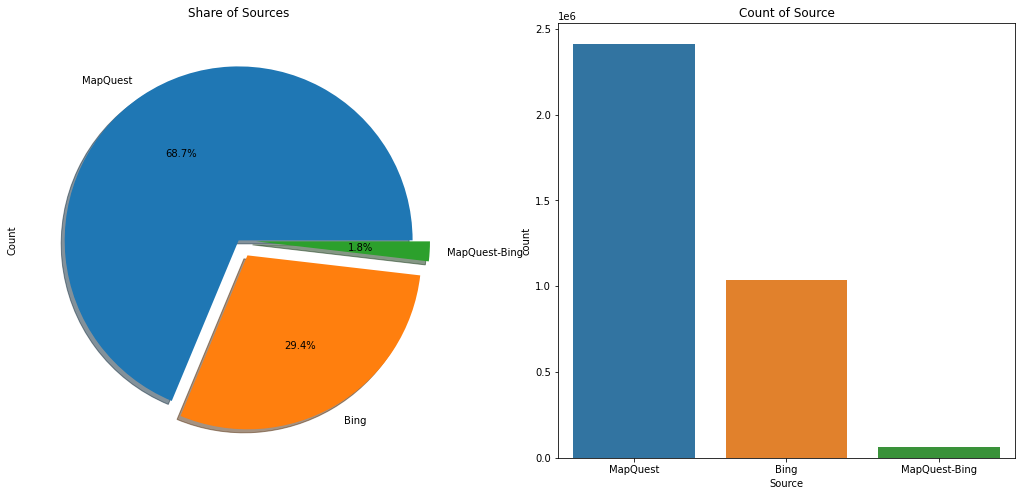

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Source'].value_counts().plot.pie(explode=[0,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Sources')
ax[0].set_ylabel('Count')
sns.countplot('Source',data=df,ax=ax[1],order=df['Source'].value_counts().index)
ax[1].set_title('Count of Source')
plt.show()

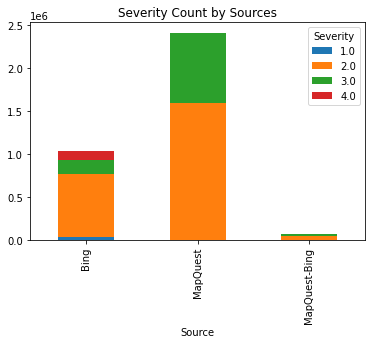

In [ ]:
df.groupby(['Severity','Source']).size().reset_index().pivot(columns='Severity', index='Source', values=0).plot(kind='bar', stacked=True, title='Severity Count by Sources')

In [ ]:
df.value_counts(subset=['Source', 'Severity']) 

Source         Severity
MapQuest       2.0         1592384
               3.0          812826
Bing           2.0          739592
               3.0          160806
               4.0          105435
MapQuest-Bing  2.0           39621
Bing           1.0           28104
MapQuest-Bing  3.0           24800
MapQuest       4.0            6758
               1.0            1049
MapQuest-Bing  4.0              60
               1.0              19
dtype: int64

In [ ]:
df_mapquest = df[df['Source']=='MapQuest']
df_mapquest.drop('Source',axis=1,inplace=True)
#df_mapquest.to_csv('/content/drive/MyDrive/df_mapquest.csv',index=False)
df = df[df['Source']=='Bing']
df.drop('Source',axis=1,inplace=True)
Unclassifiable.remove("Source")
categorical_datas.remove("Source")

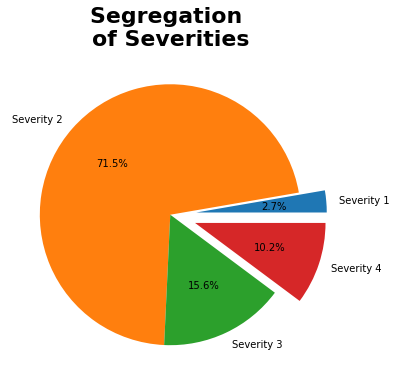

In [ ]:
cases = ['Severity 1', 'Severity 2', 'Severity 3', 'Severity 4']
plt.figure(figsize=(10, 6))
plt.pie(df.groupby('Severity').size(),
        labels= cases,
        explode = (0.2,0,0,0.2), #moving slices apart
        autopct = ('%1.1f%%')) #to display %
plt.title('Segregation \nof Severities', weight='heavy', fontsize=22);

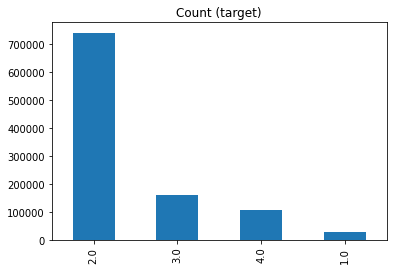

In [ ]:
df.Severity.value_counts().plot(kind='bar', title='Count (target)');

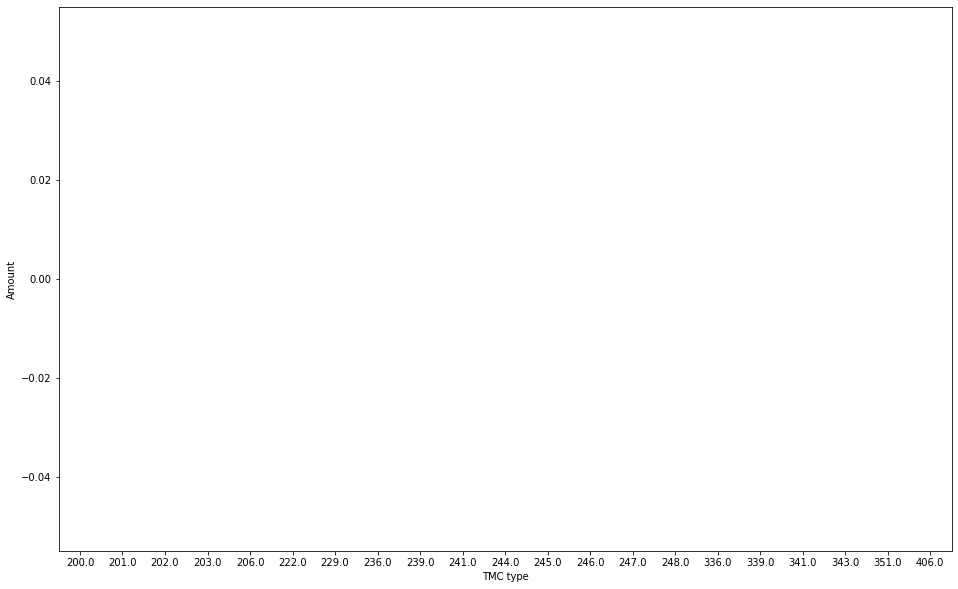

In [ ]:
plt.figure(figsize=(16, 10))
ax=sns.barplot(df.TMC.value_counts().index, df.TMC.value_counts())
ax.set(xlabel='TMC type', ylabel='Amount')
plt.show()

In [ ]:
df['TMC'].unique() # datayı bing ve mapquest olarak ayırmıstık, df bing üzerinden olandır
#demek ki bing kaynağı tmc kodlarıyla rapor tutmuyor dolayısıyla df deki tmc lerin hepsi nan oldu

[NaN]
Categories (0, float64): []

In [ ]:
#df için tmc yi düşürebiliriz
df.drop('TMC',axis=1,inplace=True)
Unclassifiable.remove("TMC")
categorical_datas.remove("TMC")

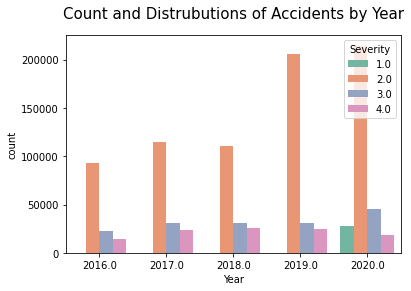

In [ ]:
df.Year = df.Year
sns.countplot(x='Year', hue='Severity', data=df ,palette="Set2")
plt.title('Count and Distrubutions of Accidents by Year', size=15, y=1.05)
plt.show()
#2020 yılında bing kaynağının ilk defa severity1 rapor etmeye başladığı görülüyor.
#bu durumun sebebini öğrenmek için dataset creatoruyle mailleşilmiştir

In [ ]:
(df[df['Year']==2020]['Severity']==2).value_counts()

True     214488
False     91672
Name: Severity, dtype: int64

In [ ]:
(df[df['Year']==2019]['Severity']==2).value_counts()

True     206360
False     55069
Name: Severity, dtype: int64

In [ ]:
df[df['Year']==2019].Severity.unique() # same 16 17 18 

[2.0, 4.0, 3.0]
Categories (3, float64): [2.0, 4.0, 3.0]

In [ ]:
#mailden gelen cevaba göre ya 2020 kullanılacak 4 class için ya da diğer 4 yıl 3 class için 2.cisi daha mantıklı

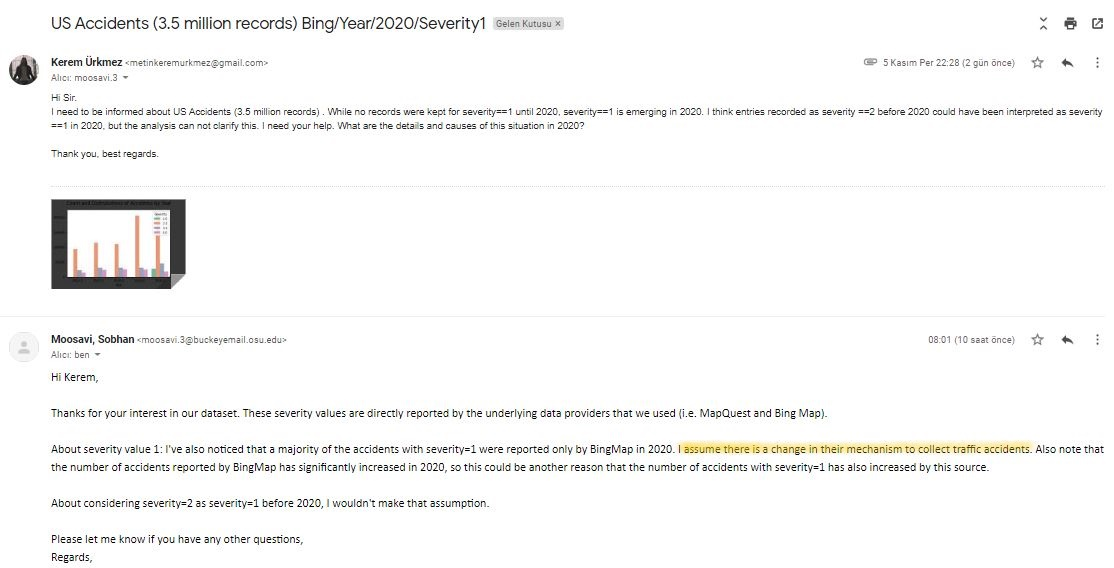

In [ ]:
df = df[df['Year'] != 2020 ]

In [ ]:
#kazanın ciddiyet tahmini için yıl bilmek anlamlı değildir dolayısıyla düşürülecektir. görsel için de önceki kodlarda kullanılmıştır sonrasında zaten gerek kalmayacktır
df.drop('Year',axis=1,inplace=True)
POI_Time.remove("Year")
categorical_datas.remove("Year")

In [ ]:
df['Severity'] = df['Severity'].cat.remove_unused_categories()

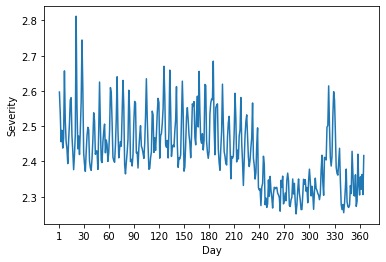

In [ ]:
temp = ['Day','Severity']
df[temp] = df[temp].apply(lambda x: x.astype('int64'))
df.groupby('Day')['Severity'].mean().plot(kind='line')
plt.xticks([1,30,60,90,120,150,180,210,240,270,300,330,360])
plt.ylabel('Severity')
df[temp] = df[temp].apply(lambda x: x.astype('category'))
del temp
plt.show()

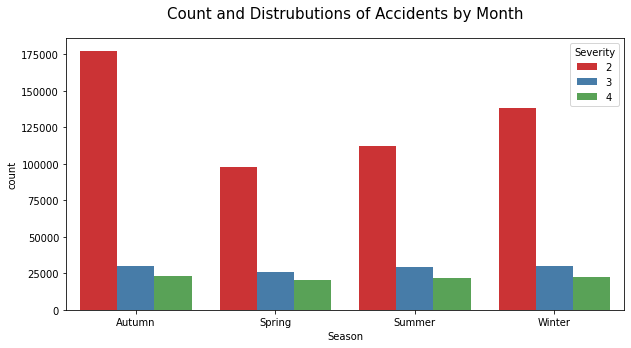

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Season', hue='Severity', data=df ,palette="Set1")
plt.title('Count and Distrubutions of Accidents by Month', size=15, y=1.05)
plt.show()

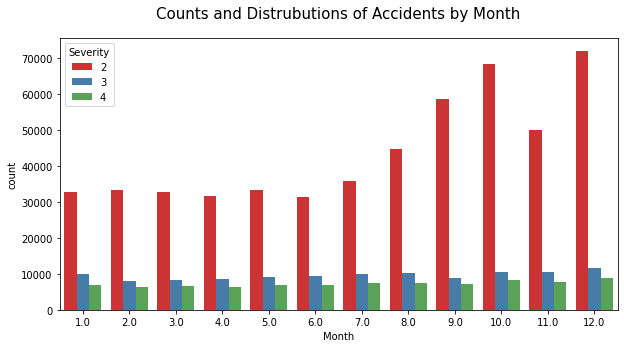

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Month', hue='Severity', data=df ,palette="Set1")
plt.title('Counts and Distrubutions of Accidents by Month', size=15, y=1.05)
plt.show()

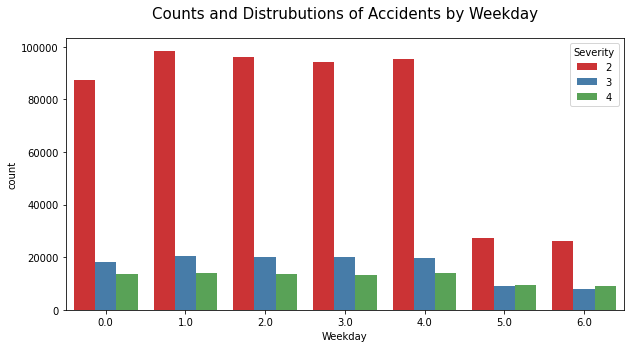

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Weekday', hue='Severity', data=df ,palette="Set1")
plt.title('Counts and Distrubutions of Accidents by Weekday', size=15, y=1.05)
plt.show()

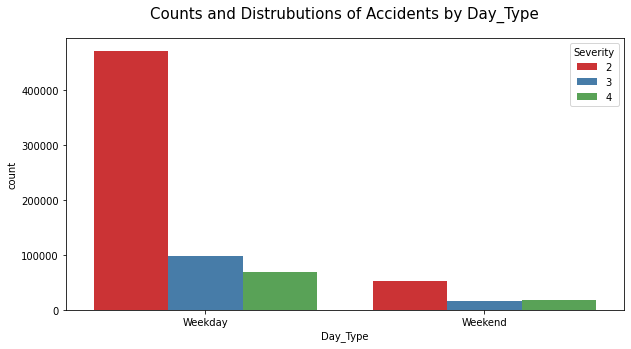

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Day_Type', hue='Severity', data=df ,palette="Set1")
plt.title('Counts and Distrubutions of Accidents by Day_Type', size=15, y=1.05)
plt.show()

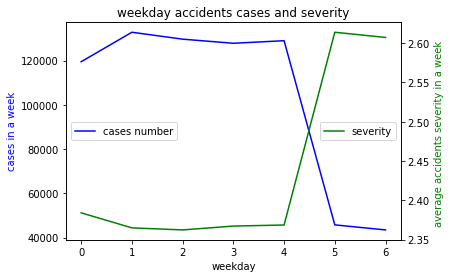

In [ ]:
cases_month = df[['Weekday','Duration']].astype('int64').groupby('Weekday')['Duration'].count()
severity_month = df[['Weekday','Severity']].astype('int64').groupby('Weekday')['Severity'].mean()
fig,ax=plt.subplots()
ax.plot(cases_month,color='blue',label='cases number')
ax.set_xlabel('weekday')
ax.set_ylabel('cases in a week',color='blue')
ax.legend(loc='center left')

ax2 = ax.twinx()
ax2.plot(severity_month,color='green',label='severity')
ax2.set_ylabel('average accidents severity in a week ',color='green')
ax2.set_label('severity')
ax.set_title('weekday accidents cases and severity')
ax2.legend(loc='center right')
plt.style.use('bmh')
plt.show()


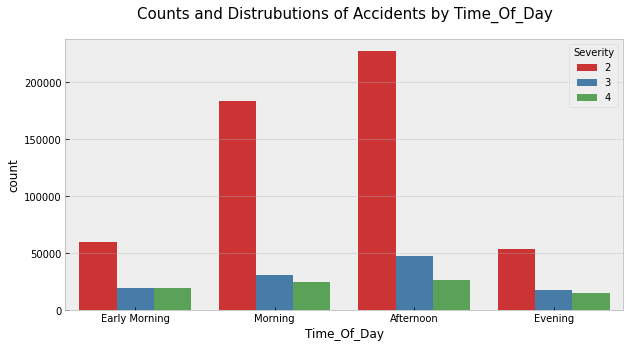

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Time_Of_Day', hue='Severity', data=df ,palette="Set1")
plt.title('Counts and Distrubutions of Accidents by Time_Of_Day', size=15, y=1.05)
plt.show()

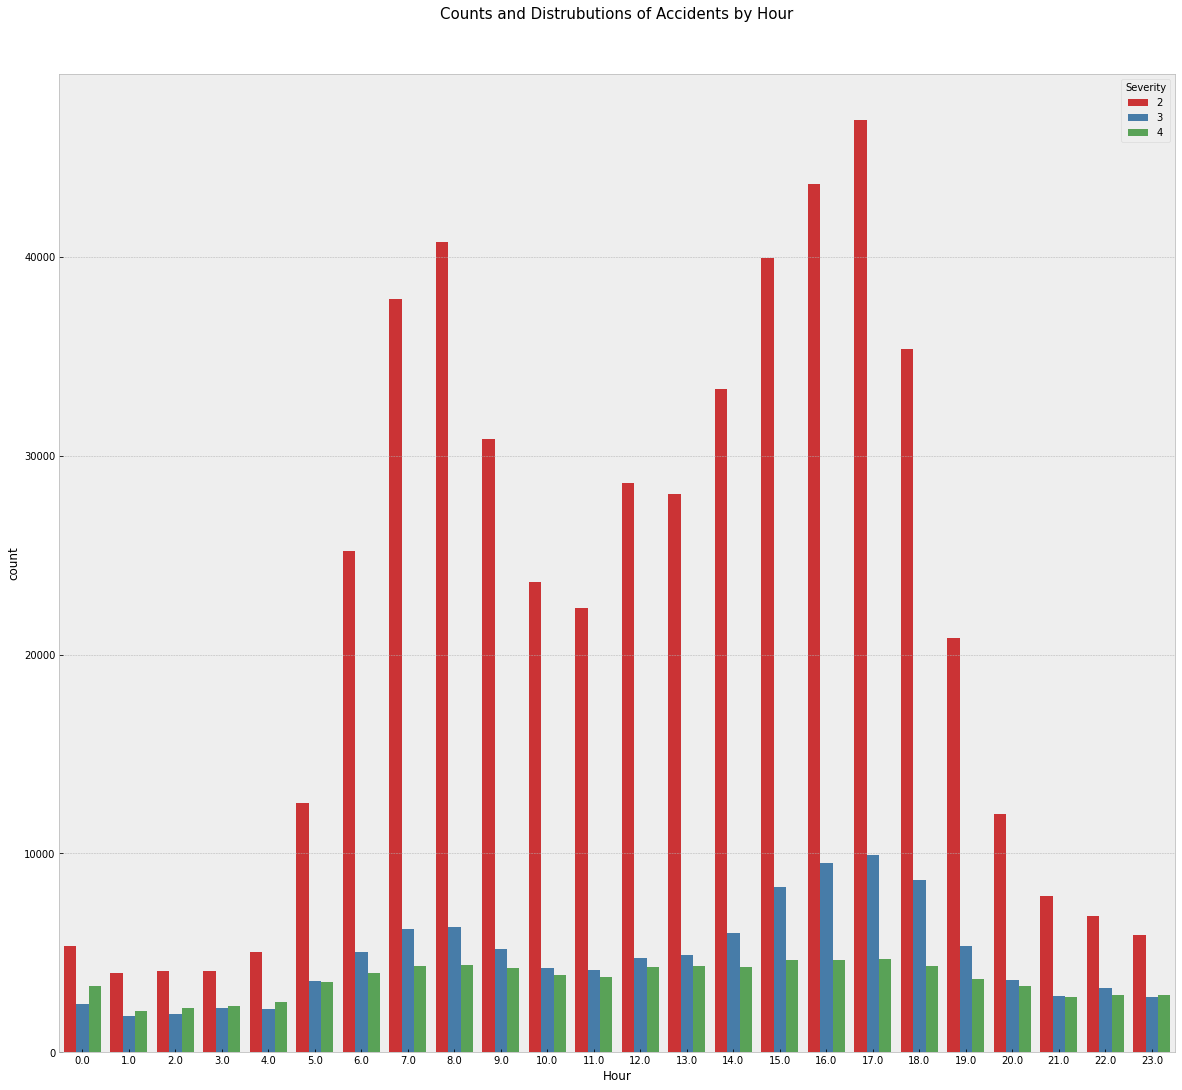

In [ ]:
plt.figure(figsize=(20,18))
sns.countplot(x='Hour', hue='Severity', data=df ,palette="Set1")
plt.title('Counts and Distrubutions of Accidents by Hour', size=15, y=1.05)
plt.show()

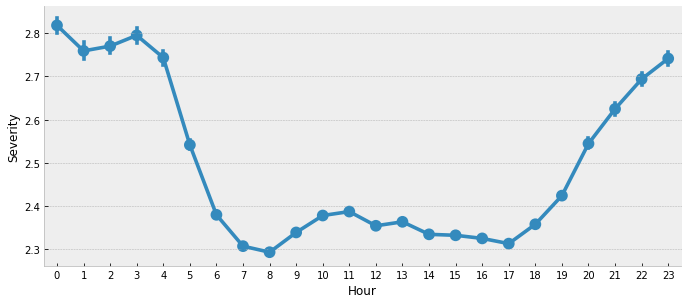

In [ ]:
sns.factorplot('Hour','Severity',data=df[['Hour','Severity']].astype('int64'))
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

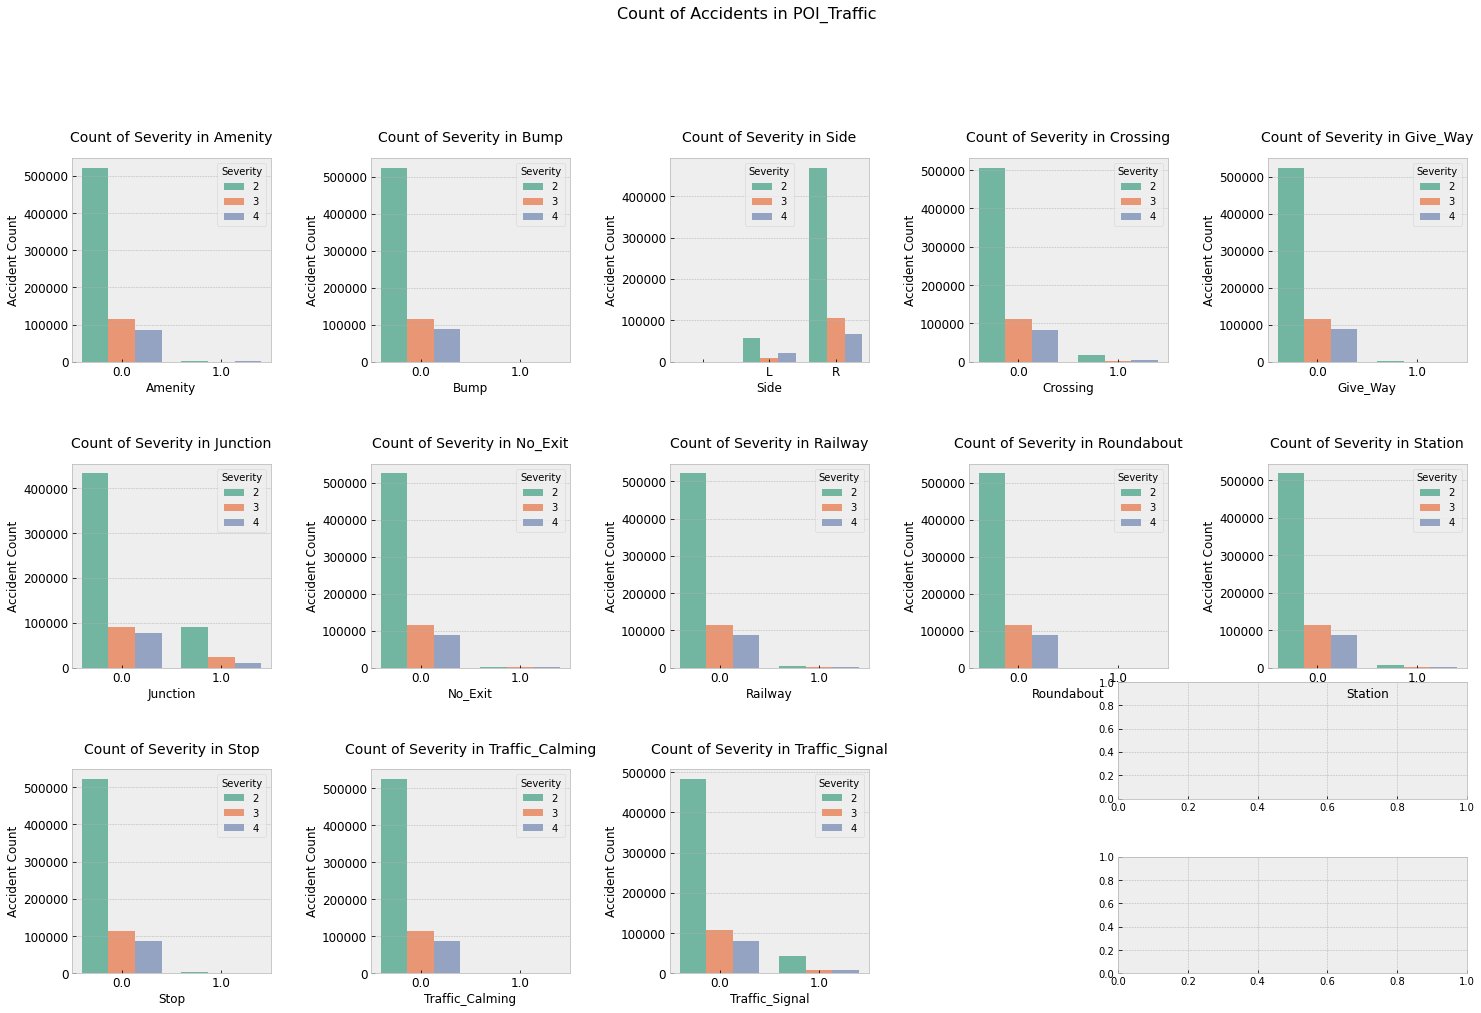

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(25, 15))

plt.subplots_adjust(hspace=0.5,wspace = 0.5)
for i, feature in enumerate(POI_Traffic, 1):    
    plt.subplot(3, 5, i)
    sns.countplot(x=feature, hue='Severity', data=df ,palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.title('Count of Severity in {}'.format(feature), size=14, y=1.05)
fig.suptitle('Count of Accidents in POI_Traffic' ,y=1.02, fontsize=16)
plt.show()

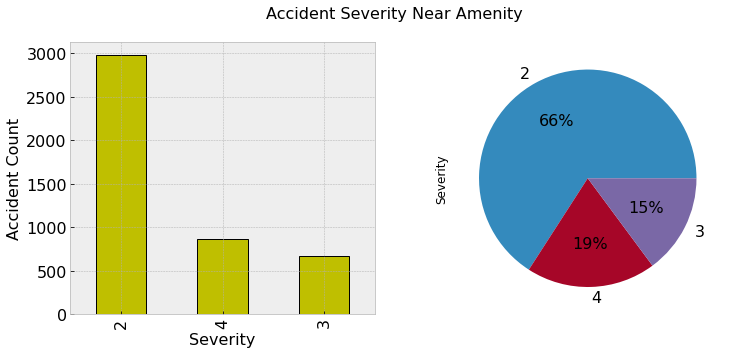

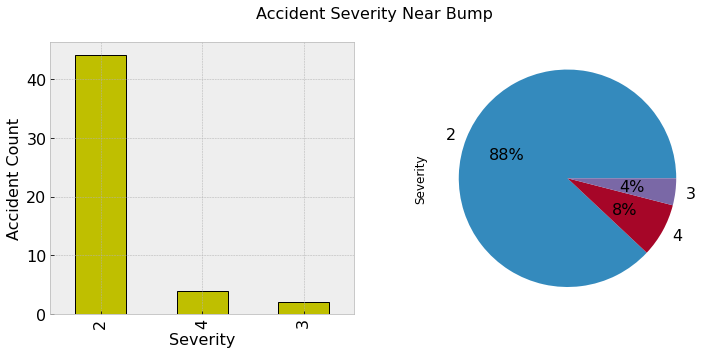

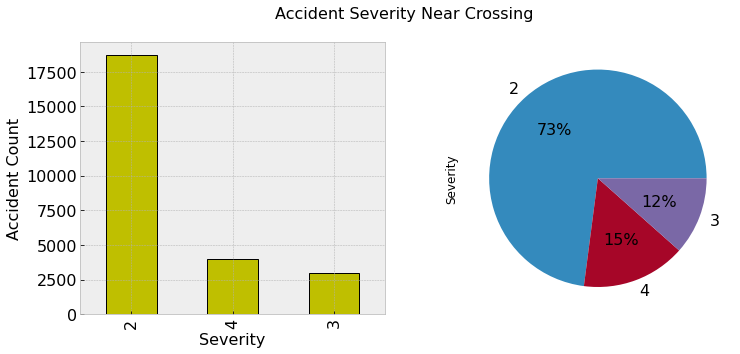

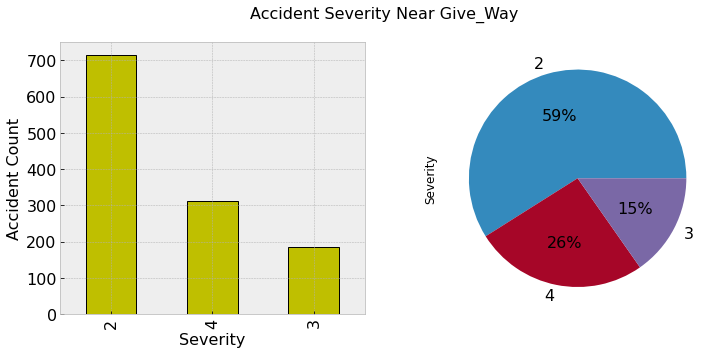

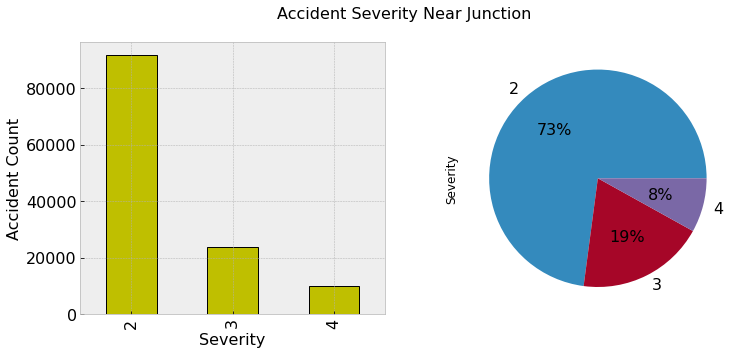

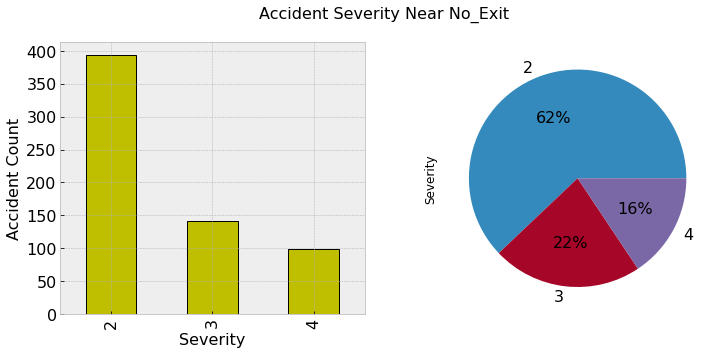

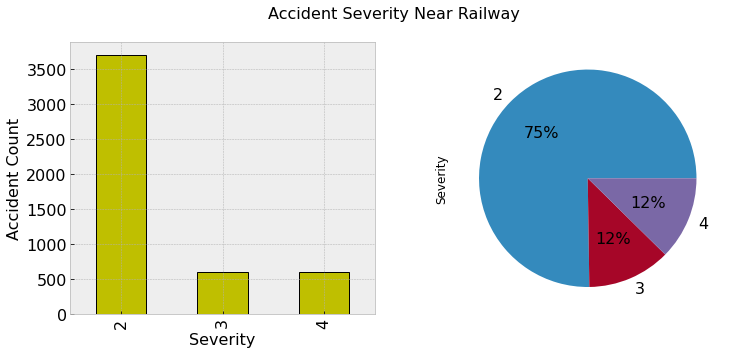

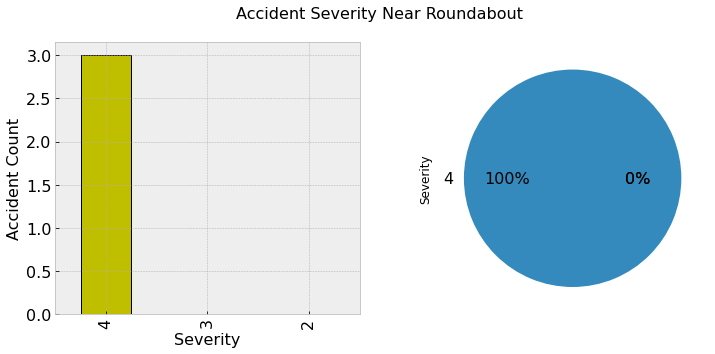

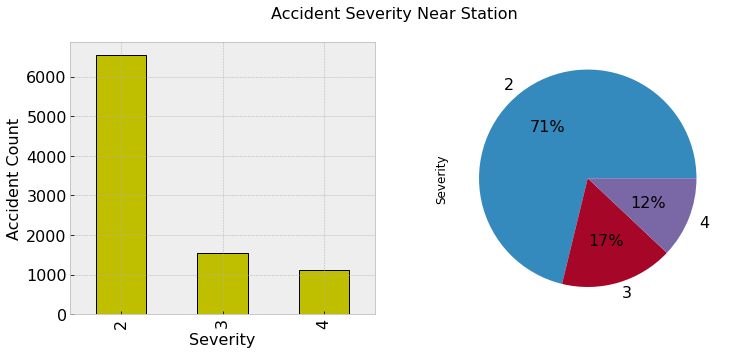

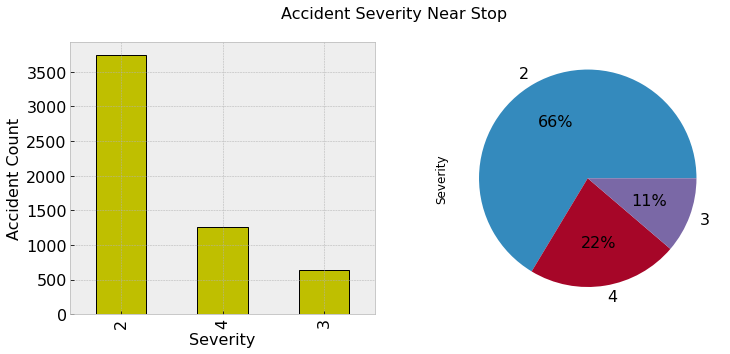

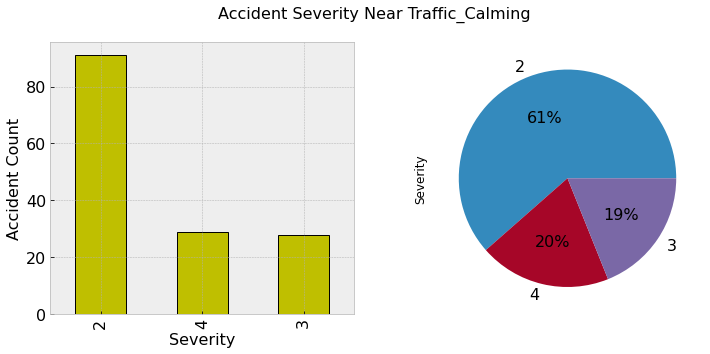

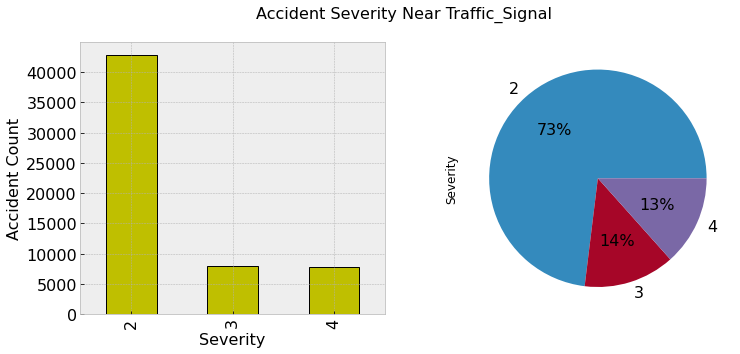

In [ ]:
for s in POI_Traffic:
    # check if infrastructure type is found in any record 
    if (df[s] == 1).sum() > 0:
        plt.subplots(1,2,figsize=(12,5))
        plt.xticks(fontsize=14)
        plt.suptitle('Accident Severity Near ' + s,fontsize=16)
        plt.subplot(1,2,1)
        df.loc[df[s] == 1]['Severity'].value_counts().plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
        plt.xlabel('Severity',fontsize=16)
        plt.ylabel('Accident Count',fontsize=16)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.subplot(1,2,2)
        df.loc[df[s] == 1]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)


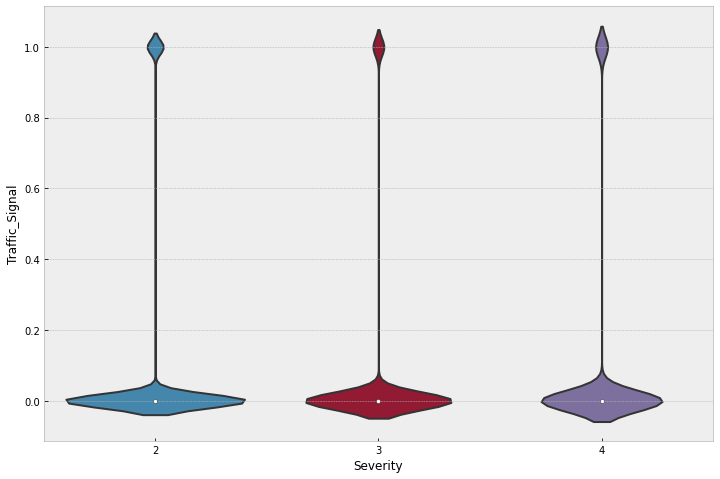

In [ ]:
#3 ve4. ciddiyetler için yüksek etkili olduğunu düşünerek trafficsignal ve junction değerini inceleyelim
plt.figure(figsize=(12,8))
sns.violinplot(x='Severity', y='Traffic_Signal', data=df[['Severity','Traffic_Signal']].dropna().astype('int64'))
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Traffic_Signal', fontsize=12)
plt.show()

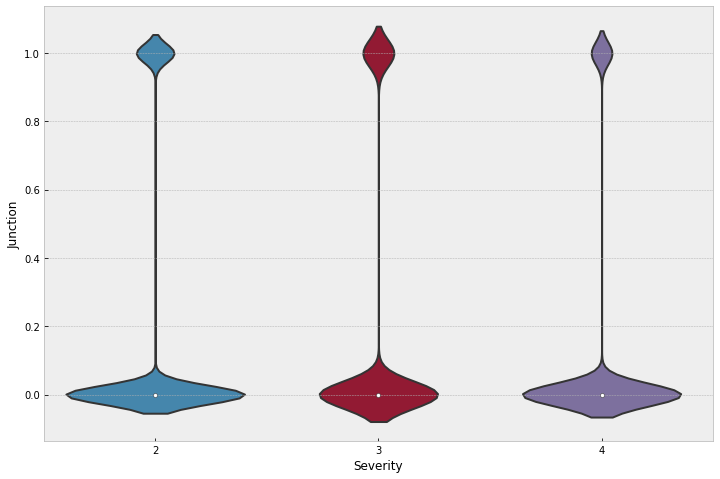

In [ ]:
plt.figure(figsize=(12,8))
sns.violinplot(x='Severity', y='Junction', data=df[['Severity','Junction']].dropna().astype('int64'))
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Junction', fontsize=12)
plt.show()

Text(0.5, 1.0, 'Station')

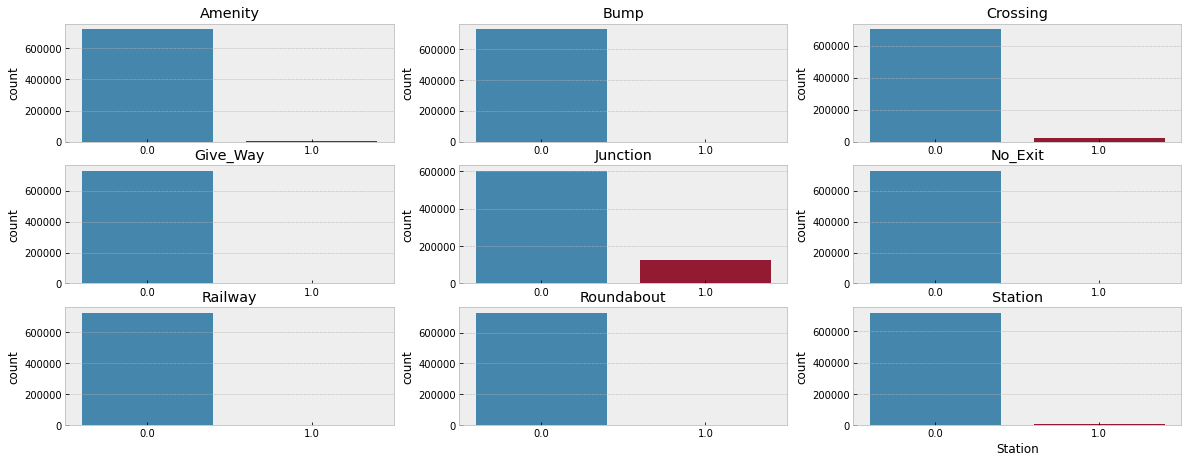

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(431)
sns.countplot(df['Amenity'])
plt.title('Amenity')
plt.xlabel('')
plt.subplot(432)
sns.countplot(df['Bump'])
plt.title('Bump')
plt.xlabel('')
plt.subplot(433)
sns.countplot(df['Crossing'])
plt.title('Crossing')
plt.xlabel('')
plt.subplot(434)
sns.countplot(df['Give_Way'])
plt.title('Give_Way')
plt.xlabel('')
plt.subplot(435)
sns.countplot(df['Junction'])
plt.title('Junction')
plt.xlabel('')
plt.subplot(436)
sns.countplot(df['No_Exit'])
plt.title('No_Exit')
plt.xlabel('')
plt.subplot(437)
sns.countplot(df['Railway'])
plt.title('Railway')
plt.xlabel('')
plt.subplot(438)
sns.countplot(df['Roundabout'])
plt.title('Roundabout')
plt.xlabel('')
plt.subplot(439)
sns.countplot(df['Station'])
plt.title('Station')

Text(0.5, 0, '')

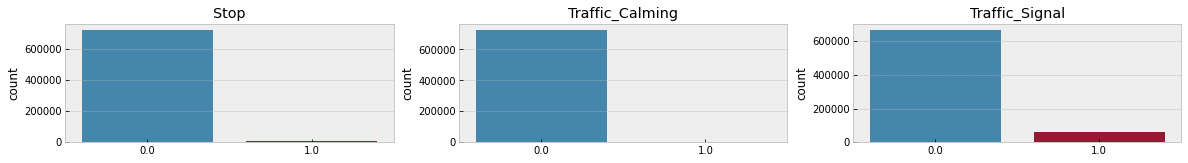

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(431)
sns.countplot(df['Stop'])
plt.title('Stop')
plt.xlabel('')
plt.subplot(432)
sns.countplot(df['Traffic_Calming'])
plt.title('Traffic_Calming')
plt.xlabel('')
plt.subplot(433)
sns.countplot(df['Traffic_Signal'])
plt.title('Traffic_Signal')
plt.xlabel('')

In [ ]:
for i in POI_Traffic:
  print(i,"has unique value size:", df[i].unique().size,"###",df[i].value_counts()[0],"count of value of 1:","###","count of value of 1:",df[i].value_counts()[1])

Amenity has unique value size: 2 ### 723259 count of value of 1: ### count of value of 1: 4518
Bump has unique value size: 2 ### 727727 count of value of 1: ### count of value of 1: 50
Side has unique value size: 2 ### 641568 count of value of 1: ### count of value of 1: 86209
Crossing has unique value size: 2 ### 702155 count of value of 1: ### count of value of 1: 25622
Give_Way has unique value size: 2 ### 726566 count of value of 1: ### count of value of 1: 1211
Junction has unique value size: 2 ### 602217 count of value of 1: ### count of value of 1: 125560
No_Exit has unique value size: 2 ### 727144 count of value of 1: ### count of value of 1: 633
Railway has unique value size: 2 ### 722871 count of value of 1: ### count of value of 1: 4906
Roundabout has unique value size: 2 ### 727774 count of value of 1: ### count of value of 1: 3
Station has unique value size: 2 ### 718599 count of value of 1: ### count of value of 1: 9178
Stop has unique value size: 2 ### 722144 count of va

In [ ]:
df.drop('Roundabout',axis=1,inplace=True)
POI_Traffic.remove("Roundabout")
categorical_datas.remove("Roundabout")

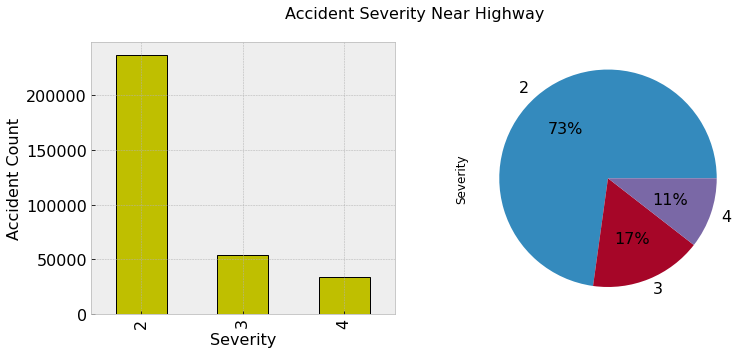

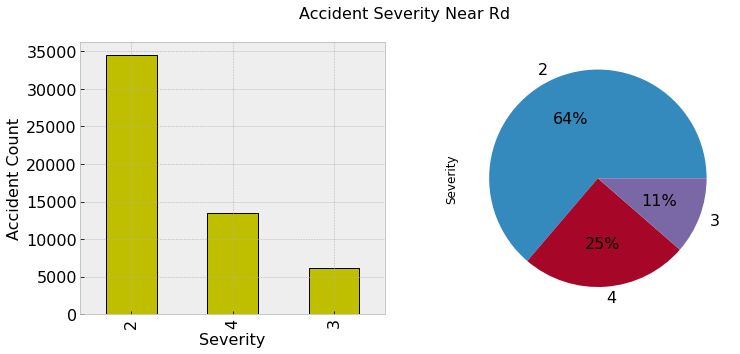

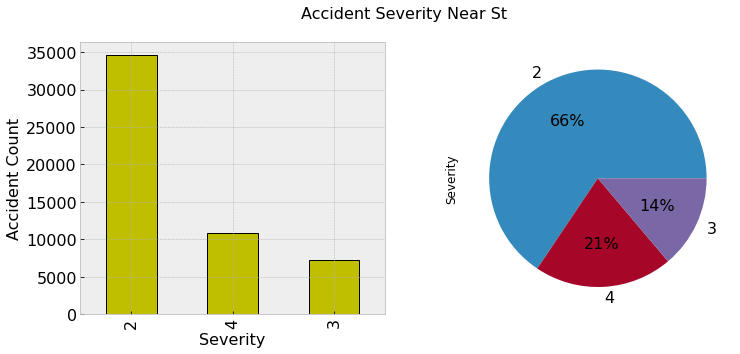

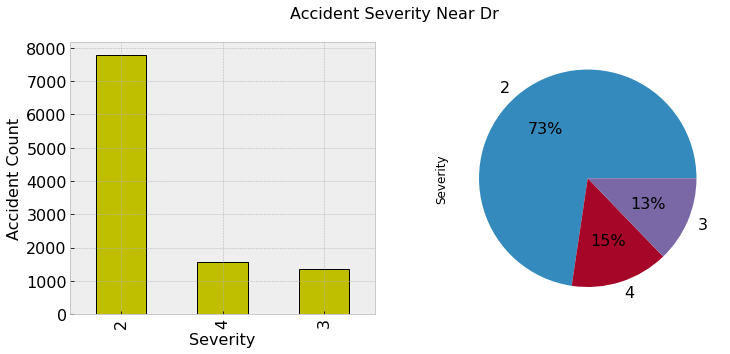

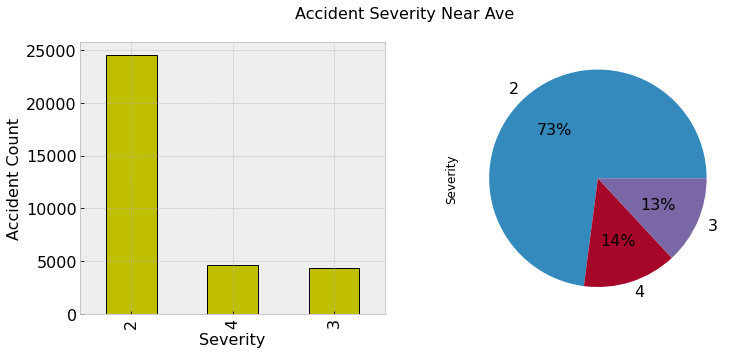

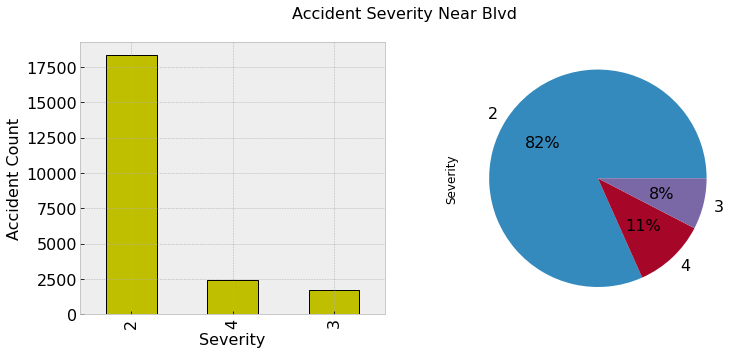

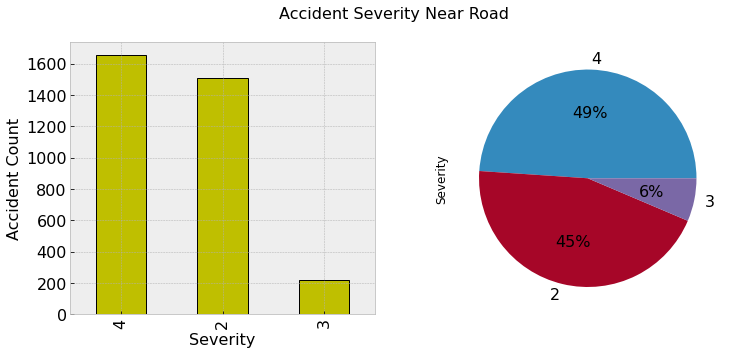

In [ ]:
for s in POI_Carriagedrive:
    # check if infrastructure type is found in any record 
    if (df[s] == 1).sum() > 0:
        plt.subplots(1,2,figsize=(12,5))
        plt.xticks(fontsize=14)
        plt.suptitle('Accident Severity Near ' + s,fontsize=16)
        plt.subplot(1,2,1)
        df.loc[df[s] == 1]['Severity'].value_counts().plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
        plt.xlabel('Severity',fontsize=16)
        plt.ylabel('Accident Count',fontsize=16)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.subplot(1,2,2)
        df.loc[df[s] == 1]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)


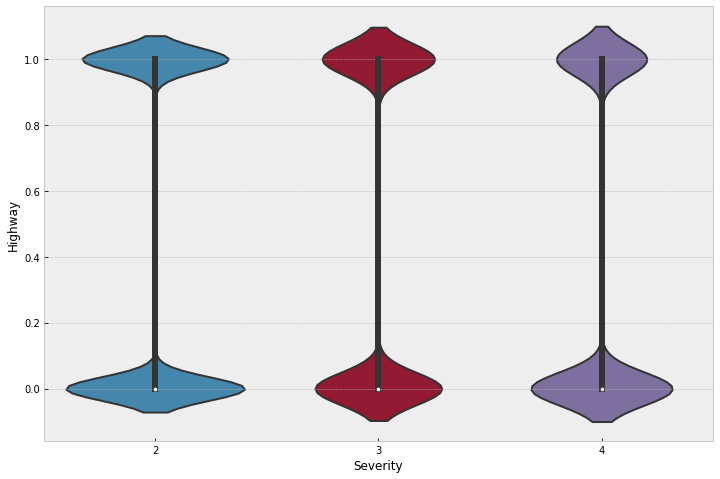

In [ ]:
#3.4. gibi yüksek ciddiyetlerin dağılımdaki payı açısından güçlü olduğu için Highway ve Road için derinleşelim
plt.figure(figsize=(12,8))
sns.violinplot(x='Severity', y='Highway', data=df[['Severity','Highway']].dropna().astype('int64'))
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Highway', fontsize=12)
plt.show()

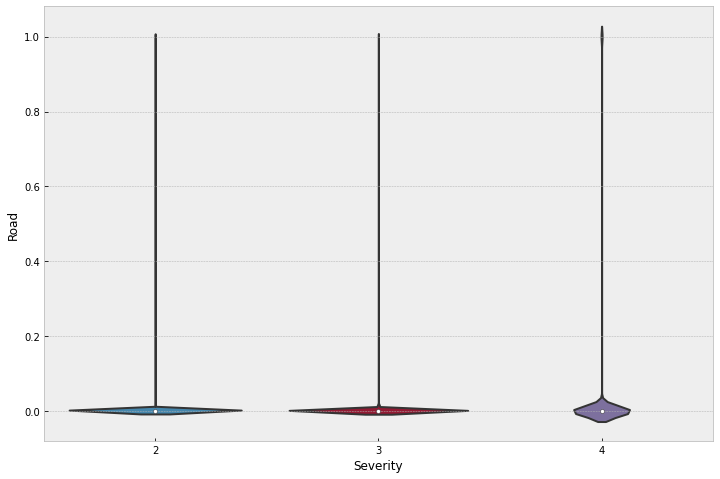

In [ ]:
plt.figure(figsize=(12,8))
sns.violinplot(x='Severity', y='Road', data=df[['Severity','Road']].dropna().astype('int64'))
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Road', fontsize=12)
plt.show()

Text(0.5, 0, '')

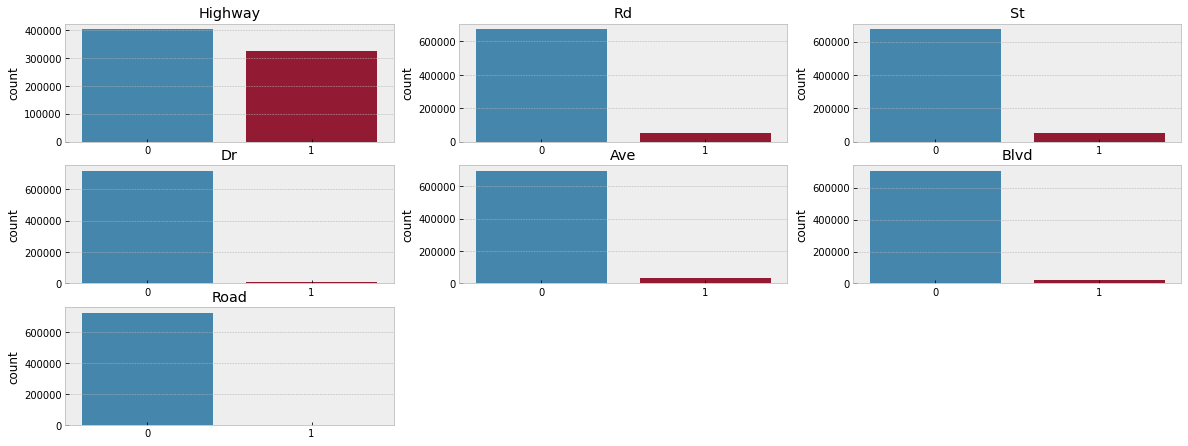

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(431)
sns.countplot(df['Highway'])
plt.title('Highway')
plt.xlabel('')
plt.subplot(432)
sns.countplot(df['Rd'])
plt.title('Rd')
plt.xlabel('')
plt.subplot(433)
sns.countplot(df['St'])
plt.title('St')
plt.xlabel('')
plt.subplot(434)
sns.countplot(df['Dr'])
plt.title('Dr')
plt.xlabel('')
plt.subplot(435)
sns.countplot(df['Ave'])
plt.title('Ave')                                      
plt.xlabel('')
plt.subplot(436)
sns.countplot(df['Blvd'])
plt.title('Blvd')
plt.xlabel('')
plt.subplot(437)
sns.countplot(df['Road'])
plt.title('Road')
plt.xlabel('')

In [ ]:
for i in POI_Carriagedrive:
  print(i,"has unique value size:", df[i].unique().size,"###",df[i].value_counts()[0],"count of value of 1:","###","count of value of 1:",df[i].value_counts()[1])

Highway has unique value size: 2 ### 403071 count of value of 1: ### count of value of 1: 324706
Rd has unique value size: 2 ### 673703 count of value of 1: ### count of value of 1: 54074
St has unique value size: 2 ### 675080 count of value of 1: ### count of value of 1: 52697
Dr has unique value size: 2 ### 717070 count of value of 1: ### count of value of 1: 10707
Ave has unique value size: 2 ### 694211 count of value of 1: ### count of value of 1: 33566
Blvd has unique value size: 2 ### 705343 count of value of 1: ### count of value of 1: 22434
Road has unique value size: 2 ### 724399 count of value of 1: ### count of value of 1: 3378


Text(0.5, 0, '')

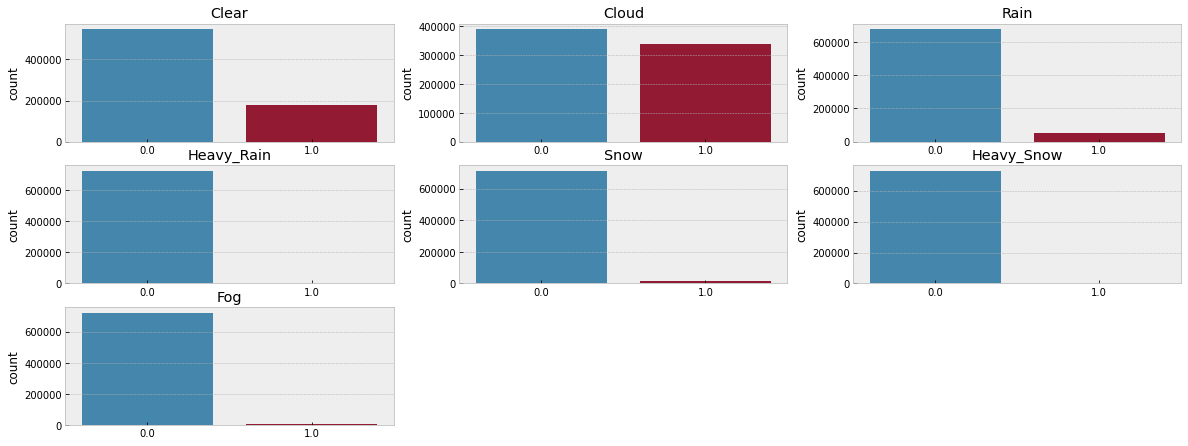

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(431)
sns.countplot(df['Clear'])
plt.title('Clear')
plt.xlabel('')
plt.subplot(432)
sns.countplot(df['Cloud'])
plt.title('Cloud')
plt.xlabel('')
plt.subplot(433)
sns.countplot(df['Rain'])
plt.title('Rain')
plt.xlabel('')
plt.subplot(434)
sns.countplot(df['Heavy_Rain'])
plt.title('Heavy_Rain')
plt.xlabel('')
plt.subplot(435)
sns.countplot(df['Snow'])
plt.title('Snow')                                      
plt.xlabel('')
plt.subplot(436)
sns.countplot(df['Heavy_Snow'])
plt.title('Heavy_Snow')
plt.xlabel('')
plt.subplot(437)
sns.countplot(df['Fog'])
plt.title('Fog')
plt.xlabel('')

Text(0.5, 0, '')

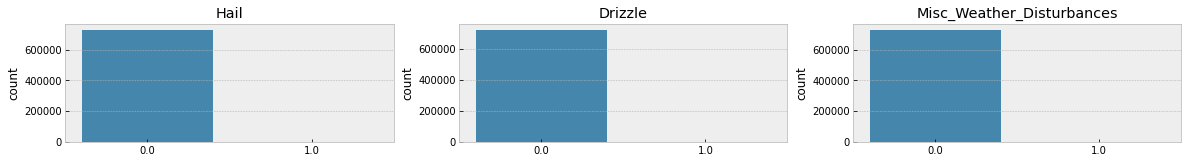

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(431)
sns.countplot(df['Hail'])
plt.title('Hail')
plt.xlabel('')
plt.subplot(432)
sns.countplot(df['Drizzle'])
plt.title('Drizzle')
plt.xlabel('')
plt.subplot(433)
sns.countplot(df['Misc_Weather_Disturbances'])
plt.title('Misc_Weather_Disturbances')
plt.xlabel('')

In [ ]:
for i in POI_Weather[:-2]:
  print(i,"has unique value size:", df[i].unique().size,"###",df[i].value_counts()[0],"count of value of 1:","###","count of value of 1:",df[i].value_counts()[1])

Clear has unique value size: 2 ### 547547 count of value of 1: ### count of value of 1: 180230
Cloud has unique value size: 2 ### 389922 count of value of 1: ### count of value of 1: 337855
Rain has unique value size: 2 ### 677194 count of value of 1: ### count of value of 1: 50583
Heavy_Rain has unique value size: 2 ### 724080 count of value of 1: ### count of value of 1: 3697
Snow has unique value size: 2 ### 712255 count of value of 1: ### count of value of 1: 15522
Heavy_Snow has unique value size: 2 ### 727288 count of value of 1: ### count of value of 1: 489
Fog has unique value size: 2 ### 721529 count of value of 1: ### count of value of 1: 6248
Hail has unique value size: 2 ### 727765 count of value of 1: ### count of value of 1: 12
Drizzle has unique value size: 2 ### 724969 count of value of 1: ### count of value of 1: 2808
Misc_Weather_Disturbances has unique value size: 2 ### 727676 count of value of 1: ### count of value of 1: 101


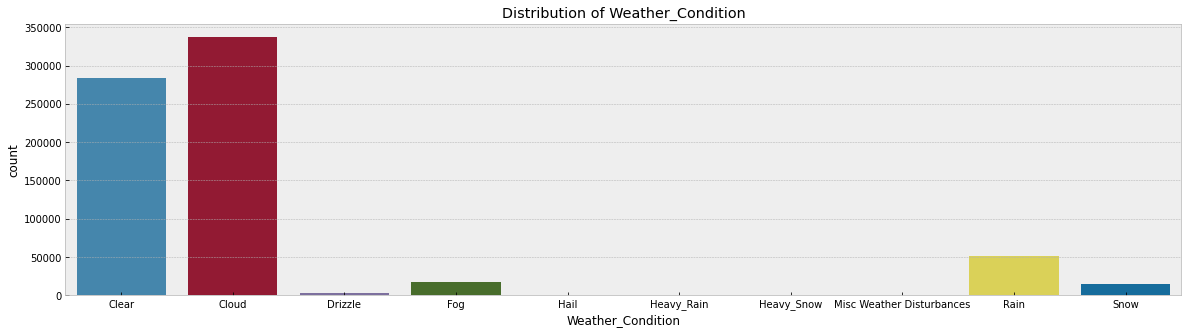

In [ ]:
plt.figure(figsize=(20, 5))
plt.title('Distribution of Weather_Condition')
sns.countplot(x=df['Weather_Condition'], data=df)

In [ ]:
df['Weather_Condition'].value_counts()

Cloud                        337855
Clear                        283209
Rain                          51266
Fog                           16986
Snow                          15506
Drizzle                        2798
Heavy_Rain                      113
Misc Weather Disturbances       101
Hail                             10
Heavy_Snow                        8
Name: Weather_Condition, dtype: int64

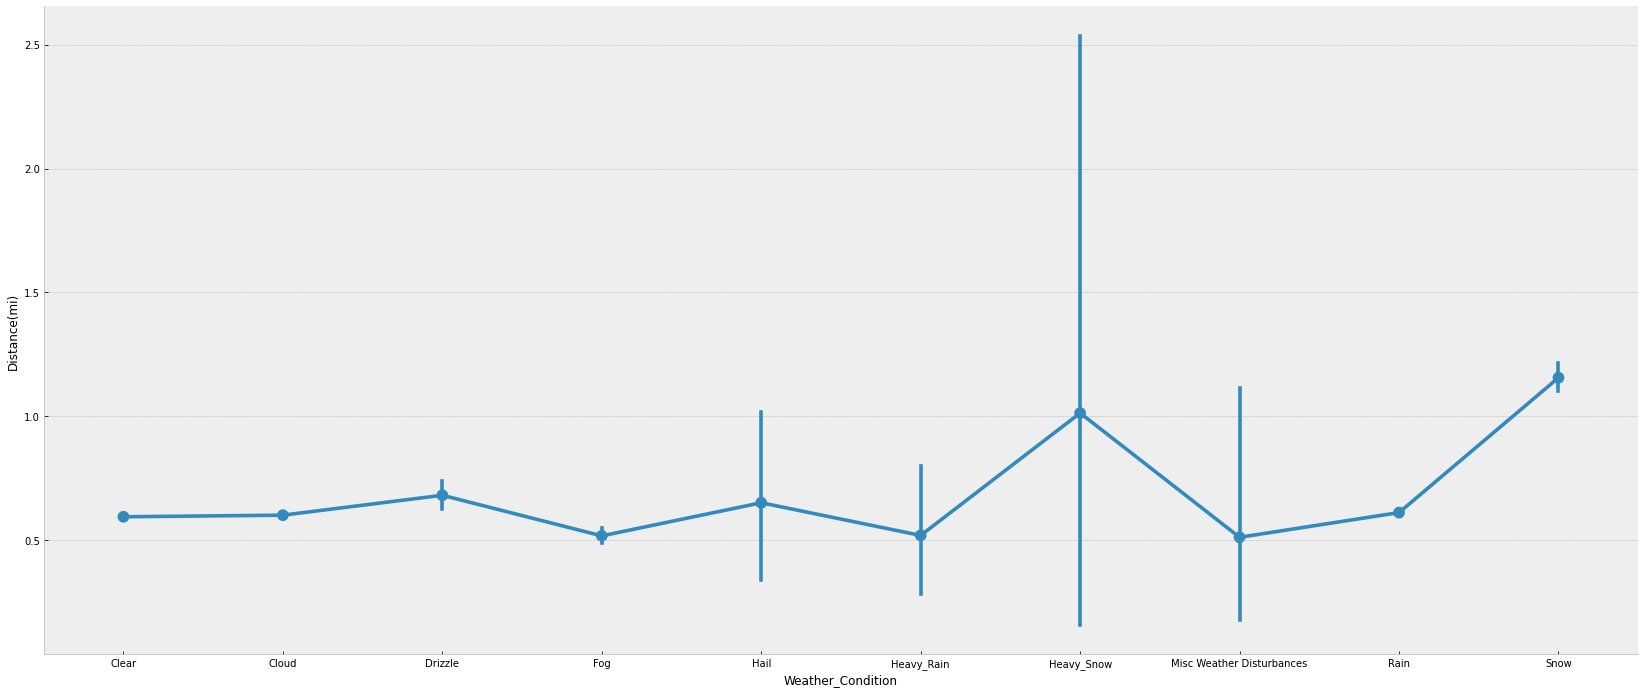

In [ ]:
sns.factorplot('Weather_Condition','Distance(mi)',data=df)
fig=plt.gcf()
fig.set_size_inches(25,10)
plt.show()

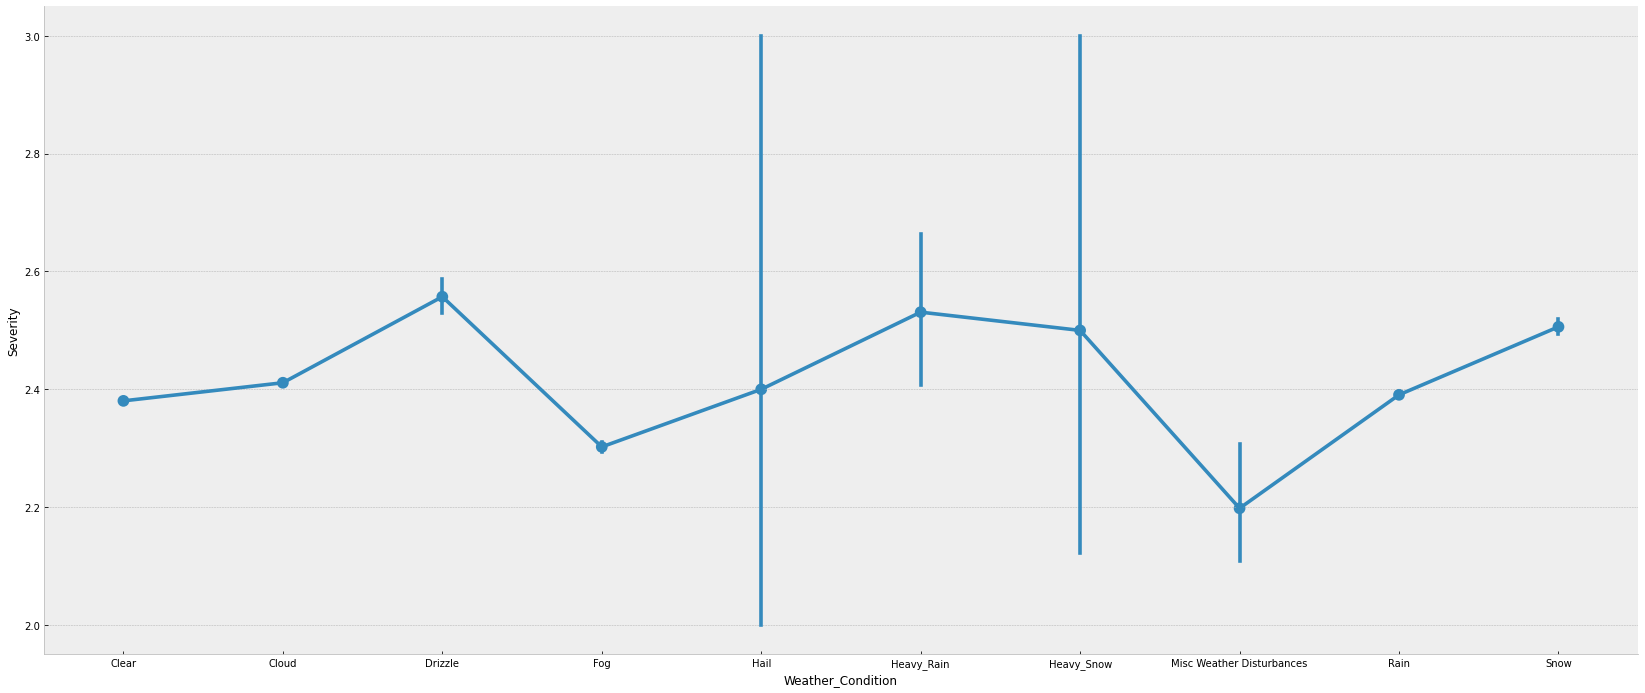

In [ ]:
df_temp = df[['Weather_Condition','Severity']]
df_temp["Severity"] = pd.to_numeric(df_temp["Severity"])
sns.factorplot('Weather_Condition','Severity',data=df_temp)
fig=plt.gcf()
fig.set_size_inches(25,10)
plt.show()

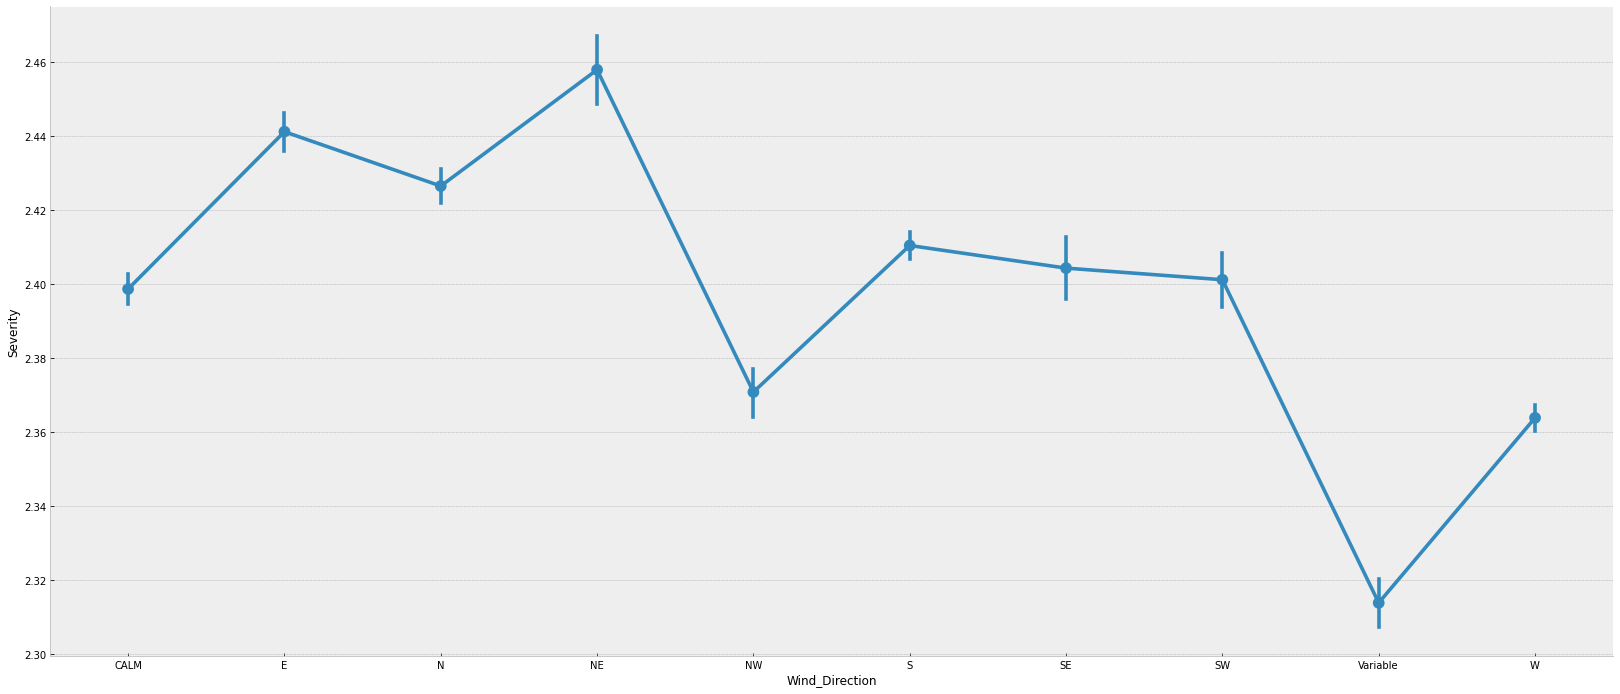

In [ ]:
df_temp = df[['Wind_Direction','Severity']]
df_temp["Severity"] = pd.to_numeric(df_temp["Severity"])
sns.factorplot('Wind_Direction','Severity',data=df_temp)
fig=plt.gcf()
fig.set_size_inches(25,10)
plt.show()

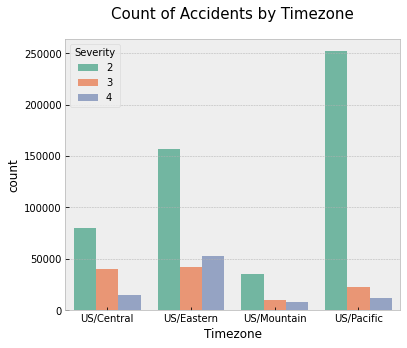

In [ ]:
plt.figure(figsize=(6,5))
chart = sns.countplot(x='Timezone', hue='Severity', data=df ,palette="Set2")
plt.title("Count of Accidents by Timezone", size=15, y=1.05)
plt.show()

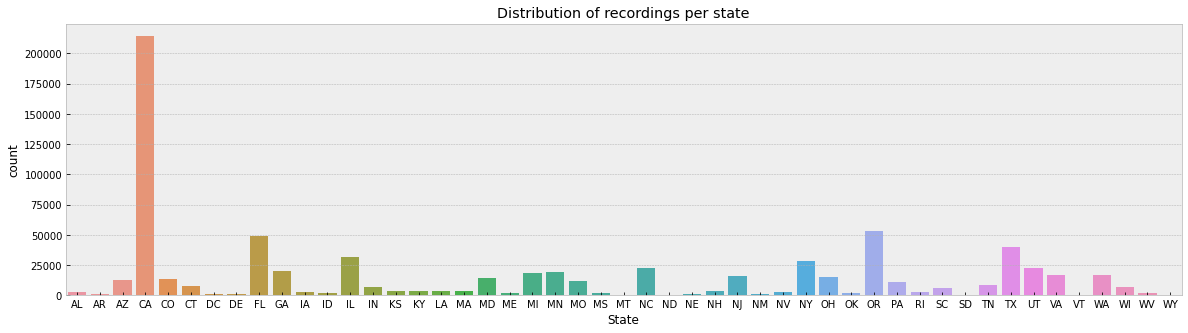

In [ ]:
plt.figure(figsize=(20, 5))
plt.title('Distribution of recordings per state')
sns.countplot(x=df['State'], data=df)

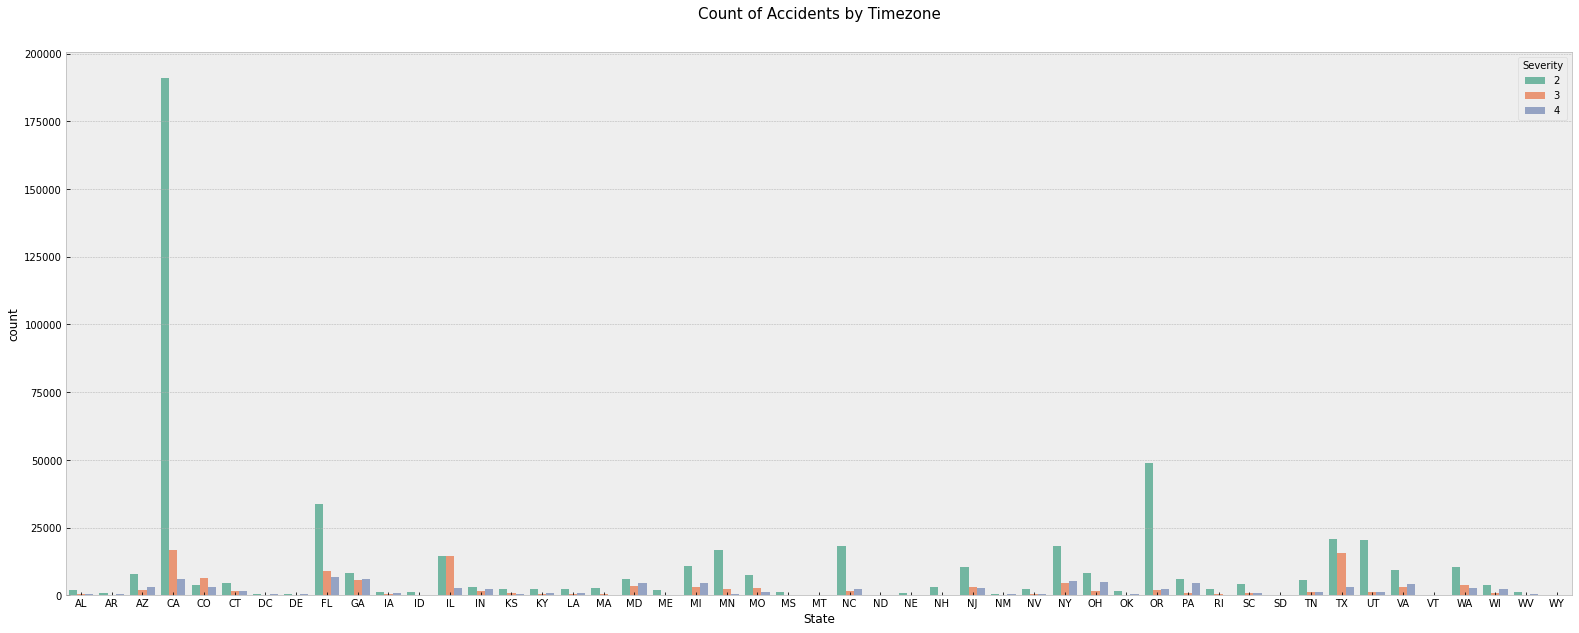

In [ ]:
plt.figure(figsize=(27,10))
chart = sns.countplot(x='State', hue='Severity', data=df ,palette="Set2")
plt.title("Count of Accidents by Timezone", size=15, y=1.05)
plt.show()

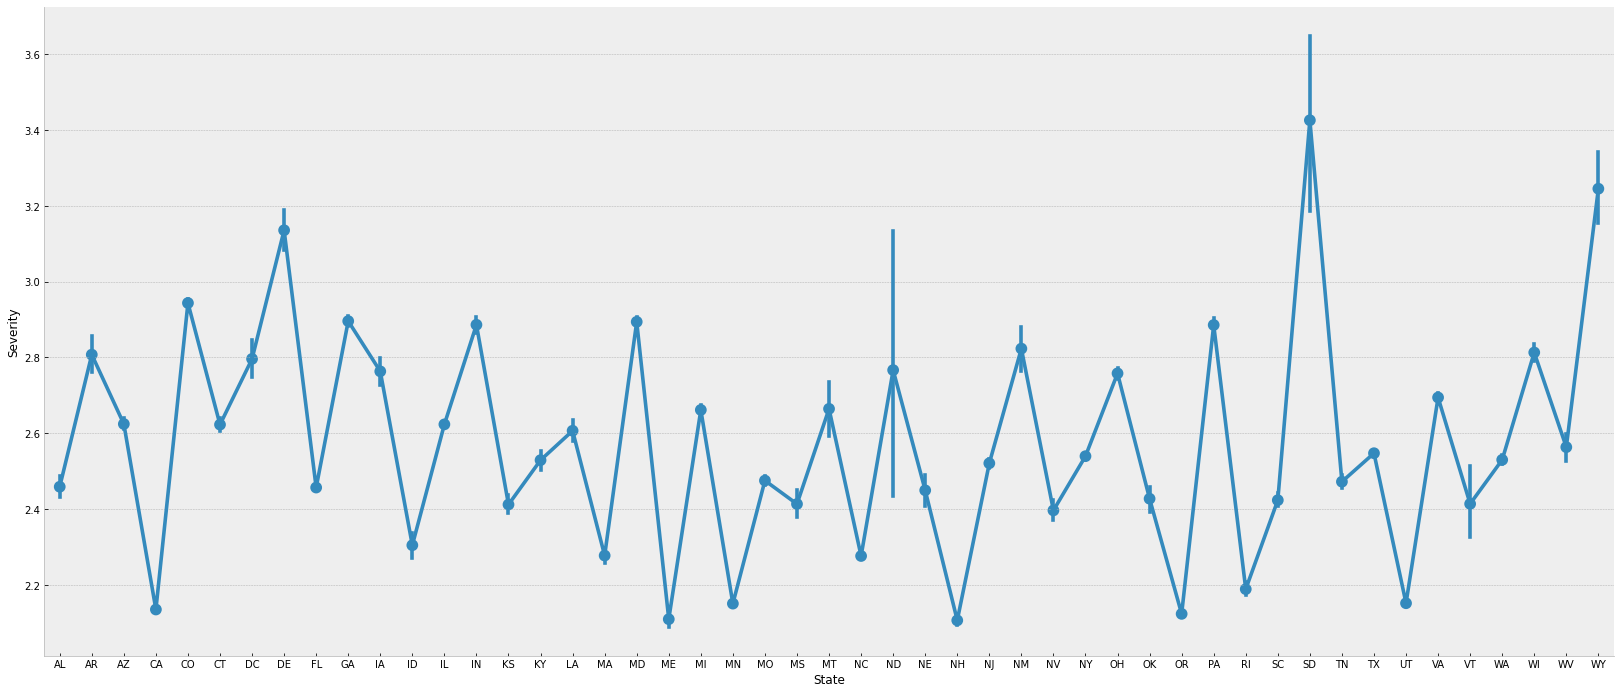

In [ ]:
df_temp = df[['State','Severity']]
df_temp["Severity"] = pd.to_numeric(df_temp["Severity"])
sns.factorplot('State','Severity',data=df_temp)
fig=plt.gcf()
fig.set_size_inches(25,10)
plt.show()

In [ ]:
import plotly
import plotly.graph_objs as go
import plotly.offline as py

cities = df['City'].value_counts()[df['City'].value_counts()>10000]
data = [go.Bar(x=cities.index,
               y=cities.values,
               name='Cities')]

layout = go.Layout(title='Accidents per City - 2016 - 2019',
                   yaxis={'title':'Number of accidents'},
                   width=1000,
                   height=700)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations=pd.value_counts(df['State']).index,
    z = pd.value_counts(df['State']).values.astype(float),  # Data to be color-coded
    locationmode = 'USA-states',     # set of locations match entries in `locations`
    colorscale = 'YlOrRd',
    colorbar_title = "Count",
))

fig.update_layout(
    title_text = 'US Accidents by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

<Figure size 1008x576 with 0 Axes>

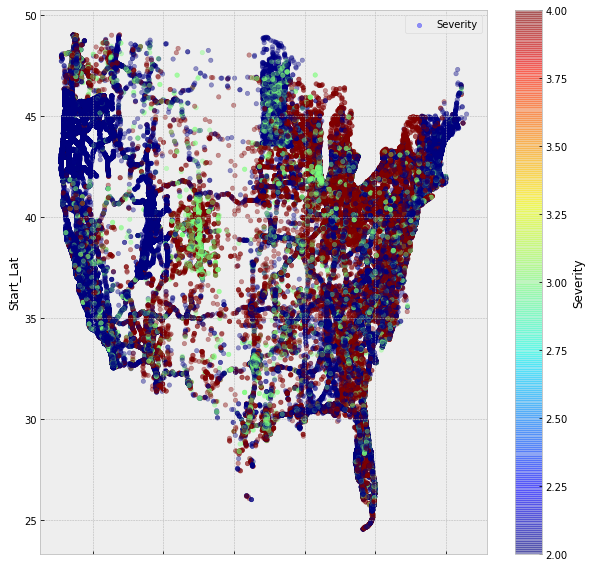

In [ ]:
plt.figure(figsize=(14,8))
xxx=df.plot(kind='scatter', x='Start_Lng',y='Start_Lat',label='Severity',c='Severity',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4,figsize=(10,10))
xxx.legend()
plt.ioff()

In [ ]:
import folium
from folium.plugins import HeatMap
from IPython.display import display
def plot_map2(city): #en çok kaza olan los angeles e bakalım
    data_heatmap = df[df["City"] == city]
    lat = data_heatmap['Start_Lat'].iloc[0]
    long = data_heatmap['Start_Lng'].iloc[0]
    LatLong = [lat, long]
    accident_map = folium.Map(location=LatLong, 
                           tiles = "cartodbpositron",
                           zoom_start = 10)

    data_heatmap = data_heatmap[['Start_Lat','Start_Lng']]
    data_heatmap = [[row['Start_Lat'],row['Start_Lng']] for index, row in data_heatmap.iterrows()]
    HeatMap(data_heatmap, radius=10).add_to(accident_map)
    return display(accident_map)
plot_map2(city = "Los Angeles")

In [ ]:
df_for_mapbox = df[(df.Severity == 3)].query("City=='Los Angeles'")
import plotly.express as px #graphic library
fig = px.density_mapbox(df_for_mapbox, lat='Start_Lat', lon='Start_Lng', radius=5, zoom=7,
                        color_continuous_scale=px.colors.sequential.YlOrRd,
                        mapbox_style="stamen-terrain")
fig.update_layout(
        title = 'Los Angeles - Accidents',
)
fig.show()

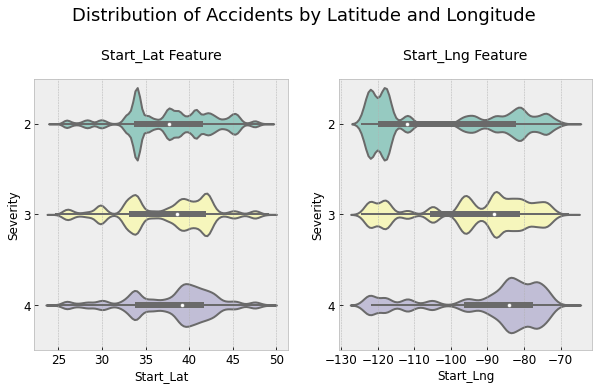

In [ ]:
arr = ['Start_Lat', 'Start_Lng']
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(10, 5))
plt.subplots_adjust(hspace=0.4,wspace = 0.2)
for i, feature in enumerate(arr, 1):    
    plt.subplot(1, 2, i)
    sns.violinplot(x=feature, y="Severity", data=df, palette="Set3")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Severity', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)

    plt.title('{} Feature'.format(feature), size=14, y=1.05)
fig.suptitle('Distribution of Accidents by Latitude and Longitude', fontsize=18,y=1.08)
plt.show()

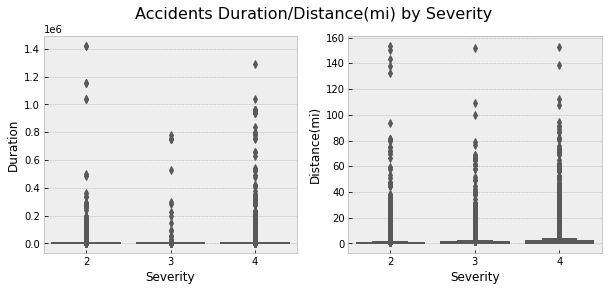

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
sns.boxplot(x="Severity", y="Duration",
            data=df, palette="Set2", ax=axs[0])
sns.boxplot(x="Severity", y="Distance(mi)", 
            data=df, palette="Set2", ax=axs[1])
fig.suptitle('Accidents Duration/Distance(mi) by Severity', fontsize=16)
plt.show()

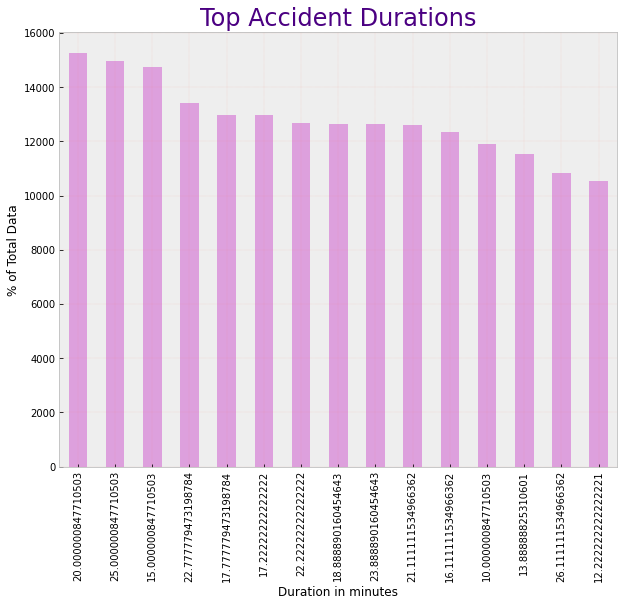

In [ ]:
cantigrades = 5*df['Temperature(F)'].dropna()/9 - 5*32/9
top_15 = cantigrades.value_counts().nlargest(15) 
top_15.plot.bar(figsize=(10,8), color = 'plum')
plt.title('Top Accident Durations', fontsize = 24, color='indigo')
plt.xlabel('Duration in minutes')
plt.ylabel('% of Total Data')
plt.grid(linestyle=':', linewidth = '0.2', color ='salmon');

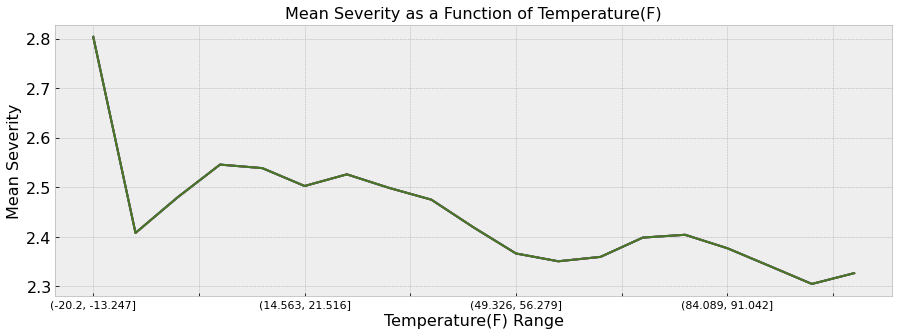

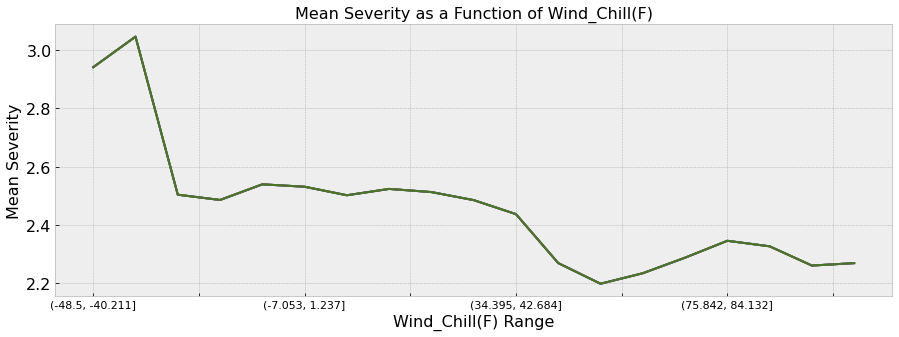

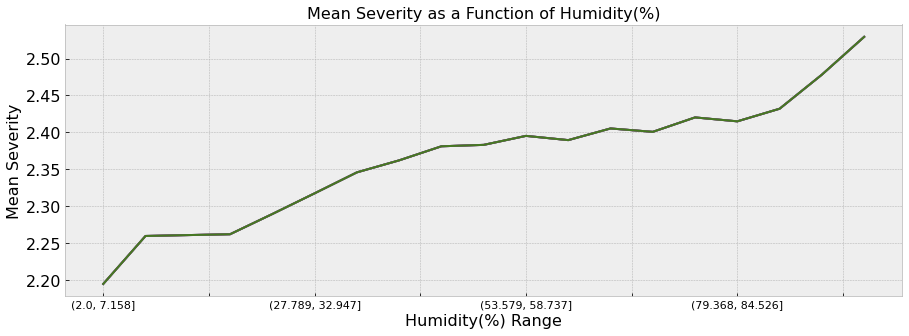

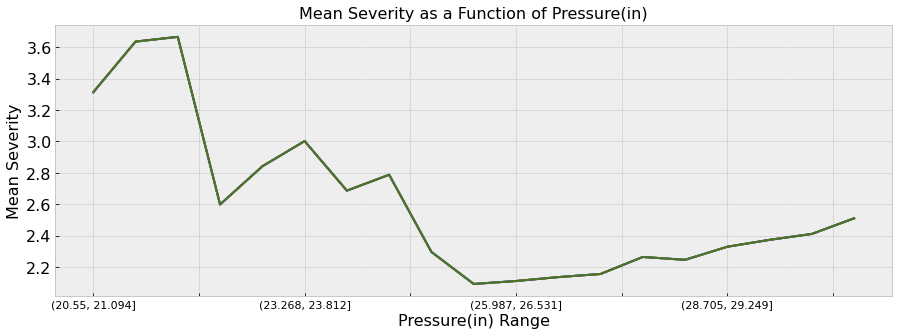

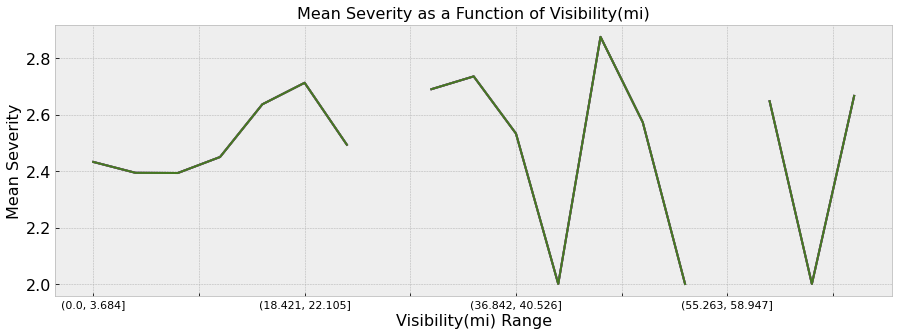

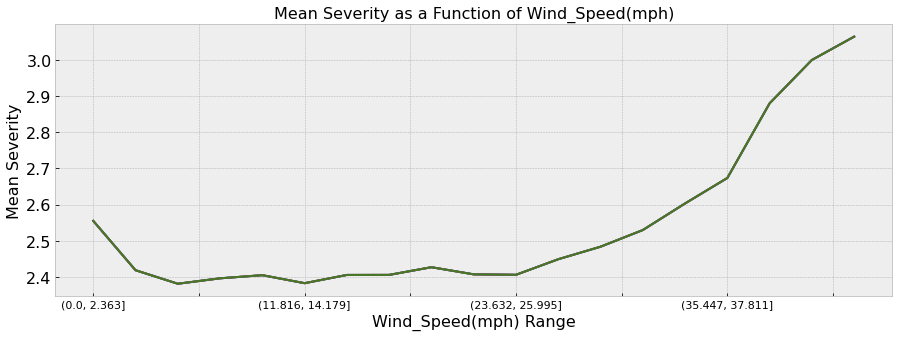

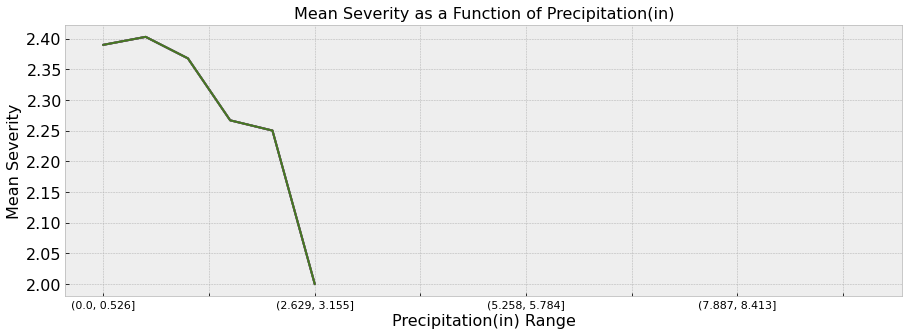

In [ ]:
for factor in numerical_weather:
    factorMin = df[factor].quantile(q=0.0001)
    factorMax = df[factor].quantile(q=0.9999)
    plt.subplots(figsize=(15,5))
    for s in np.arange(1,5):
        pd.to_numeric(df["Severity"]).groupby(pd.cut(df[factor], np.linspace(factorMin,factorMax,num=20))).mean().plot()
        plt.title("Mean Severity as a Function of " + factor, fontsize=16)
        plt.xlabel(factor + " Range", fontsize=16)
        plt.ylabel("Mean Severity", fontsize=16)
        plt.xticks(fontsize=11)
        plt.yticks(fontsize=16)

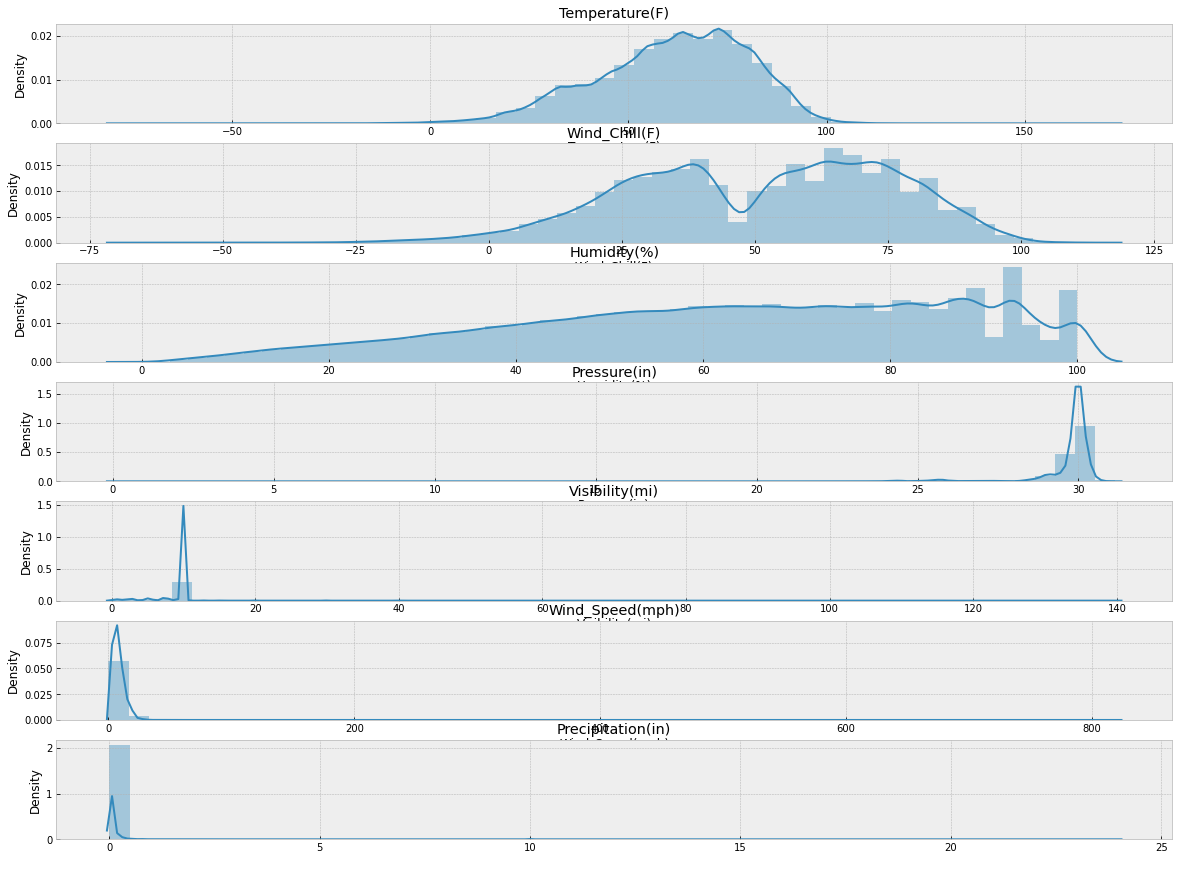

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
f,axes=plt.subplots(7,1,figsize=(20,15))                                   
sns.distplot(df['Temperature(F)'],ax=axes[0]).set_title('Temperature(F)')                                                                
sns.distplot(df['Wind_Chill(F)'],ax=axes[1]).set_title('Wind_Chill(F)')                              
sns.distplot(df['Humidity(%)'],ax=axes[2]).set_title('Humidity(%)')        
sns.distplot(df['Pressure(in)'],ax=axes[3]).set_title('Pressure(in)')
sns.distplot(df['Visibility(mi)'],ax=axes[4]).set_title('Visibility(mi)') 
sns.distplot(df['Wind_Speed(mph)'],ax=axes[5]).set_title('Wind_Speed(mph)')
sns.distplot(df['Precipitation(in)'],ax=axes[6]).set_title('Precipitation(in)')
axes[6].set_xlabel('       ')
plt.show()

In [ ]:
def boxPlotForNumerical(df):    
  fig,ax=plt.subplots(nrows = 2, ncols = 4, figsize=(18,10),subplot_kw=dict(projection='rectilinear'),gridspec_kw={'hspace':0.5, 'wspace': 0.3})
  sns.boxplot(x = "Temperature(F)", data = df, orient = 'v', ax = ax[0][0])
  ax[0][0].set_title('Distribution', fontsize=15)
  ax[0][0].tick_params(labelsize=15)

  sns.boxplot(x = "Wind_Chill(F)", data = df, orient = 'v', ax = ax[0][1])
  ax[0][1].set_title('"Distribution"', fontsize=15)
  ax[0][1].tick_params(labelsize=15)

  sns.boxplot(x = "Humidity(%)", data = df, orient = 'v', ax = ax[0][2])
  ax[0][2].set_title('Distribution', fontsize=15)
  ax[0][2].tick_params(labelsize=15)

  sns.boxplot(x = "Pressure(in)", data = df, orient = 'v', ax = ax[0][3])
  ax[0][3].set_title('Distribution', fontsize=15)
  ax[0][3].tick_params(labelsize=15)

  sns.boxplot(x = "Visibility(mi)", data = df, orient = 'v', ax = ax[1][0])
  ax[1][0].set_title('Distribution', fontsize=15)
  ax[1][0].tick_params(labelsize=15)

  sns.boxplot(x = "Wind_Speed(mph)", data = df, orient = 'v', ax = ax[1][1])
  ax[1][1].set_title('Distribution', fontsize=15)
  ax[1][1].tick_params(labelsize=15)

  sns.boxplot(x = "Precipitation(in)", data = df, orient = 'v', ax = ax[1][2])
  ax[1][2].set_title('Distribution', fontsize=15)
  ax[1][2].tick_params(labelsize=15)

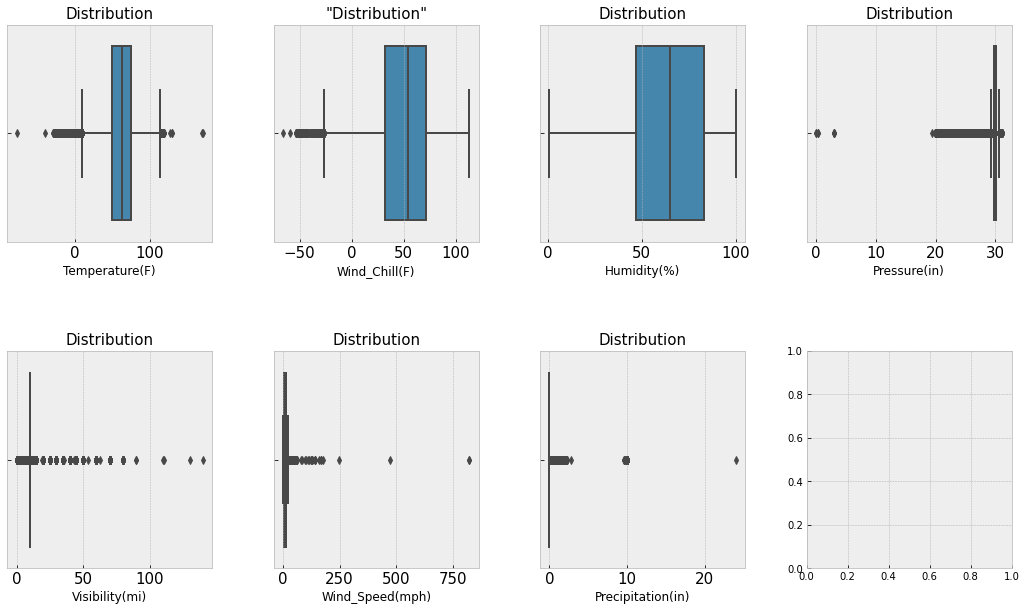

In [ ]:
boxPlotForNumerical(df) 

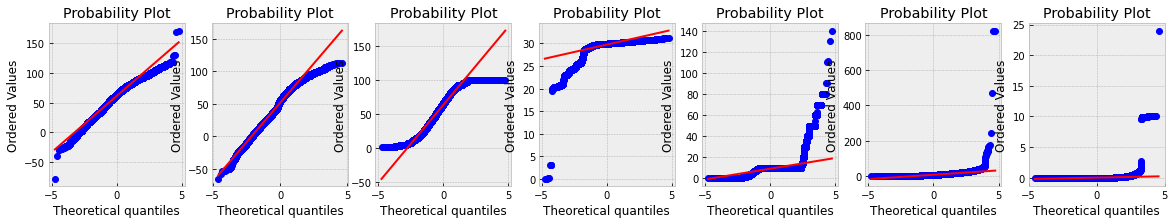

In [ ]:
from scipy import stats
import seaborn as sns
f,axes=plt.subplots(1,7,figsize=(20,3))

ax1 = plt.subplot(171)
res = stats.probplot(df['Temperature(F)'].dropna(), plot=sns.mpl.pyplot)
ax2 = plt.subplot(172)
res = stats.probplot(df['Wind_Chill(F)'].dropna(), plot=sns.mpl.pyplot)
ax3 = plt.subplot(173)
res = stats.probplot(df['Humidity(%)'].dropna(), plot=sns.mpl.pyplot)
ax4 = plt.subplot(174)
res = stats.probplot(df['Pressure(in)'].dropna(), plot=sns.mpl.pyplot)
ax5 = plt.subplot(175)
res = stats.probplot(df['Visibility(mi)'].dropna(), plot=sns.mpl.pyplot)
ax6 = plt.subplot(176)
res = stats.probplot(df['Wind_Speed(mph)'].dropna(), plot=sns.mpl.pyplot)
ax7 = plt.subplot(177)
res = stats.probplot(df['Precipitation(in)'].dropna(), plot=sns.mpl.pyplot)

In [ ]:
;#qq plotlar da normal dağılımdan epey uzaklar ama hipotez testi ile ispatlamış olalım
#H0: dağılımımızla teorik normal dağılım arasında istatistiki açıdan anlamlı bir fark yoktur.
#H1: dağılımımızla teorik normal dağılım arasında istatistiki açıdan anlamlı bir fark vardır.
from scipy import stats
for col in df[numerical_except_coordinates].columns :
  shapiro_test = stats.shapiro(df[col].dropna())
  print("Test istatistiği =" , shapiro_test[0] , ", P-value =",shapiro_test[1])     
                                                                                    
# çıktılara göre;                                                                                    
#p valuelerin 0 a yuvarlanma sebebi datasetin büyüklüğü yüzünden olabilir ama yine de normalliği reddedebiliriz.
#tüm sütunlar için h0 hipotezi reddedildi(p-value<0.05 ise H0 hipotezi reddedilir) yani normal dağılıma uymuyoruz 
#normal dağılıma uymadıkları için parametrik değil nonparametrik kapsamda ele alınmalılar örneğin outlier yöntemi seçerken z-score kullanamayacağız
#nonparametrik veriye dayanıklı outlier yöntemlerinden 2tanesi : Dbscan , isolation forest
#Dbscan öncesinde scaling istiyor ama biz daha görsellemelere falan girmedik o yüzden scaling etmemiz gerekmeyen isolation foresti seçelim 

Test istatistiği = 0.9816997051239014 , P-value = 0.0
Test istatistiği = 0.9791549444198608 , P-value = 0.0
Test istatistiği = 0.9679535031318665 , P-value = 0.0
Test istatistiği = 0.4945230484008789 , P-value = 0.0
Test istatistiği = 0.40741705894470215 , P-value = 0.0
Test istatistiği = 0.8580366969108582 , P-value = 0.0
Test istatistiği = 0.03843313455581665 , P-value = 0.0
Test istatistiği = 0.27736032009124756 , P-value = 0.0
Test istatistiği = 0.006163477897644043 , P-value = 0.0


In [ ]:
df_sub_shapiro = df[(df.Severity == 3)].query("City=='Los Angeles'")
for col in df_sub_shapiro[numerical_except_coordinates].columns :
  shapiro_test = stats.shapiro(df_sub_shapiro[col].dropna())
  print("Test istatistiği =" , shapiro_test[0] , ", P-value =",shapiro_test[1])     

Test istatistiği = 0.985535740852356 , P-value = 8.573640061793064e-12
Test istatistiği = 0.9734495878219604 , P-value = 0.00020126119488850236
Test istatistiği = 0.9602447748184204 , P-value = 8.464170854388605e-21
Test istatistiği = 0.9803903698921204 , P-value = 2.9662863419883945e-14
Test istatistiği = 0.5484300851821899 , P-value = 0.0
Test istatistiği = 0.9119226336479187 , P-value = 3.5855577232256825e-23
Test istatistiği = 0.340731143951416 , P-value = 4.8914902351867346e-33
Test istatistiği = 0.8315963745117188 , P-value = 1.0621375727193493e-38
Test istatistiği = 0.6206018924713135 , P-value = 0.0


In [ ]:
def missing_value_framer (data):    
  percent_missing = data.isnull().sum() * 100 / len(data)
  missing_value_df = pd.DataFrame({'column_name': data.columns,
                                   'percent_missing': percent_missing})

  missing_value_df.sort_values('percent_missing', inplace=True)

  return missing_value_df
missing_value_framer(df)

column_name  percent_missing
Severity                                    Severity         0.000000
Traffic_Calming                      Traffic_Calming         0.000000
Traffic_Signal                        Traffic_Signal         0.000000
Month                                          Month         0.000000
Weekday                                      Weekday         0.000000
Day                                              Day         0.000000
Hour                                            Hour         0.000000
Minute                                        Minute         0.000000
Duration                                    Duration         0.000000
Clear                                          Clear         0.000000
Cloud                                          Cloud         0.000000
Rain                                            Rain         0.000000
Heavy_Rain                                Heavy_Rain         0.000000
Stop                                            Stop         0.000000
Snow                                            Snow         0.000000
Fog                                              Fog         0.000000
Hail                                            Hail         0.000000
Drizzle                                      Drizzle         0.000000
Misc_Weather_Disturbances  Misc_Weather_Disturbances         0.000000
Highway                                      Highway         0.000000
Rd                                                Rd         0.000000
St                                                St         0.000000
Dr                                                Dr         0.000000
Ave                                              Ave         0.000000
Blvd                                            Blvd         0.000000
Road                                            Road         0.000000
Time_Of_Day                              Time_Of_Day         0.000000
Heavy_Snow                                Heavy_Snow         0.000000
Season                                        Season         0.000000
Station                                      Station         0.000000
No_Exit                                      No_Exit         0.000000
Start_Lat                                  Start_Lat         0.000000
Start_Lng                                  Start_Lng         0.000000
Distance(mi)                            Distance(mi)         0.000000
Description                              Description         0.000000
Street                                        Street         0.000000
Side                                            Side         0.000000
County                                        County         0.000000
State                                          State         0.000000
Railway                                      Railway         0.000000
Day_Type                                    Day_Type         0.000000
Junction                                    Junction         0.000000
Give_Way                                    Give_Way         0.000000
Crossing                                    Crossing         0.000000
Bump                                            Bump         0.000000
Amenity                                      Amenity         0.000000
City                                            City         0.005221
Zipcode                                      Zipcode         0.084229
Timezone                                    Timezone         0.186458
Airport_Code                            Airport_Code         0.274397
Wind_Direction                        Wind_Direction         1.898933
Pressure(in)                            Pressure(in)         2.098995
Temperature(F)                        Temperature(F)         2.472461
Humidity(%)                              Humidity(%)         2.579087
Visibility(mi)                        Visibility(mi)         2.701789
Weather_Condition                  Weather_Condition         2.737789
Wind_Speed(mph)                      Wind_Speed(mph

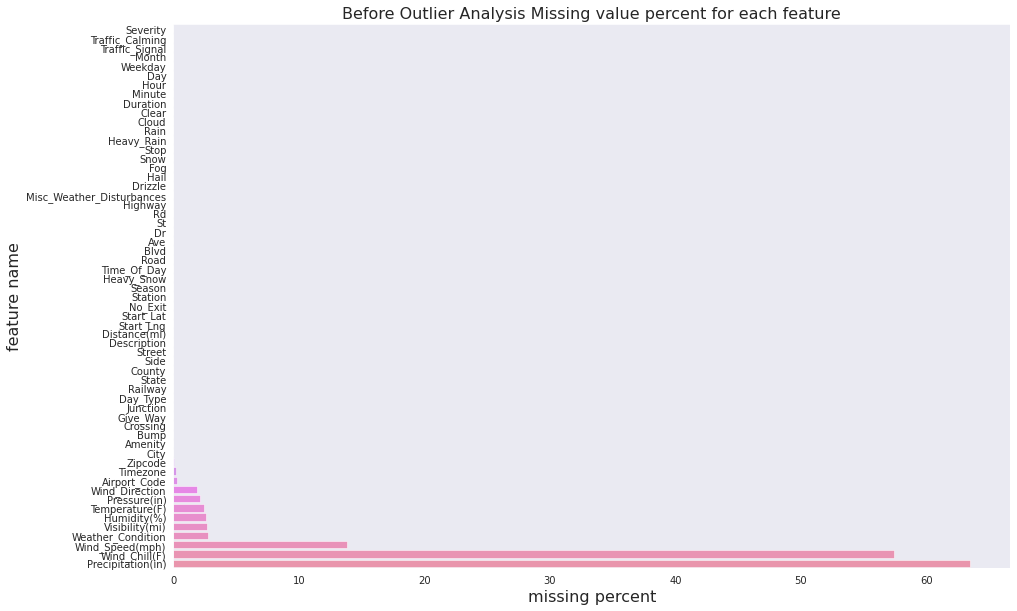

In [ ]:
import seaborn as sns        
import matplotlib.pyplot as plt
sns.set_style("dark")
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=missing_value_framer(df)["percent_missing"], y=missing_value_framer(df).index, ax=ax)
ax.set_title("Before Outlier Analysis Missing value percent for each feature", fontsize=16)
ax.set_xlabel("missing percent", fontsize=16)
ax.set_ylabel("feature name", fontsize=16)
plt.show()
plt.close()

In [ ]:
df.Severity.value_counts()

2    525104
3    115163
4     87510
Name: Severity, dtype: int64

In [ ]:
df.Severity.value_counts(normalize=True)

2    0.721518
3    0.158239
4    0.120243
Name: Severity, dtype: float64

In [ ]:
import gc 
gc.collect()

61624

In [ ]:
############################################################################################################################################################################################

In [ ]:
df_text = df[['Description','Severity']]

In [ ]:
#!python -m pip install textblob
from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

In [ ]:
#buyuk-kucuk donusumu
df_text['Description'] = df_text['Description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#noktalama işaretleri
df_text['Description'] = df_text['Description'].str.replace('[^\w\s]','')
#sayılar
df_text['Description'] = df_text['Description'].str.replace('\d','')
#stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
df_text['Description'] = df_text['Description'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
#seyreklerin silinmesi
sil = pd.Series(' '.join(df_text['Description']).split()).value_counts()[-1000:]
df_text['Description'] = df_text['Description'].apply(lambda x: " ".join(x for x in x.split() if x not in sil))
#lemmi
from textblob import Word
nltk.download('wordnet')
df_text['Description'] = df_text['Description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = model_selection.train_test_split(df_text["Description"],
                                                                   df["Severity"], 
                                                                    random_state = 42)

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(train_x)
x_train_count = vectorizer.transform(train_x)
x_test_count = vectorizer.transform(test_x)

In [ ]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_count, train_y)
accuracy = model_selection.cross_val_score(loj_model, 
                                           x_test_count, 
                                           test_y, 
                                           cv = 10).mean()

print("Count Vectors Doğruluk Oranı:", accuracy)

Count Vectors Doğruluk Oranı: 0.8492016857911026


In [ ]:
############################################################################################################################################################################################

In [ ]:
text_df = df[['Description','Severity']]

In [ ]:
from more_itertools import sliced
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, SpatialDropout1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 100
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 500
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(text_df['Description'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 24450 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(text_df['Description'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Y = pd.get_dummies(text_df['Severity']).values
print('Shape of label tensor:', Y.shape)

Shape of data tensor: (727777, 500)
Shape of label tensor: (727777, 3)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(654999, 500) (654999, 3)
(72778, 500) (72778, 3)


In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(LSTM(10, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# choose epochs and batch_size
epochs = 1
batch_size = 64
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

9211/9211 [==============================] - 5489s 596ms/step - loss: 0.2637 - accuracy: 0.8474 - val_loss: 0.2581 - val_accuracy: 0.8489


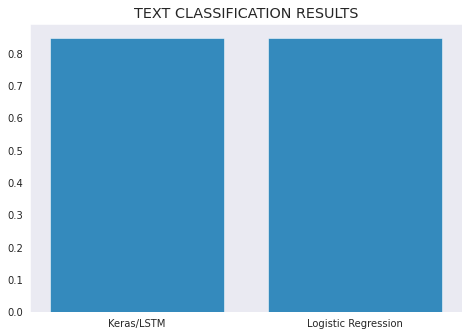

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['Keras/LSTM', 'Logistic Regression']
scores = [0.8492,0.8489]
plt.title('TEXT CLASSIFICATION RESULTS')
ax.bar(models,scores)
plt.show()

In [ ]:
df.drop('Description',axis=1,inplace=True)

In [ ]:
strat_labels=['Bump','Hail','Misc_Weather_Disturbances','Traffic_Calming']

X = df.drop('Severity',axis=1)
y = df['Severity']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=df[strat_labels])

pd.to_numeric(y_train)
pd.to_numeric(y_test)

df.shape , X_train.shape , X_test.shape , y_train , y_test

((727777, 58), (582221, 57), (145556, 57), 3275283    3
 3512875    2
 3375879    2
 2609936    2
 3451052    3
           ..
 3159784    2
 3354364    3
 3150032    2
 2676360    2
 2514967    3
 Name: Severity, Length: 582221, dtype: category
 Categories (3, int64): [2, 3, 4], 3261327    2
 3176946    2
 3280620    3
 2550488    2
 2711127    3
           ..
 3124773    2
 3164728    2
 3423519    4
 2578700    2
 2694933    2
 Name: Severity, Length: 145556, dtype: category
 Categories (3, int64): [2, 3, 4])

In [ ]:
train_nan_dropped_for_isoF = X_train[numerical_except_coordinates].dropna()
test_nan_dropped_for_isoF = X_test[numerical_except_coordinates].dropna()

In [ ]:
# isolation forests outlier 
# Isolation Forest is a non-parametric method for large datasets in a one or multi dimensional feature space.
from sklearn.ensemble import IsolationForest
iso = IsolationForest(n_estimators=100,
    max_samples=256,
    max_features=1.0,
    bootstrap=False,
    n_jobs=-1,
    random_state=42,
    verbose=1000,
    contamination=0.1,
    behaviour="new")


## TRAIN İÇİN:
preds = iso.fit_predict(train_nan_dropped_for_isoF) # preds arrayı : 1 1 -1 -1 1 1 1 -1 gibi değerlerle doludur. 1 ve -1 outlier olup olmadıgının semboludur
mask = preds != -1  #mask nesnesi oluşturuyoruz outlier olmayanları işaretliyecek

#outlierleri alıyoruz [~mask] ile. ~ işareti tersi anlamına sokuyor.
train_outliers_vector = X_train[numerical_except_coordinates][X_train.index.isin(train_nan_dropped_for_isoF.index)][~mask] 
#outlierleri missing yapıyoruz. missing impute aşamasında önce ki missinglerle beraber doldurulacaklar.
X_train.loc[X_train.index.isin(train_outliers_vector.index),numerical_except_coordinates] = np.nan

## TEST İÇİN(train ile aynı işlemler,fakat trainde fitpredict yaparken testte sadece predict yapıyoruz)
preds_test = iso.predict(test_nan_dropped_for_isoF)
mask_test = preds_test != -1
outliers_vector_test = X_test[numerical_except_coordinates][X_test.index.isin(test_nan_dropped_for_isoF.index)][~mask_test]
X_test.loc[X_test.index.isin(outliers_vector_test.index),numerical_except_coordinates] = np.nan

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
Building estimator 1 of 50 for this parallel run (total 100)...
Building estimator 1 of 50 for this parallel run (total 100)...
Building estimator 2 of 50 for this parallel run (total 100)...
Building estimator 2 of 50 for this parallel run (total 100)...
Building estimator 3 of 50 for this parallel run (total 100)...
Building estimator 3 of 50 for this parallel run (total 100)...
Building estimator 4 of 50 for this parallel run (total 100)...
Building estimator 4 of 50 for this parallel run (total 100)...
Building estimator 5 of 50 for this parallel run (total 100)...
Building estimator 5 of 50 for this parallel run (total 100)...
Building estimator 6 of 50 for this parallel run (total 100)...
Building estimator 6 of 50 for this parallel run (total 100)...
Building estimator 7 of 50 for this parallel run (total 100)...
Building estimator 7 of 50 for this parallel run (total 100)...
Building estimator 8 of 

In [ ]:
from IPython.display import display_html                                         
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [ ]:
display_side_by_side(missing_value_framer(df.drop('Severity',axis=1)),missing_value_framer(X_train),missing_value_framer(X_test))

column_name 
 percent_missing 
 
 
 
 
 Start_Lat 
 Start_Lat 
 0.000000 
 
 
 Traffic_Signal 
 Traffic_Signal 
 0.000000 
 
 
 Month 
 Month 
 0.000000 
 
 
 Weekday 
 Weekday 
 0.000000 
 
 
 Day 
 Day 
 0.000000 
 
 
 Hour 
 Hour 
 0.000000 
 
 
 Minute 
 Minute 
 0.000000 
 
 
 Duration 
 Duration 
 0.000000 
 
 
 Clear 
 Clear 
 0.000000 
 
 
 Cloud 
 Cloud 
 0.000000 
 
 
 Rain 
 Rain 
 0.000000 
 
 
 Heavy_Rain 
 Heavy_Rain 
 0.000000 
 
 
 Snow 
 Snow 
 0.000000 
 
 
 Heavy_Snow 
 Heavy_Snow 
 0.000000 
 
 
 Fog 
 Fog 
 0.000000 
 
 
 Hail 
 Hail 
 0.000000 
 
 
 Drizzle 
 Drizzle 
 0.000000 
 
 
 Misc_Weather_Disturbances 
 Misc_Weather_Disturbances 
 0.000000 
 
 
 Highway 
 Highway 
 0.000000 
 
 
 Rd 
 Rd 
 0.000000 
 
 
 St 
 St 
 0.000000 
 
 
 Dr 
 Dr 
 0.000000 
 
 
 Ave 
 Ave 
 0.000000 
 
 
 Blvd 
 Blvd 
 0.000000 
 
 
 Road 
 Road 
 0.000000 
 
 
 Time_Of_Day 
 Time_Of_Day 
 0.000000 
 
 
 Traffic_Calming 
 Traffic_Calming 
 0.000000 
 
 
 Season 
 Season 
 0.000000 
 
 
 Stop 
 Stop 
 0.000000 
 
 
 Railway 
 Railway 
 0.000000 
 
 
 Start_Lng 
 Start_Lng 
 0.000000 
 
 
 Distance(mi) 
 Distance(mi) 
 0.000000 
 
 
 Street 
 Street 
 0.000000 
 
 
 Side 
 Side 
 0.000000 
 
 
 County 
 County 
 0.000000 
 
 
 State 
 State 
 0.000000 
 
 
 Station 
 Station 
 0.000000 
 
 
 Day_Type 
 Day_Type 
 0.000000 
 
 
 No_Exit 
 No_Exit 
 0.000000 
 
 
 Junction 
 Junction 
 0.000000 
 
 
 Give_Way 
 Give_Way 
 0.000000 
 
 
 Crossing 
 Crossing 
 0.000000 
 
 
 Amenity 
 Amenity 
 0.000000 
 
 
 Bump 
 Bump 
 0.000000 
 
 
 City 
 City 
 0.005221 
 
 
 Zipcode 
 Zipcode 
 0.084229 
 
 
 Timezone 
 Timezone 
 0.186458 
 
 
 Airport_Code 
 Airport_Code 
 0.274397 
 
 
 Wind_Direction 
 Wind_Direction 
 1.898933 
 
 
 Pressure(in) 
 Pressure(in) 
 2.098995 
 
 
 Temperature(F) 
 Temperature(F) 
 2.472461 
 
 
 Humidity(%) 
 Humidity(%) 
 2.579087 
 
 
 Visibility(mi) 
 Visibility(mi) 
 2.701789 
 
 
 Weather_Condition 
 Weather_Condition 
 2.737789 
 
 
 Wind_Speed(mph) 
 Wind_Speed(mph) 
 13.856855 
 
 
 Wind_Chill(F) 
 Wind_Chill(F) 
 57.418825 
 
 
 Precipitation(in) 
 Precipitation(in) 
 63.511350 
 
 
 
 
 
 
 column_name 
 percent_missing 
 
 
 
 
 Start_Lat 
 Start_Lat 
 0.000000 
 
 
 Traffic_Signal 
 Traffic_Signal 
 0.000000 
 
 
 Month 
 Month 
 0.000000 
 
 
 Weekday 
 Weekday 
 0.000000 
 
 
 Day 
 Day 
 0.000000 
 
 
 Hour 
 Hour 
 0.000000 
 
 
 Minute 
 Minute 
 0.000000 
 
 
 Clear 
 Clear 
 0.000000 
 
 
 Cloud 
 Cloud 
 0.000000 
 
 
 Rain 
 Rain 
 0.000000 
 
 
 Heavy_Rain 
 Heavy_Rain 
 0.000000 
 
 
 Snow 
 Snow 
 0.000000 
 
 
 Traffic_Calming 
 Traffic_Calming 
 0.000000 
 
 
 Heavy_Snow 
 Heavy_Snow 
 0.000000 
 
 
 Hail 
 Hail 
 0.000000 
 
 
 Drizzle 
 Drizzle 
 0.000000 
 
 
 Misc_Weather_Disturbances 
 Misc_Weather_Disturbances 
 0.000000 
 
 
 Highway 
 Highway 
 0.000000 
 
 
 Rd 
 Rd 
 0.000000 
 
 
 St 
 St 
 0.000000 
 
 
 Dr 
 Dr 
 0.000000 
 
 
 Ave 
 Ave 
 0.000000 
 
 
 Blvd 
 Blvd 
 0.000000 
 
 
 Road 
 Road 
 0.000000 
 
 
 Time_Of_Day 
 Time_Of_Day 
 0.000000 
 
 
 Fog 
 Fog 
 0.000000 
 
 
 Season 
 Season 
 0.000000 
 
 
 Stop 
 Stop 
 0.000000 
 
 
 Railway 
 Railway 
 0.000000 
 
 
 Start_Lng 
 Start_Lng 
 0.000000 
 
 
 Street 
 Street 
 0.000000 
 
 
 Side 
 Side 
 0.000000 
 
 
 County 
 County 
 0.000000 
 
 
 State 
 State 
 0.000000 
 
 
 Station 
 Station 
 0.000000 
 
 
 Day_Type 
 Day_Type 
 0.000000 
 
 
 No_Exit 
 No_Exit 
 0.000000 
 
 
 Junction 
 Junction 
 0.000000 
 
 
 Give_Way 
 Give_Way 
 0.000000 
 
 
 Amenity 
 Amenity 
 0.000000 
 
 
 Crossing 
 Crossing 
 0.000000 
 
 
 Bump 
 Bump 
 0.000000 
 
 
 City 
 City 
 0.005324 
 
 
 Zipcode 
 Zipcode 
 0.082271 
 
 
 Timezone 
 Timezone 
 0.183435 
 
 
 Airport_Code 
 Airport_Code 
 0.271890 
 
 
 Wind_Direction 
 Wind_Direction 
 1.901512 
 
 
 Weather_Condition 
 Weather_Condition 
 2.745349 
 
 
 Distance(mi) 
 Distance(mi) 
 3.012430 
 
 
 Duration 
 Duration 
 3.012430 
 
 
 Pressure(in) 
 Pressure(in

In [ ]:
for i in categorical_datas[1:]:
  print(X_train[i].mode()) 

0    I-5 N
Name: Street, dtype: category
Categories (176204, object): [' 1 Mile Rd', ' 1/2 Ave', ' 1/2 Mile Rd', ' 1/4 Ave', ..., 'Zygmunt Dr',
                              'de Lee Way', 'del Tura Plaza Cir', 'william Carey Dr']
0    R
Name: Side, dtype: category
Categories (3, object): [' ', 'L', 'R']
0    Los Angeles
Name: City, dtype: category
Categories (11893, object): ['Aaronsburg', 'Abbeville', 'Abbotsford', 'Abbott', ..., 'Zumbro Falls',
                             'Zumbrota', 'Zuni', 'Zwingle']
0    Los Angeles
Name: County, dtype: category
Categories (1724, object): ['Abbeville', 'Acadia', 'Accomack', 'Ada', ..., 'York', 'Young', 'Yuba', 'Yuma']
0    CA
Name: State, dtype: category
Categories (49, object): ['AL', 'AR', 'AZ', 'CA', ..., 'WA', 'WI', 'WV', 'WY']
0    91761
Name: Zipcode, dtype: category
Categories (418577, object): ['01001', '01001-1344', '01001-2111', '01001-2928', ...,
                              '99362-1879', '99371', '99401-9712', '99403']
0    US/Pacifi

In [ ]:
from scipy import stats

def groupby_median_imputer(data,features_array,*args):
  """Istenılen sayıda sütunla gruplama yapan median imputer fonksiyonu"""


  from tqdm import tqdm
  print("The numbers of remaining missing values that columns have:")
  for i in tqdm(features_array):
    data[i] = data.groupby([*args])[i].apply(lambda x: x.fillna(np.nanmedian(x)))
    print( i + " : " + data[i].isnull().sum().astype(str))

def groupby_mean_imputer(data,features_array,*args):
  """Istenılen sayıda sütunla gruplama yapan mean imputer fonksiyonu"""


  from tqdm import tqdm
  print("The numbers of remaining missing values that columns have:")
  for i in tqdm(features_array):
    data[i] = data.groupby([*args])[i].apply(lambda x: x.fillna(np.nanmean(x)))
    print( i + " : " + data[i].isnull().sum().astype(str))

def groupby_mode_imputer(data,features_array,*args):
  """Istenılen sayıda sütunla gruplama yapan mode imputer fonksiyonu"""

  from tqdm import tqdm
  print("The numbers of remaining missing values that columns have:")
  for i in tqdm(features_array):
    data[i] = data.groupby([*args])[i].apply(lambda x: x.fillna(x.mode()))
    print( i + " : " + data[i].isnull().sum().astype(str))

def groupby_majority_imputer(data,features_array,*args):
  """Istenılen sayıda sütunla gruplama yapan mode yerine major elementi kullanan imputer fonksiyonu"""

  from collections import Counter
  from tqdm import tqdm
  print("The numbers of remaining missing values that columns have:")
  for i in tqdm(features_array):
    data[i] = data.groupby([*args])[i].apply(lambda x: x.fillna(Counter(x).most_common()[0][0]) if all(x.isnull())==False else x)
    print(i + " : " + data[i].isnull().sum().astype(str)) 

In [ ]:
for i in POI_Time:
  X_train[i].fillna(X_train[i].mode().values[0],inplace=True)

for i in POI_Location:
  X_train[i].fillna(X_train[i].mode().values[0],inplace=True)
 
groupby_majority_imputer(X_train,POI_Weather,'Month','City')
for i in POI_Weather:
  X_train[i].fillna(X_train[i].mode().values[0],inplace=True)

groupby_mode_imputer(X_train,POI_Carriagedrive,'County')
for i in POI_Carriagedrive:
  X_train[i].fillna(X_train[i].mode().values[0],inplace=True)

groupby_mode_imputer(X_train,POI_Traffic,'County')
for i in POI_Traffic:
  X_train[i].fillna(X_train[i].mode().values[0],inplace=True)

 
groupby_median_imputer(X_train,['Duration','Distance(mi)'],'Highway')
X_train['Duration'].fillna(np.nanmedian(X_train['Duration']),inplace=True)
X_train['Distance(mi)'].fillna(np.nanmedian(X_train['Distance(mi)']),inplace=True)

groupby_mode_imputer(X_train,['Start_Lat','Start_Lng'],'County')
X_train['Start_Lat'].fillna(np.nanmedian(X_train['Start_Lat']),inplace=True)
X_train['Start_Lng'].fillna(np.nanmedian(X_train['Start_Lng']),inplace=True)
 

groupby_median_imputer(X_train,numerical_weather,'Month','Weather_Condition','City')
groupby_median_imputer(X_train,numerical_weather,'Month','Weather_Condition')
groupby_median_imputer(X_train,numerical_weather,'Month')
for i in numerical_weather:
  X_train[i].fillna(np.nanmedian(X_train[i]),inplace=True)

  0%|          | 0/12 [00:00<?, ?it/s]

The numbers of remaining missing values that columns have:


  8%|▊         | 1/12 [00:42<07:48, 42.61s/it]

Clear : 0


 17%|█▋        | 2/12 [01:25<07:07, 42.73s/it]

Cloud : 0


 25%|██▌       | 3/12 [02:09<06:26, 42.99s/it]

Rain : 0


 33%|███▎      | 4/12 [02:52<05:44, 43.03s/it]

Heavy_Rain : 0


 42%|████▏     | 5/12 [03:35<05:00, 42.93s/it]

Snow : 0


 50%|█████     | 6/12 [04:18<04:18, 43.11s/it]

Heavy_Snow : 0


 58%|█████▊    | 7/12 [05:01<03:34, 42.92s/it]

Fog : 0


 67%|██████▋   | 8/12 [05:43<02:51, 42.88s/it]

Hail : 0


 75%|███████▌  | 9/12 [06:26<02:08, 42.77s/it]

Drizzle : 0


 83%|████████▎ | 10/12 [07:08<01:25, 42.51s/it]

Misc_Weather_Disturbances : 0


 92%|█████████▏| 11/12 [07:53<00:43, 43.23s/it]

Wind_Direction : 6902


  0%|          | 0/7 [00:00<?, ?it/s]

Weather_Condition : 9003
The numbers of remaining missing values that columns have:


 14%|█▍        | 1/7 [00:02<00:17,  2.99s/it]

Highway : 0


 29%|██▊       | 2/7 [00:06<00:15,  3.05s/it]

Rd : 0


 43%|████▎     | 3/7 [00:09<00:12,  3.07s/it]

St : 0


 57%|█████▋    | 4/7 [00:12<00:09,  3.11s/it]

Dr : 0


 71%|███████▏  | 5/7 [00:15<00:06,  3.12s/it]

Ave : 0


 86%|████████▌ | 6/7 [00:18<00:03,  3.14s/it]

Blvd : 0


  0%|          | 0/12 [00:00<?, ?it/s]

Road : 0
The numbers of remaining missing values that columns have:


  8%|▊         | 1/12 [00:03<00:33,  3.00s/it]

Amenity : 0


 17%|█▋        | 2/12 [00:05<00:29,  2.99s/it]

Bump : 0


 25%|██▌       | 3/12 [00:09<00:27,  3.08s/it]

Side : 0


 33%|███▎      | 4/12 [00:12<00:24,  3.05s/it]

Crossing : 0


 42%|████▏     | 5/12 [00:15<00:21,  3.02s/it]

Give_Way : 0


 50%|█████     | 6/12 [00:18<00:18,  3.00s/it]

Junction : 0


 58%|█████▊    | 7/12 [00:21<00:15,  3.01s/it]

No_Exit : 0


 67%|██████▋   | 8/12 [00:24<00:12,  3.10s/it]

Railway : 0


 75%|███████▌  | 9/12 [00:27<00:09,  3.04s/it]

Station : 0


 83%|████████▎ | 10/12 [00:30<00:06,  3.03s/it]

Stop : 0


 92%|█████████▏| 11/12 [00:33<00:02,  2.98s/it]

Traffic_Calming : 0


  0%|          | 0/2 [00:00<?, ?it/s]

Traffic_Signal : 0
The numbers of remaining missing values that columns have:
Duration : 0


  0%|          | 0/2 [00:00<?, ?it/s]

Distance(mi) : 0
The numbers of remaining missing values that columns have:


 50%|█████     | 1/2 [00:01<00:01,  1.36s/it]

Start_Lat : 0


  0%|          | 0/7 [00:00<?, ?it/s]

Start_Lng : 0
The numbers of remaining missing values that columns have:


 14%|█▍        | 1/7 [00:37<03:42, 37.04s/it]

Temperature(F) : 8880


 29%|██▊       | 2/7 [01:10<03:00, 36.02s/it]

Wind_Chill(F) : 98841


 43%|████▎     | 3/7 [01:48<02:25, 36.44s/it]

Humidity(%) : 9054


 57%|█████▋    | 4/7 [02:25<01:50, 36.80s/it]

Pressure(in) : 8503


 71%|███████▏  | 5/7 [03:03<01:14, 37.17s/it]

Visibility(mi) : 10142


 86%|████████▌ | 6/7 [03:41<00:37, 37.27s/it]

Wind_Speed(mph) : 19322


 14%|█▍        | 1/7 [00:00<00:00,  7.25it/s]

Precipitation(in) : 132148
The numbers of remaining missing values that columns have:
Temperature(F) : 11


 43%|████▎     | 3/7 [00:00<00:00,  7.48it/s]

Wind_Chill(F) : 34
Humidity(%) : 11


 71%|███████▏  | 5/7 [00:00<00:00,  7.91it/s]

Pressure(in) : 10
Visibility(mi) : 10


  0%|          | 0/7 [00:00<?, ?it/s]

Wind_Speed(mph) : 13
Precipitation(in) : 31
The numbers of remaining missing values that columns have:
Temperature(F) : 0


 57%|█████▋    | 4/7 [00:00<00:00, 14.13it/s]

Wind_Chill(F) : 0
Humidity(%) : 0
Pressure(in) : 0


100%|██████████| 7/7 [00:00<00:00, 13.99it/s]

Visibility(mi) : 0
Wind_Speed(mph) : 0
Precipitation(in) : 0


In [ ]:
for i in POI_Time:
  X_test[i].fillna(X_test[i].mode().values[0],inplace=True)

for i in POI_Location:
  X_test[i].fillna(X_test[i].mode().values[0],inplace=True)
  
groupby_majority_imputer(X_test,POI_Weather,'Month','City')
for i in POI_Weather:
  X_test[i].fillna(X_test[i].mode().values[0],inplace=True)
 
groupby_mode_imputer(X_test,POI_Carriagedrive,'County')
for i in POI_Carriagedrive:
  X_test[i].fillna(X_test[i].mode().values[0],inplace=True)
  

groupby_mode_imputer(X_test,POI_Traffic,'County')
for i in POI_Traffic:
  X_test[i].fillna(X_test[i].mode().values[0],inplace=True)



groupby_mean_imputer(X_test,['Duration','Distance(mi)'],'Highway')
X_test['Duration'].fillna(np.nanmean(X_test['Duration']),inplace=True)
X_test['Distance(mi)'].fillna(np.nanmean(X_test['Distance(mi)']),inplace=True)

groupby_mode_imputer(X_test,['Start_Lat','Start_Lng'],'County')
X_test['Start_Lat'].fillna(np.nanmedian(X_test['Start_Lat']),inplace=True)
X_test['Start_Lng'].fillna(np.nanmedian(X_test['Start_Lng']),inplace=True)
 

groupby_median_imputer(X_test,numerical_weather,'Month','Weather_Condition','City')
groupby_median_imputer(X_test,numerical_weather,'Month','Weather_Condition')
groupby_median_imputer(X_test,numerical_weather,'Month')
for i in numerical_weather:
  X_test[i].fillna(np.nanmedian(X_test[i]),inplace=True)

  0%|          | 0/12 [00:00<?, ?it/s]

The numbers of remaining missing values that columns have:


  8%|▊         | 1/12 [00:24<04:29, 24.47s/it]

Clear : 0


 17%|█▋        | 2/12 [00:48<04:02, 24.23s/it]

Cloud : 0


 25%|██▌       | 3/12 [01:11<03:35, 23.90s/it]

Rain : 0


 33%|███▎      | 4/12 [01:34<03:10, 23.82s/it]

Heavy_Rain : 0


 42%|████▏     | 5/12 [01:58<02:45, 23.62s/it]

Snow : 0


 50%|█████     | 6/12 [02:22<02:23, 23.87s/it]

Heavy_Snow : 0


 58%|█████▊    | 7/12 [02:46<01:58, 23.79s/it]

Fog : 0


 67%|██████▋   | 8/12 [03:09<01:34, 23.62s/it]

Hail : 0


 75%|███████▌  | 9/12 [03:32<01:10, 23.48s/it]

Drizzle : 0


 83%|████████▎ | 10/12 [03:56<00:47, 23.53s/it]

Misc_Weather_Disturbances : 0


 92%|█████████▏| 11/12 [04:22<00:24, 24.42s/it]

Wind_Direction : 1797


  0%|          | 0/7 [00:00<?, ?it/s]

Weather_Condition : 2449
The numbers of remaining missing values that columns have:


 14%|█▍        | 1/7 [00:03<00:18,  3.04s/it]

Highway : 0


 29%|██▊       | 2/7 [00:06<00:15,  3.03s/it]

Rd : 0


 43%|████▎     | 3/7 [00:09<00:12,  3.03s/it]

St : 0


 57%|█████▋    | 4/7 [00:12<00:09,  3.04s/it]

Dr : 0


 71%|███████▏  | 5/7 [00:15<00:06,  3.17s/it]

Ave : 0


 86%|████████▌ | 6/7 [00:18<00:03,  3.13s/it]

Blvd : 0


  0%|          | 0/12 [00:00<?, ?it/s]

Road : 0
The numbers of remaining missing values that columns have:


  8%|▊         | 1/12 [00:02<00:32,  2.95s/it]

Amenity : 0


 17%|█▋        | 2/12 [00:05<00:29,  2.97s/it]

Bump : 0


 25%|██▌       | 3/12 [00:09<00:27,  3.10s/it]

Side : 0


 33%|███▎      | 4/12 [00:12<00:24,  3.11s/it]

Crossing : 0


 42%|████▏     | 5/12 [00:15<00:21,  3.06s/it]

Give_Way : 0


 50%|█████     | 6/12 [00:18<00:18,  3.04s/it]

Junction : 0


 58%|█████▊    | 7/12 [00:21<00:15,  3.02s/it]

No_Exit : 0


 67%|██████▋   | 8/12 [00:24<00:12,  3.13s/it]

Railway : 0


 75%|███████▌  | 9/12 [00:27<00:09,  3.06s/it]

Station : 0


 83%|████████▎ | 10/12 [00:30<00:06,  3.05s/it]

Stop : 0


 92%|█████████▏| 11/12 [00:33<00:03,  3.02s/it]

Traffic_Calming : 0


  0%|          | 0/2 [00:00<?, ?it/s]

Traffic_Signal : 0
The numbers of remaining missing values that columns have:
Duration : 0
Distance(mi) : 0
The numbers of remaining missing values that columns have:


 50%|█████     | 1/2 [00:01<00:01,  1.43s/it]

Start_Lat : 0


  0%|          | 0/7 [00:00<?, ?it/s]

Start_Lng : 0
The numbers of remaining missing values that columns have:


 14%|█▍        | 1/7 [00:20<02:00, 20.14s/it]

Temperature(F) : 3358


 29%|██▊       | 2/7 [00:38<01:37, 19.52s/it]

Wind_Chill(F) : 39095


 43%|████▎     | 3/7 [00:57<01:18, 19.59s/it]

Humidity(%) : 3413


 57%|█████▋    | 4/7 [01:18<00:59, 19.86s/it]

Pressure(in) : 3172


 71%|███████▏  | 5/7 [01:37<00:39, 19.71s/it]

Visibility(mi) : 3708


 86%|████████▌ | 6/7 [01:57<00:19, 19.77s/it]

Wind_Speed(mph) : 8190


 29%|██▊       | 2/7 [00:00<00:00, 15.26it/s]

Precipitation(in) : 48127
The numbers of remaining missing values that columns have:
Temperature(F) : 5
Wind_Chill(F) : 16
Humidity(%) : 5


  0%|          | 0/7 [00:00<?, ?it/s]

Pressure(in) : 5
Visibility(mi) : 5
Wind_Speed(mph) : 7
Precipitation(in) : 27
The numbers of remaining missing values that columns have:


100%|██████████| 7/7 [00:00<00:00, 47.20it/s]

Temperature(F) : 0
Wind_Chill(F) : 0
Humidity(%) : 0
Pressure(in) : 0
Visibility(mi) : 0
Wind_Speed(mph) : 0
Precipitation(in) : 0


In [ ]:
display_side_by_side(missing_value_framer(df.drop('Severity',axis=1)),missing_value_framer(X_train),missing_value_framer(X_test))

column_name 
 percent_missing 
 
 
 
 
 Start_Lat 
 Start_Lat 
 0.000000 
 
 
 Traffic_Signal 
 Traffic_Signal 
 0.000000 
 
 
 Month 
 Month 
 0.000000 
 
 
 Weekday 
 Weekday 
 0.000000 
 
 
 Day 
 Day 
 0.000000 
 
 
 Hour 
 Hour 
 0.000000 
 
 
 Minute 
 Minute 
 0.000000 
 
 
 Duration 
 Duration 
 0.000000 
 
 
 Clear 
 Clear 
 0.000000 
 
 
 Cloud 
 Cloud 
 0.000000 
 
 
 Rain 
 Rain 
 0.000000 
 
 
 Heavy_Rain 
 Heavy_Rain 
 0.000000 
 
 
 Snow 
 Snow 
 0.000000 
 
 
 Heavy_Snow 
 Heavy_Snow 
 0.000000 
 
 
 Fog 
 Fog 
 0.000000 
 
 
 Hail 
 Hail 
 0.000000 
 
 
 Drizzle 
 Drizzle 
 0.000000 
 
 
 Misc_Weather_Disturbances 
 Misc_Weather_Disturbances 
 0.000000 
 
 
 Highway 
 Highway 
 0.000000 
 
 
 Rd 
 Rd 
 0.000000 
 
 
 St 
 St 
 0.000000 
 
 
 Dr 
 Dr 
 0.000000 
 
 
 Ave 
 Ave 
 0.000000 
 
 
 Blvd 
 Blvd 
 0.000000 
 
 
 Road 
 Road 
 0.000000 
 
 
 Time_Of_Day 
 Time_Of_Day 
 0.000000 
 
 
 Traffic_Calming 
 Traffic_Calming 
 0.000000 
 
 
 Season 
 Season 
 0.000000 
 
 
 Stop 
 Stop 
 0.000000 
 
 
 Railway 
 Railway 
 0.000000 
 
 
 Start_Lng 
 Start_Lng 
 0.000000 
 
 
 Distance(mi) 
 Distance(mi) 
 0.000000 
 
 
 Street 
 Street 
 0.000000 
 
 
 Side 
 Side 
 0.000000 
 
 
 County 
 County 
 0.000000 
 
 
 State 
 State 
 0.000000 
 
 
 Station 
 Station 
 0.000000 
 
 
 Day_Type 
 Day_Type 
 0.000000 
 
 
 No_Exit 
 No_Exit 
 0.000000 
 
 
 Junction 
 Junction 
 0.000000 
 
 
 Give_Way 
 Give_Way 
 0.000000 
 
 
 Crossing 
 Crossing 
 0.000000 
 
 
 Amenity 
 Amenity 
 0.000000 
 
 
 Bump 
 Bump 
 0.000000 
 
 
 City 
 City 
 0.005221 
 
 
 Zipcode 
 Zipcode 
 0.084229 
 
 
 Timezone 
 Timezone 
 0.186458 
 
 
 Airport_Code 
 Airport_Code 
 0.274397 
 
 
 Wind_Direction 
 Wind_Direction 
 1.898933 
 
 
 Pressure(in) 
 Pressure(in) 
 2.098995 
 
 
 Temperature(F) 
 Temperature(F) 
 2.472461 
 
 
 Humidity(%) 
 Humidity(%) 
 2.579087 
 
 
 Visibility(mi) 
 Visibility(mi) 
 2.701789 
 
 
 Weather_Condition 
 Weather_Condition 
 2.737789 
 
 
 Wind_Speed(mph) 
 Wind_Speed(mph) 
 13.856855 
 
 
 Wind_Chill(F) 
 Wind_Chill(F) 
 57.418825 
 
 
 Precipitation(in) 
 Precipitation(in) 
 63.511350 
 
 
 
 
 
 
 column_name 
 percent_missing 
 
 
 
 
 Start_Lat 
 Start_Lat 
 0.0 
 
 
 Traffic_Signal 
 Traffic_Signal 
 0.0 
 
 
 Month 
 Month 
 0.0 
 
 
 Weekday 
 Weekday 
 0.0 
 
 
 Day 
 Day 
 0.0 
 
 
 Hour 
 Hour 
 0.0 
 
 
 Minute 
 Minute 
 0.0 
 
 
 Duration 
 Duration 
 0.0 
 
 
 Clear 
 Clear 
 0.0 
 
 
 Cloud 
 Cloud 
 0.0 
 
 
 Rain 
 Rain 
 0.0 
 
 
 Heavy_Rain 
 Heavy_Rain 
 0.0 
 
 
 Snow 
 Snow 
 0.0 
 
 
 Heavy_Snow 
 Heavy_Snow 
 0.0 
 
 
 Fog 
 Fog 
 0.0 
 
 
 Hail 
 Hail 
 0.0 
 
 
 Drizzle 
 Drizzle 
 0.0 
 
 
 Misc_Weather_Disturbances 
 Misc_Weather_Disturbances 
 0.0 
 
 
 Highway 
 Highway 
 0.0 
 
 
 Rd 
 Rd 
 0.0 
 
 
 St 
 St 
 0.0 
 
 
 Dr 
 Dr 
 0.0 
 
 
 Ave 
 Ave 
 0.0 
 
 
 Blvd 
 Blvd 
 0.0 
 
 
 Road 
 Road 
 0.0 
 
 
 Time_Of_Day 
 Time_Of_Day 
 0.0 
 
 
 Traffic_Calming 
 Traffic_Calming 
 0.0 
 
 
 Season 
 Season 
 0.0 
 
 
 Stop 
 Stop 
 0.0 
 
 
 Railway 
 Railway 
 0.0 
 
 
 Start_Lng 
 Start_Lng 
 0.0 
 
 
 Distance(mi) 
 Distance(mi) 
 0.0 
 
 
 Street 
 Street 
 0.0 
 
 
 Side 
 Side 
 0.0 
 
 
 City 
 City 
 0.0 
 
 
 County 
 County 
 0.0 
 
 
 State 
 State 
 0.0 
 
 
 Zipcode 
 Zipcode 
 0.0 
 
 
 Timezone 
 Timezone 
 0.0 
 
 
 Airport_Code 
 Airport_Code 
 0.0 
 
 
 Temperature(F) 
 Temperature(F) 
 0.0 
 
 
 Wind_Chill(F) 
 Wind_Chill(F) 
 0.0 
 
 
 Humidity(%) 
 Humidity(%) 
 0.0 
 
 
 Pressure(in) 
 Pressure(in) 
 0.0 
 
 
 Visibility(mi) 
 Visibility(mi) 
 0.0 
 
 
 Wind_Direction 
 Wind_Direction 
 0.0 
 
 
 Wind_Speed(mph) 
 Wind_Speed(mph) 
 0.0 
 
 
 Precipitation(in) 
 Precipitation(in) 
 0.0 
 
 
 Weather_Condition 
 Weather_Condition 
 0.0 
 
 
 Amenity 
 Amenity 
 0.0 
 
 
 Bump 
 Bump 
 0.0 
 
 
 Crossing 
 Crossing 
 0.0 
 
 
 Give_Way 
 Give_Way 
 0.0 
 
 
 Junction 
 Junction 
 0.0 
 
 
 No_Exit 
 No_Exit 
 0.0 
 
 
 Station 
 Station 
 0.0 
 
 
 Day_

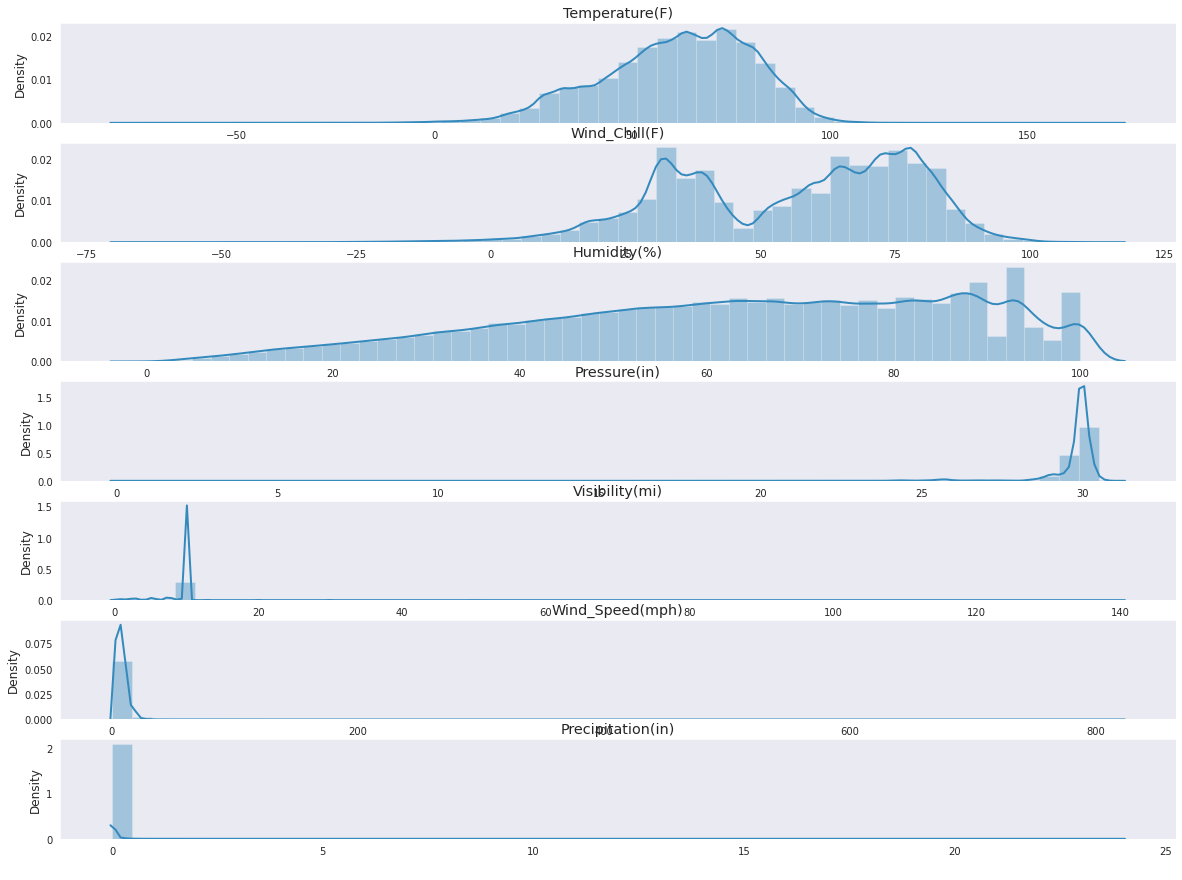

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
f,axes=plt.subplots(7,1,figsize=(20,15))                                   
sns.distplot(X_train['Temperature(F)'],ax=axes[0]).set_title('Temperature(F)')                                                                
sns.distplot(X_train['Wind_Chill(F)'],ax=axes[1]).set_title('Wind_Chill(F)')                              
sns.distplot(X_train['Humidity(%)'],ax=axes[2]).set_title('Humidity(%)')        
sns.distplot(X_train['Pressure(in)'],ax=axes[3]).set_title('Pressure(in)')
sns.distplot(X_train['Visibility(mi)'],ax=axes[4]).set_title('Visibility(mi)') 
sns.distplot(X_train['Wind_Speed(mph)'],ax=axes[5]).set_title('Wind_Speed(mph)')
sns.distplot(X_train['Precipitation(in)'],ax=axes[6]).set_title('Precipitation(in)')
axes[6].set_xlabel('       ')
plt.show()

In [ ]:
for i in categorical_datas[1:]:
  print(i,"has unique value size:", X_test[i].unique().size)

Street has unique value size: 21026
Side has unique value size: 2
City has unique value size: 6842
County has unique value size: 1390
State has unique value size: 49
Zipcode has unique value size: 28978
Timezone has unique value size: 4
Airport_Code has unique value size: 1759
Wind_Direction has unique value size: 10
Weather_Condition has unique value size: 10
Amenity has unique value size: 2
Bump has unique value size: 2
Crossing has unique value size: 2
Give_Way has unique value size: 2
Junction has unique value size: 2
No_Exit has unique value size: 2
Railway has unique value size: 2
Station has unique value size: 2
Stop has unique value size: 2
Traffic_Calming has unique value size: 2
Traffic_Signal has unique value size: 2
Clear has unique value size: 2
Cloud has unique value size: 2
Rain has unique value size: 2
Heavy_Rain has unique value size: 2
Snow has unique value size: 2
Heavy_Snow has unique value size: 2
Fog has unique value size: 2
Hail has unique value size: 2
Drizzle h

In [ ]:
temp_side ={'R':0, 'L':1}                                         
X_train['Side']= X_train.Side.map(temp_side)
X_test['Side']= X_test.Side.map(temp_side)

temp_daytype ={'Weekday':0, 'Weekend':1}         
X_train['Day_Type']= X_train.Day_Type.map(temp_daytype)
X_test['Day_Type']= X_test.Day_Type.map(temp_daytype)

temp_timeofday = {'Early Morning':1,'Morning':2,'Afternoon':3, 'Evening':4} 
X_train['Time_Of_Day']= X_train.Time_Of_Day.map(temp_timeofday)
X_test['Time_Of_Day']= X_test.Time_Of_Day.map(temp_timeofday)      


tonumeric_arr = POI_Time[:-1] + POI_Traffic + POI_Carriagedrive + POI_Weather[:-2] 
X_train[tonumeric_arr] = X_train[tonumeric_arr].apply(pd.to_numeric)
X_test[tonumeric_arr] = X_test[tonumeric_arr].apply(pd.to_numeric)

In [ ]:
X_train_nontreeb = X_train.copy()
X_test_nontreeb = X_test.copy()

X_train_treeb = X_train.copy()
X_test_treeb = X_test.copy()

In [ ]:
#Timezone has unique value size: 4
X_train_nontreeb = pd.get_dummies(X_train_nontreeb, columns=['Timezone'])
X_test_nontreeb = pd.get_dummies(X_test_nontreeb, columns=['Timezone'])
#Season has unique value size: 4
X_train_nontreeb = pd.get_dummies(X_train_nontreeb, columns=['Season'])
X_test_nontreeb = pd.get_dummies(X_test_nontreeb, columns=['Season'])

In [ ]:
!pip install category-encoders
import category_encoders as ce

ce_binary = ce.BinaryEncoder(cols = ['State'])

X_train_nontreeb = ce_binary.fit_transform(X_train_nontreeb, y_train)
X_test_nontreeb = ce_binary.transform(X_test_nontreeb,y_test)

In [ ]:
ce_helmert= ce.HelmertEncoder(cols = ['Wind_Direction','Weather_Condition'])

X_train_nontreeb = ce_helmert.fit_transform(X_train_nontreeb, y_train)
X_test_nontreeb = ce_helmert.transform(X_test_nontreeb,y_test)

In [ ]:
from category_encoders import CatBoostEncoder
ce_catboost= ce.CatBoostEncoder(cols = ['Street', 'City', 'County', 'Zipcode', 'Airport_Code'])

X_train_nontreeb = ce_catboost.fit_transform(X_train_nontreeb, y_train)
X_test_nontreeb = ce_catboost.transform(X_test_nontreeb,y_test)

In [ ]:
def cyc_encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [ ]:
X_train_nontreeb = cyc_encode(X_train_nontreeb, 'Minute', 1439)
X_train_nontreeb = cyc_encode(X_train_nontreeb, 'Day', 365)
X_train_nontreeb = cyc_encode(X_train_nontreeb, 'Month', 23.0)
X_train_nontreeb = cyc_encode(X_train_nontreeb, 'Hour', 365)

X_test_nontreeb = cyc_encode(X_test_nontreeb, 'Minute', 1439)
X_test_nontreeb = cyc_encode(X_test_nontreeb, 'Day', 365)
X_test_nontreeb = cyc_encode(X_test_nontreeb, 'Month', 23.0)
X_test_nontreeb = cyc_encode(X_test_nontreeb, 'Hour', 365)

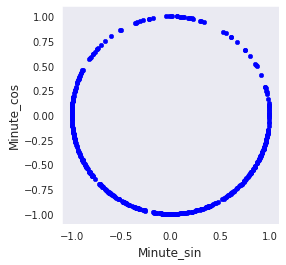

In [ ]:
X_train_nontreeb.sample(500).plot.scatter('Minute_sin','Minute_cos').set_aspect('equal');

In [ ]:
X_train_nontreeb.drop('intercept', inplace=True, axis = 1)
X_test_nontreeb.drop('intercept', inplace=True, axis = 1)
X_train_nontreeb.drop(['Minute','Hour','Day','Month'], inplace=True, axis = 1)
X_test_nontreeb.drop(['Minute','Hour','Day','Month'], inplace=True, axis = 1)

In [ ]:
data = X_train_nontreeb[numerical_weather]
dataT = X_test_nontreeb[numerical_weather]

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=False)
data_fitted = pt.fit_transform(data)
dataT_fitted = pt.transform(dataT)

suffix = '_yeojohnson'
columns = [x + suffix for x in numerical_weather]

data_fitted_frame = pd.DataFrame(data_fitted, columns=columns)
dataT_fitted_frame = pd.DataFrame(dataT_fitted, columns=columns)

for i in columns:
    X_train_nontreeb[i] = data_fitted_frame[i].values
    X_test_nontreeb[i] =  dataT_fitted_frame[i].values

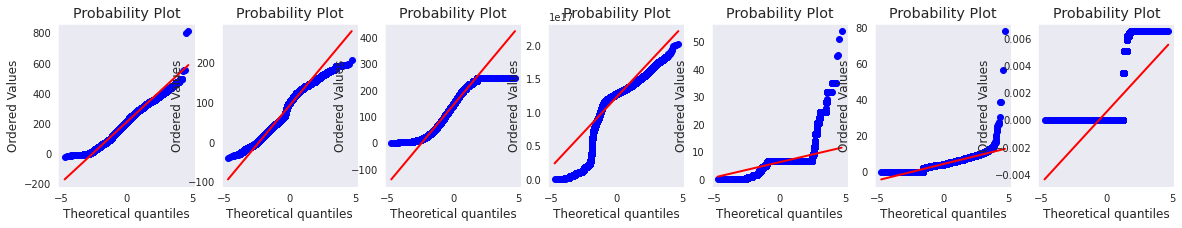

In [ ]:
f,axes=plt.subplots(1,7,figsize=(20,3))

ax1 = plt.subplot(171)
res = stats.probplot(X_train_nontreeb['Temperature(F)_yeojohnson'], plot=sns.mpl.pyplot)
ax2 = plt.subplot(172)
res = stats.probplot(X_train_nontreeb['Wind_Chill(F)_yeojohnson'], plot=sns.mpl.pyplot)
ax3 = plt.subplot(173)
res = stats.probplot(X_train_nontreeb['Humidity(%)_yeojohnson'], plot=sns.mpl.pyplot)
ax4 = plt.subplot(174)
res = stats.probplot(X_train_nontreeb['Pressure(in)_yeojohnson'], plot=sns.mpl.pyplot)
ax5 = plt.subplot(175)
res = stats.probplot(X_train_nontreeb['Visibility(mi)_yeojohnson'], plot=sns.mpl.pyplot)
ax6 = plt.subplot(176)
res = stats.probplot(X_train_nontreeb['Wind_Speed(mph)_yeojohnson'], plot=sns.mpl.pyplot)
ax7 = plt.subplot(177)
res = stats.probplot(X_train_nontreeb['Precipitation(in)_yeojohnson'], plot=sns.mpl.pyplot)

Feature ranking:
1. feature 15 (0.059497)
2. feature 3 (0.054050)
3. feature 6 (0.052470)
4. feature 2 (0.050649)
5. feature 14 (0.046937)
6. feature 5 (0.046802)
7. feature 1 (0.045706)
8. feature 82 (0.036619)
9. feature 0 (0.035225)
10. feature 81 (0.028533)
11. feature 83 (0.024773)
12. feature 19 (0.024666)
13. feature 92 (0.024552)
14. feature 84 (0.023515)
15. feature 53 (0.022664)
16. feature 16 (0.021450)
17. feature 89 (0.021366)
18. feature 18 (0.020904)
19. feature 91 (0.020854)
20. feature 17 (0.020228)
21. feature 90 (0.020224)
22. feature 52 (0.019933)
23. feature 88 (0.019841)
24. feature 87 (0.019716)
25. feature 94 (0.017718)
26. feature 30 (0.017688)
27. feature 85 (0.011270)
28. feature 86 (0.010801)
29. feature 12 (0.008024)
30. feature 72 (0.007813)
31. feature 71 (0.007106)
32. feature 4 (0.006331)
33. feature 76 (0.006323)
34. feature 10 (0.006269)
35. feature 23 (0.005742)
36. feature 20 (0.005730)
37. feature 93 (0.005721)
38. feature 24 (0.005501)
39. feature

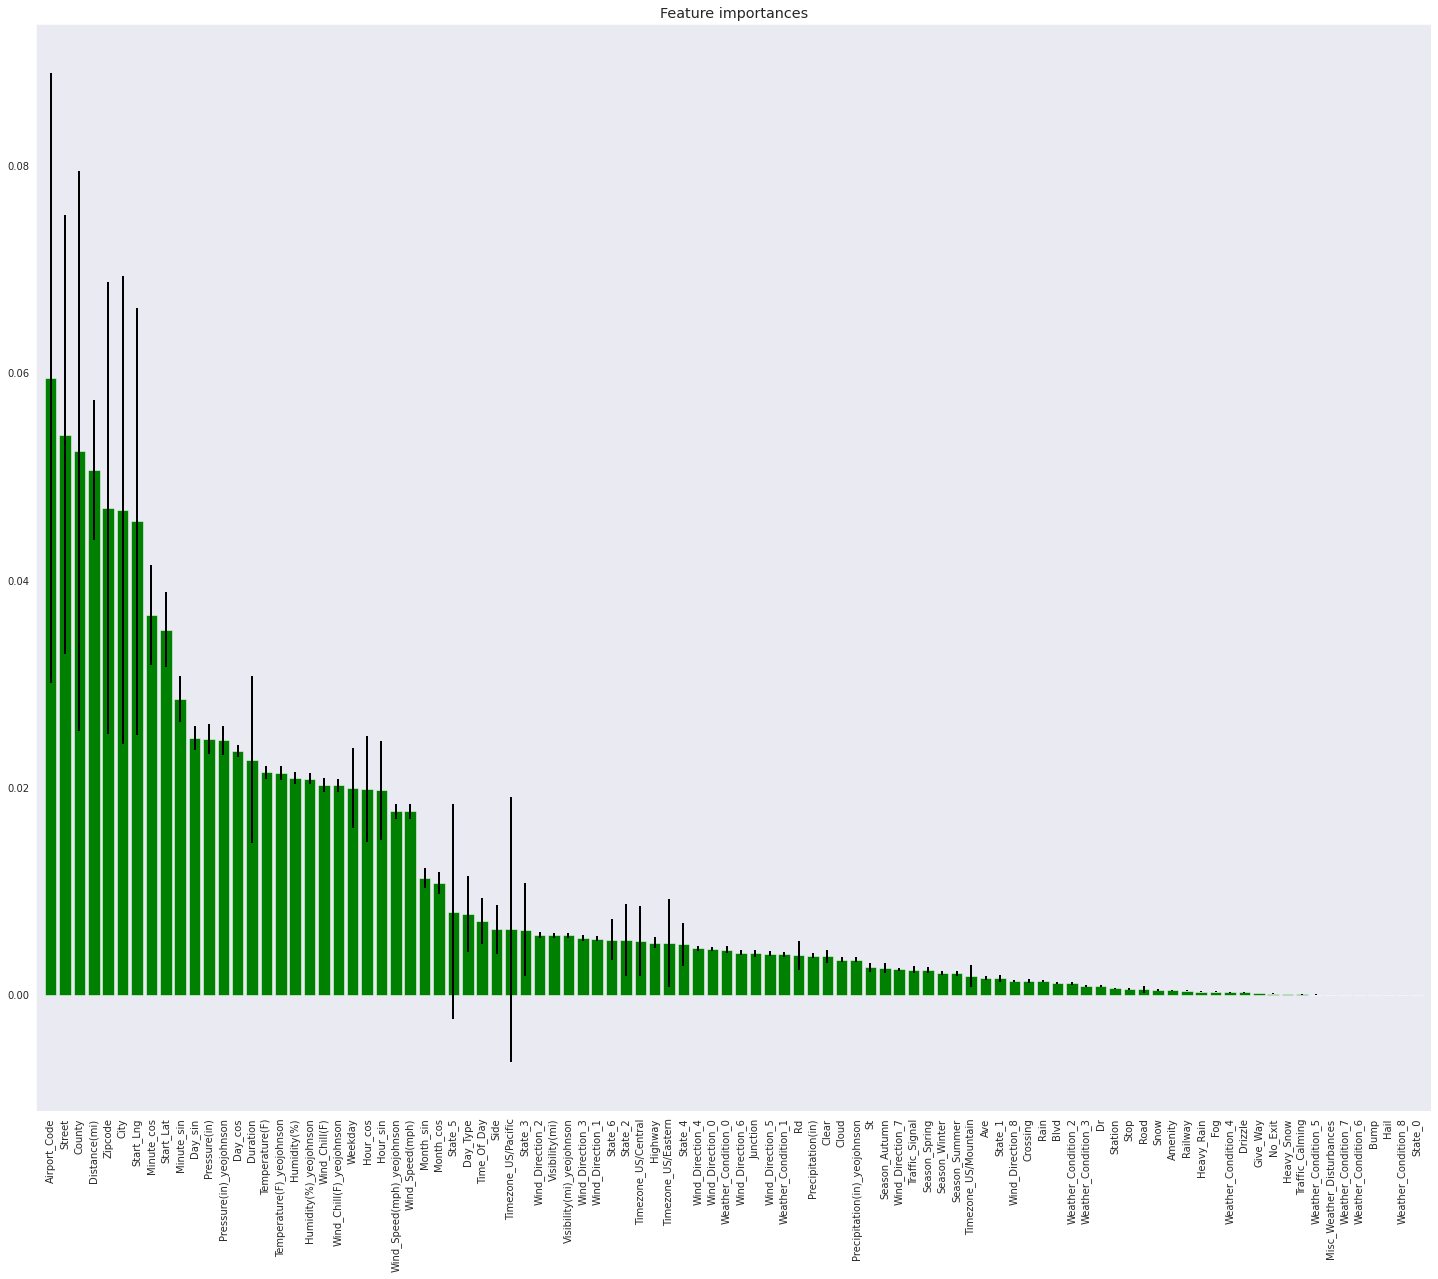

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()      
clr_rf = clf_rf.fit(X_train_nontreeb,y_train)

importances = clf_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_nontreeb.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(25,20))
plt.title("Feature importances")
plt.bar(range(X_train_nontreeb.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train_nontreeb.shape[1]), X_train_nontreeb.columns[indices],rotation=90)
plt.xlim([-1, X_train_nontreeb.shape[1]])
plt.show()

In [ ]:
X_train_nontreeb.drop(['Wind_Speed(mph)','Temperature(F)_yeojohnson','Wind_Chill(F)_yeojohnson','Humidity(%)_yeojohnson','Pressure(in)','Visibility(mi)','Precipitation(in)_yeojohnson'],axis=1,inplace=True)

X_train_nontreeb.drop(['Rain', 'Cloud', 'Snow', 'Fog', 'Clear', 'Drizzle','Misc_Weather_Disturbances', 'Hail', 'Heavy_Rain', 'Heavy_Snow'],axis=1,inplace=True)


X_test_nontreeb.drop(['Wind_Speed(mph)','Temperature(F)_yeojohnson','Wind_Chill(F)_yeojohnson','Humidity(%)_yeojohnson','Pressure(in)','Visibility(mi)','Precipitation(in)_yeojohnson'],axis=1,inplace=True)

X_test_nontreeb.drop(['Rain', 'Cloud', 'Snow', 'Fog', 'Clear', 'Drizzle','Misc_Weather_Disturbances', 'Hail', 'Heavy_Rain', 'Heavy_Snow'],axis=1,inplace=True)

In [ ]:
X_train_nontreeb.drop(['St','Traffic_Signal','Wind_Direction_7','State_1','Season_Spring','Ave','Season_Winter','Season_Summer','Season_Autumn','Crossing','Wind_Direction_8','Weather_Condition_2','Blvd','Weather_Condition_3','Dr','Station','Road','Stop','Amenity','Railway','Weather_Condition_4','Give_Way','No_Exit','Traffic_Calming','Weather_Condition_5','Weather_Condition_5','Weather_Condition_7','Bump','Weather_Condition_8','State_0'],axis=1,inplace=True)
X_test_nontreeb.drop(['St','Traffic_Signal','Wind_Direction_7','State_1','Season_Spring','Ave','Season_Winter','Season_Summer','Season_Autumn','Crossing','Wind_Direction_8','Weather_Condition_2','Blvd','Weather_Condition_3','Dr','Station','Road','Stop','Amenity','Railway','Weather_Condition_4','Give_Way','No_Exit','Traffic_Calming','Weather_Condition_5','Weather_Condition_5','Weather_Condition_7','Bump','Weather_Condition_8','State_0'],axis=1,inplace=True)

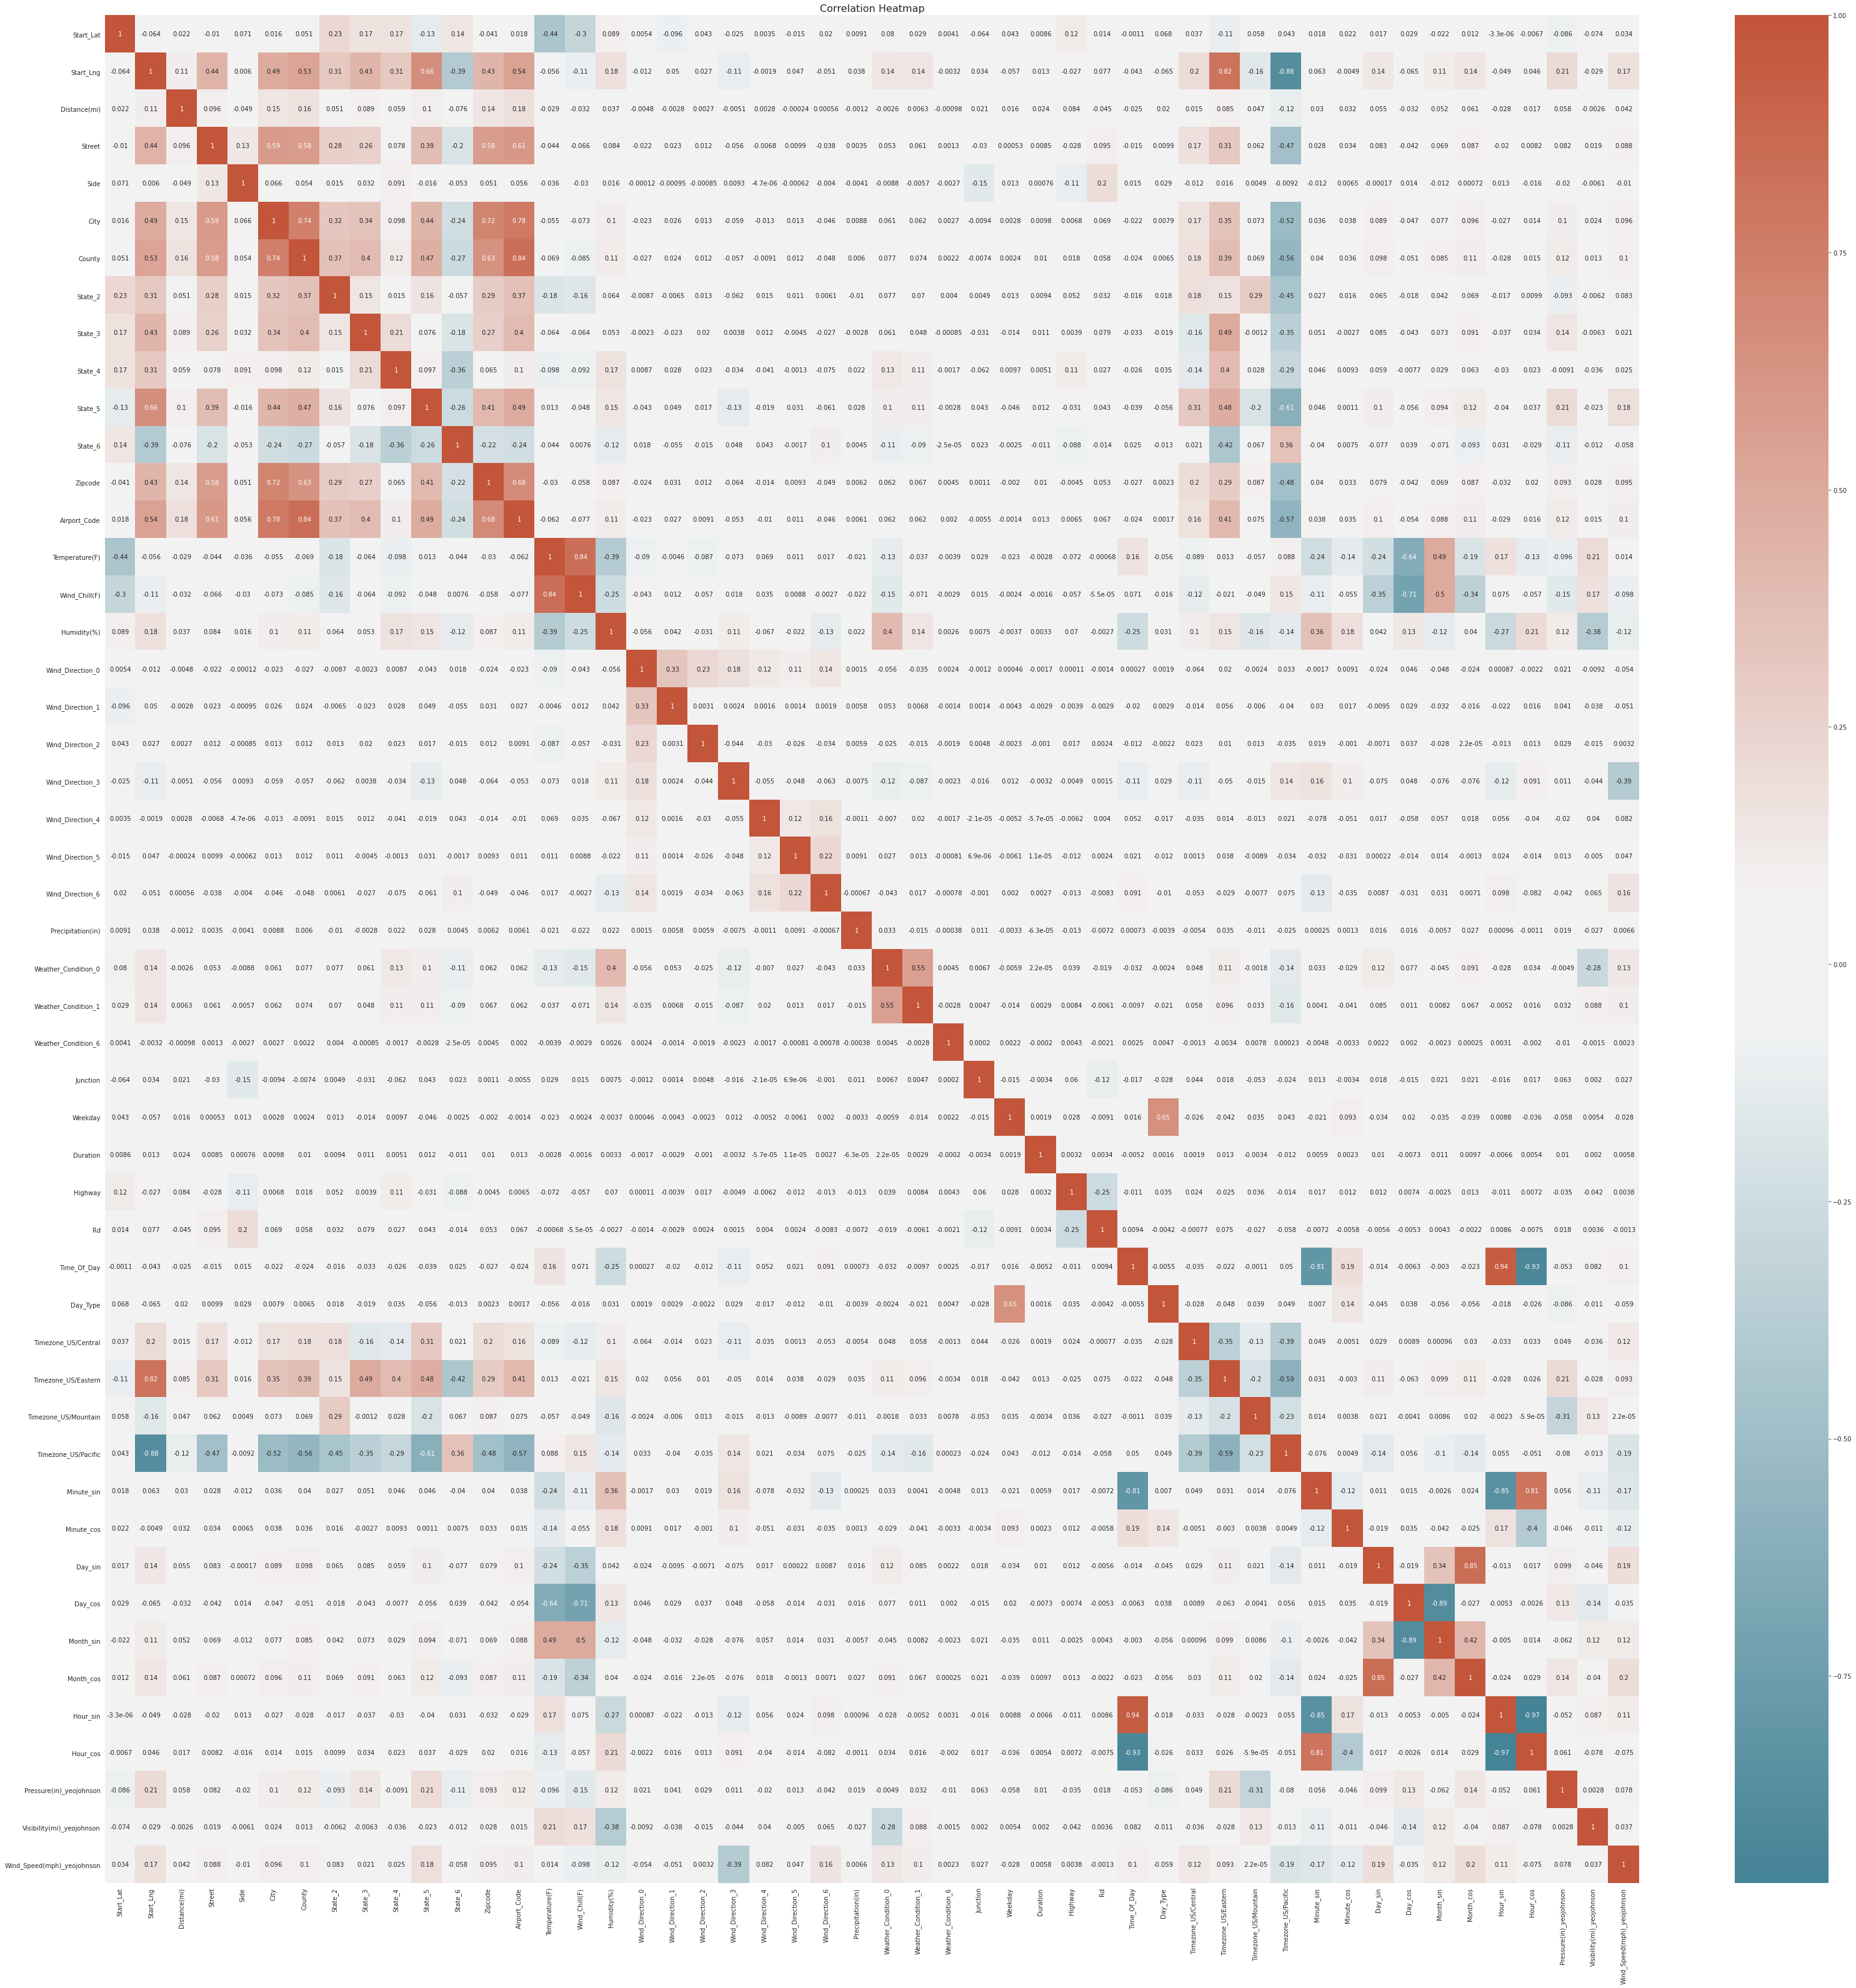

In [ ]:
df_sevconc_nontreeb = pd.concat([X_train_nontreeb, y_train], axis=1)

plt.figure(figsize=(55,55))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(df_sevconc_nontreeb.corr(), annot=True,cmap=cmap, center=0).set_title("Correlation Heatmap", fontsize=16)
plt.show()

In [ ]:
def detect_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "<->", row.values[0], ":", round(val[0][0], 2))
                drop_cols.append(col.values[0])


In [ ]:
detect_collinear_features(X_train_nontreeb,0.75)

Airport_Code <-> City : 0.78
Airport_Code <-> County : 0.84
Wind_Chill(F) <-> Temperature(F) : 0.84
Timezone_US/Eastern <-> Start_Lng : 0.82
Timezone_US/Pacific <-> Start_Lng : 0.88
Minute_sin <-> Time_Of_Day : 0.81
Month_sin <-> Day_cos : 0.89
Month_cos <-> Day_sin : 0.85
Hour_sin <-> Time_Of_Day : 0.94
Hour_sin <-> Minute_sin : 0.85
Hour_cos <-> Time_Of_Day : 0.93
Hour_cos <-> Minute_sin : 0.81
Hour_cos <-> Hour_sin : 0.97


In [ ]:
X_train_nontreeb.drop(['Hour_cos','Hour_sin','Month_cos','Month_sin','Time_Of_Day','Wind_Chill(F)','Timezone_US/Eastern','Timezone_US/Pacific'],axis=1,inplace=True)
X_test_nontreeb.drop(['Hour_cos','Hour_sin','Month_cos','Month_sin','Time_Of_Day','Wind_Chill(F)','Timezone_US/Eastern','Timezone_US/Pacific'],axis=1,inplace=True)

In [ ]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif =[variance_inflation_factor(X_train_nontreeb.values, i) for i in range(X_train_nontreeb.shape[1])]
vif = pd.DataFrame(vif, index=X_train_nontreeb.columns, columns=['VIF_value'])

CPU times: user 6min 45s, sys: 33.7 s, total: 7min 19s
Wall time: 4min 2s


In [ ]:
vif 

VIF_value
Start_Lat                    0.298720
Start_Lng                    0.395768
Distance(mi)                 1.003610
Street                       0.319468
Side                         0.992280
City                         0.339383
County                       0.334377
State_2                      0.970163
State_3                      1.019652
State_4                      0.971017
State_5                      1.042308
State_6                      0.905838
Zipcode                      0.301572
Airport_Code                 0.371329
Temperature(F)               0.657045
Humidity(%)                  0.857698
Wind_Direction_0             0.995263
Wind_Direction_1             1.000018
Wind_Direction_2             1.000585
Wind_Direction_3             0.999995
Wind_Direction_4             0.998788
Wind_Direction_5             0.991497
Wind_Direction_6             0.995022
Precipitation(in)            1.000271
Weather_Condition_0          0.990163
Weather_Condition_1          0.999828
Weather_Condition_6          0.027040
Junction                     1.003342
Weekday                      0.905631
Duration                     1.000102
Highway                      0.959609
Rd                           0.998907
Day_Type                     0.983209
Timezone_US/Central          1.000528
Timezone_US/Mountain         0.968810
Minute_sin                   0.994862
Minute_cos                   0.999217
Day_sin                      0.991591
Day_cos                      1.004997
Pressure(in)_yeojohnson     33.135487
Visibility(mi)_yeojohnson    0.654061
Wind_Speed(mph)_yeojohnson   0.885442

In [ ]:
reduce_mem(X_train_nontreeb)
reduce_mem(X_test_nontreeb)
#save
#X_train_nontreeb.to_csv('/content/drive/MyDrive/X_train_nontreeb.csv',index=False)
#X_test_nontreeb.to_csv('/content/drive/MyDrive/X_test_nontreeb.csv',index=False)
#y_train.to_csv('/content/drive/MyDrive/y_train.csv',index=False)
#y_test.to_csv('/content/drive/MyDrive/y_test.csv',index=False)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

tsne_data = pd.concat([X_train_nontreeb, y_train], axis=1)
tsne_data = tsne_data.sample(1000)

X_train_nontreeb_pca = sc.fit_transform(X_train_nontreeb)
X_test_nontreeb_pca = sc.transform(X_test_nontreeb)

X_train_nontreeb = sc.fit_transform(X_train_nontreeb)
X_test_nontreeb = sc.transform(X_test_nontreeb)

-- Mem. usage decreased to 94.39 Mb (41.4% reduction),time spend:0.01 min
-- Mem. usage decreased to 23.60 Mb (41.4% reduction),time spend:0.00 min


In [ ]:
from sklearn.decomposition import PCA 
  
pca = PCA() 
X_train_nontreeb_pca = pca.fit_transform(X_train_nontreeb_pca) 
X_test_nontreeb_pca = pca.transform(X_test_nontreeb_pca) 

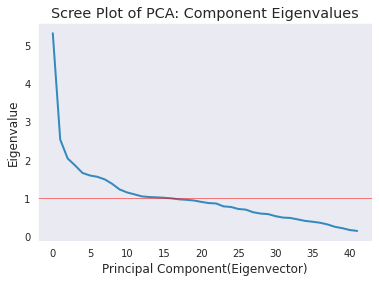

In [ ]:
from matplotlib.pyplot import figure, show
from matplotlib.ticker import MaxNLocator

ax = figure().gca()
ax.plot(pca.explained_variance_)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Principal Component(Eigenvector)')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, linewidth=1, color='r', alpha=0.5)
plt.title('Scree Plot of PCA: Component Eigenvalues')
plt.show()

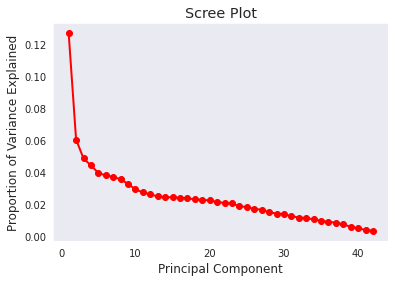

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

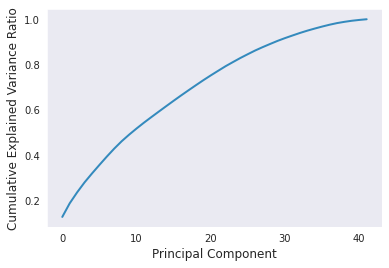

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [ ]:
pca = PCA(n_components=15) 
X_train_nontreeb_pca = pca.fit_transform(X_train_nontreeb_pca) 
X_test_nontreeb_pca = pca.transform(X_test_nontreeb_pca) 

X_test_nontreeb_pca.shape , X_train_nontreeb_pca.shape

((145556, 15), (582221, 15))

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(tsne_data)

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=tsne_data.Severity, labels={'color': 'Severity'}
)
fig.update_traces(marker_size=8)
fig.show()

In [ ]:
from category_encoders import CatBoostEncoder
ce_catboost= ce.CatBoostEncoder(cols = ['Season','Timezone','Wind_Direction','Weather_Condition','State','Street', 'City', 'County', 'Zipcode', 'Airport_Code'])

X_train_treeb = ce_catboost.fit_transform(X_train_treeb, y_train)
X_test_treeb = ce_catboost.transform(X_test_treeb,y_test)

In [ ]:
freq_list = ['Month','Day','Hour','Minute']           
for i in freq_list:
  newname = i + '_Freq'
  X_train_treeb[newname] = X_train_treeb.groupby([i])[i].transform('count')
  X_train_treeb[newname] = X_train_treeb[newname]/X_train_treeb.shape[0]*X_train_treeb[i].unique().size
  
  X_test_treeb[newname] = X_test_treeb.groupby([i])[i].transform('count')
  X_test_treeb[newname] = X_test_treeb[newname]/X_test_treeb.shape[0]*X_test_treeb[i].unique().size

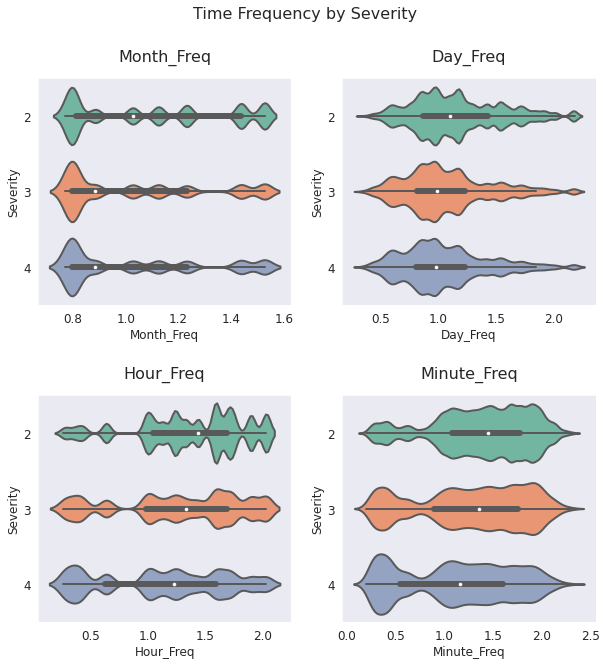

In [ ]:
df_sevconc = pd.concat([X_train_treeb, y_train], axis=1)

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))
plt.subplots_adjust(hspace=0.4,wspace = 0.2)
fig.suptitle('Time Frequency by Severity ', fontsize=16)
for i, feature in enumerate(freq_list, 1): 
    feature = feature + '_Freq'   
    plt.subplot(2, 2, i)
    sns.violinplot(x=feature, y="Severity", data=df_sevconc, palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Severity', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)

    plt.title('{}'.format(feature), size=16, y=1.05)
plt.show()

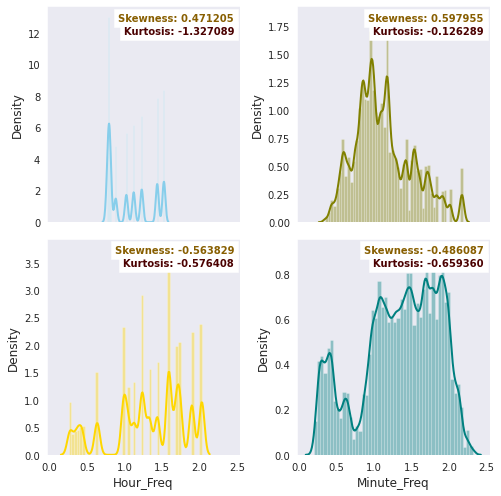

In [ ]:
freq_enc_list = ['Month_Freq','Day_Freq','Hour_Freq','Minute_Freq']

data = X_train_treeb[freq_enc_list]

f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(data.iloc[:,0], color="skyblue", ax=axes[0,0])
sns.distplot(data.iloc[:,1], color="olive", ax=axes[0,1])
sns.distplot(data.iloc[:,2], color="gold", ax=axes[1,0])
sns.distplot(data.iloc[:,3], color="teal", ax=axes[1,1])
for i, ax in enumerate(axes.reshape(-1)):
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % data.iloc[:,i].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % data.iloc[:,i].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
plt.tight_layout()

In [ ]:
data = X_train_treeb[freq_enc_list]
dataT = X_test_treeb[freq_enc_list]

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox', standardize=False)
data_fitted = pt.fit_transform(data)
dataT_fitted = pt.transform(dataT)
suffix = '_boxcox'
columns = [x + suffix for x in freq_enc_list]
data_fitted_frame = pd.DataFrame(data_fitted, columns=columns)
dataT_fitted_frame = pd.DataFrame(dataT_fitted, columns=columns)

for i in columns:
    X_train_treeb[i] = data_fitted_frame[i].values
    X_test_treeb[i] =  dataT_fitted_frame[i].values

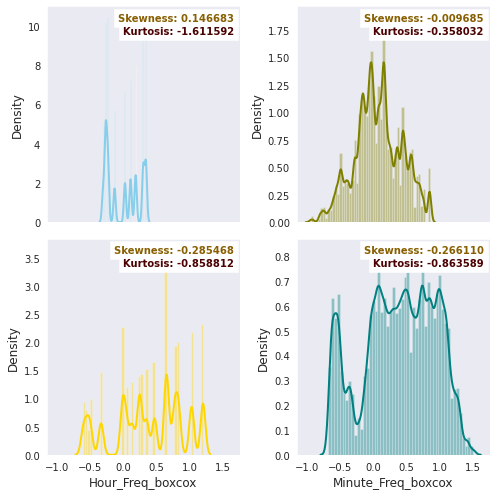

In [ ]:
freq_enc_boxcox_list = ['Month_Freq_boxcox','Day_Freq_boxcox','Hour_Freq_boxcox','Minute_Freq_boxcox']

data = X_train_treeb[freq_enc_boxcox_list]

f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(data.iloc[:,0], color="skyblue", ax=axes[0,0])
sns.distplot(data.iloc[:,1], color="olive", ax=axes[0,1])
sns.distplot(data.iloc[:,2], color="gold", ax=axes[1,0])
sns.distplot(data.iloc[:,3], color="teal", ax=axes[1,1])
for i, ax in enumerate(axes.reshape(-1)):
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % data.iloc[:,i].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % data.iloc[:,i].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
plt.tight_layout()

In [ ]:
freq_enc_list = ['Month_Freq','Day_Freq','Hour_Freq','Minute_Freq']
data = X_train_treeb[freq_enc_list]
dataT = X_test_treeb[freq_enc_list]

mu, sigma = 0, 0.1 
noise = np.random.normal(mu, sigma, [582221 ,4]) 
noiseT = np.random.normal(mu, sigma, [145556 ,4]) 

data_noise = data + noise
data_noiseT = dataT + noiseT

columns = ['Month_Freq_noise','Day_Freq_noise','Hour_Freq_noise','Minute_Freq_noise']
data_noise.columns = columns
data_noiseT.columns = columns

for i in columns:
    X_train_treeb[i] = data_noise[i].values
    X_test_treeb[i] =  data_noiseT[i].values

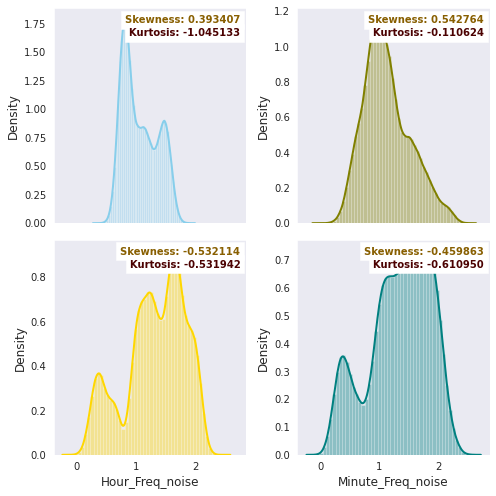

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(data_noise.iloc[:,0], color="skyblue", ax=axes[0,0])
sns.distplot(data_noise.iloc[:,1], color="olive", ax=axes[0,1])
sns.distplot(data_noise.iloc[:,2], color="gold", ax=axes[1,0])
sns.distplot(data_noise.iloc[:,3], color="teal", ax=axes[1,1])
for i, ax in enumerate(axes.reshape(-1)):
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % data_noise.iloc[:,i].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % data_noise.iloc[:,i].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
plt.tight_layout()

In [ ]:
data = X_train_treeb[numerical_weather]
dataT = X_test_treeb[numerical_weather]

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=False)
data_fitted = pt.fit_transform(data)
dataT_fitted = pt.transform(dataT)

suffix = '_yeojohnson'
columns = [x + suffix for x in numerical_weather]

data_fitted_frame = pd.DataFrame(data_fitted, columns=columns)
dataT_fitted_frame = pd.DataFrame(dataT_fitted, columns=columns)

for i in columns:
    X_train_treeb[i] = data_fitted_frame[i].values
    X_test_treeb[i] =  dataT_fitted_frame[i].values

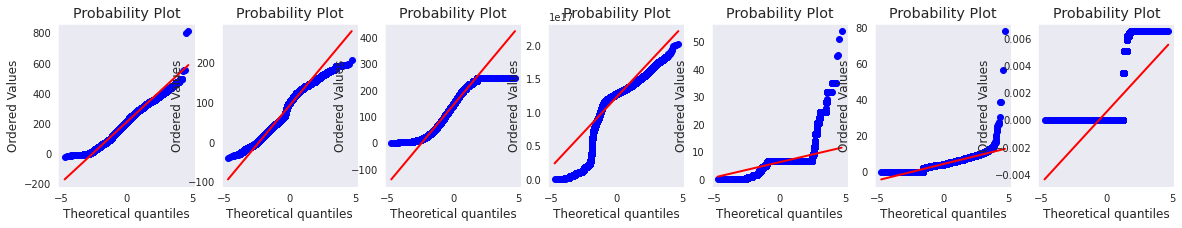

In [ ]:
f,axes=plt.subplots(1,7,figsize=(20,3))

ax1 = plt.subplot(171)
res = stats.probplot(X_train_treeb['Temperature(F)_yeojohnson'], plot=sns.mpl.pyplot)
ax2 = plt.subplot(172)
res = stats.probplot(X_train_treeb['Wind_Chill(F)_yeojohnson'], plot=sns.mpl.pyplot)
ax3 = plt.subplot(173)
res = stats.probplot(X_train_treeb['Humidity(%)_yeojohnson'], plot=sns.mpl.pyplot)
ax4 = plt.subplot(174)
res = stats.probplot(X_train_treeb['Pressure(in)_yeojohnson'], plot=sns.mpl.pyplot)
ax5 = plt.subplot(175)
res = stats.probplot(X_train_treeb['Visibility(mi)_yeojohnson'], plot=sns.mpl.pyplot)
ax6 = plt.subplot(176)
res = stats.probplot(X_train_treeb['Wind_Speed(mph)_yeojohnson'], plot=sns.mpl.pyplot)
ax7 = plt.subplot(177)
res = stats.probplot(X_train_treeb['Precipitation(in)_yeojohnson'], plot=sns.mpl.pyplot)

Feature ranking:
1. feature 10 (0.051418)
2. feature 3 (0.050127)
3. feature 7 (0.045909)
4. feature 6 (0.045796)
5. feature 2 (0.044623)
6. feature 5 (0.043357)
7. feature 8 (0.041761)
8. feature 1 (0.039454)
9. feature 9 (0.032934)
10. feature 0 (0.030144)
11. feature 35 (0.023550)
12. feature 68 (0.021635)
13. feature 67 (0.021589)
14. feature 60 (0.021153)
15. feature 64 (0.020920)
16. feature 36 (0.020382)
17. feature 16 (0.020174)
18. feature 72 (0.019582)
19. feature 14 (0.019561)
20. feature 19 (0.019513)
21. feature 55 (0.019344)
22. feature 65 (0.019086)
23. feature 66 (0.019049)
24. feature 33 (0.018309)
25. feature 58 (0.017483)
26. feature 62 (0.017241)
27. feature 69 (0.016762)
28. feature 11 (0.016690)
29. feature 13 (0.016172)
30. feature 71 (0.016136)
31. feature 12 (0.016047)
32. feature 70 (0.015922)
33. feature 32 (0.014386)
34. feature 17 (0.013774)
35. feature 74 (0.013646)
36. feature 59 (0.011357)
37. feature 34 (0.010828)
38. feature 63 (0.010774)
39. feature 6

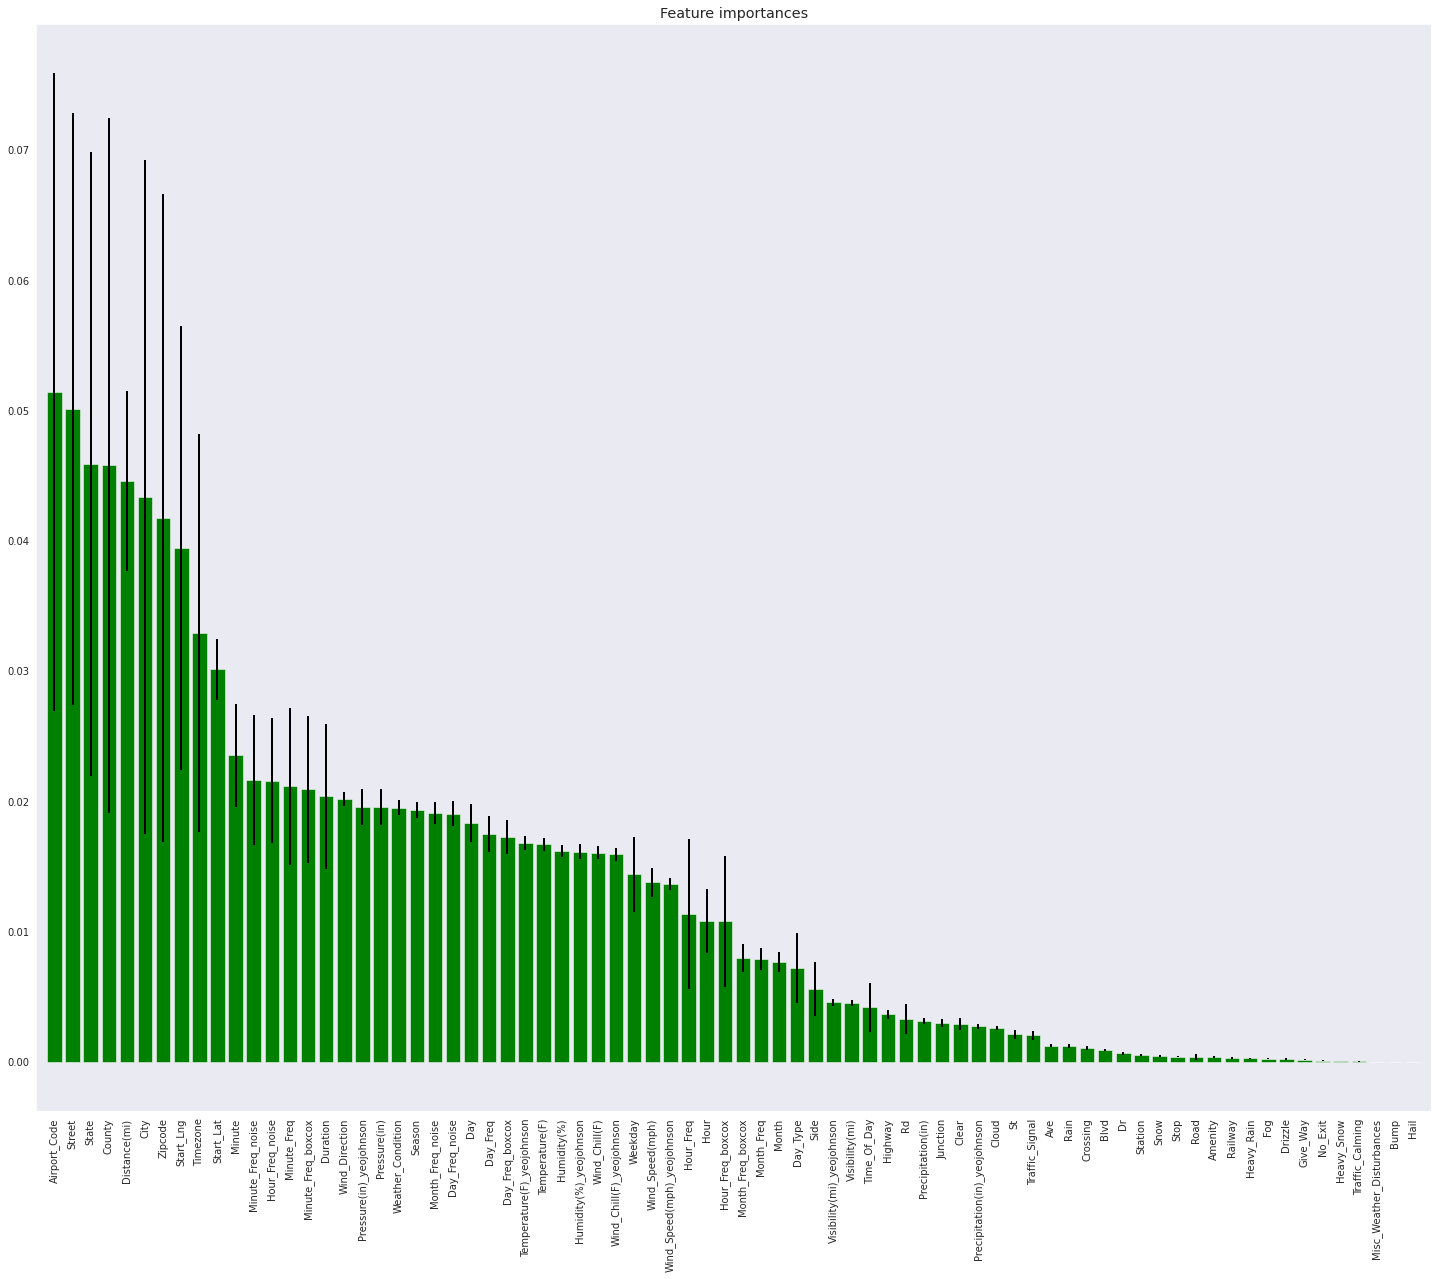

In [ ]:
clf_rf = RandomForestClassifier()      
clr_rf = clf_rf.fit(X_train_treeb,y_train)

importances = clf_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_train_treeb.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


plt.figure(1, figsize=(25,20))
plt.title("Feature importances")
plt.bar(range(X_train_treeb.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train_treeb.shape[1]), X_train_treeb.columns[indices],rotation=90)
plt.xlim([-1, X_train_treeb.shape[1]])
plt.show()

In [ ]:
X_train_treeb.drop(['Month','Hour','Minute_Freq','Month_Freq','Day_Freq','Hour_Freq','Hour_Freq_boxcox','Month_Freq_boxcox','Day_Freq_boxcox','Minute_Freq_boxcox','Minute_Freq_noise','Day_Freq_noise'],axis=1,inplace=True)

X_train_treeb.drop(['Wind_Speed(mph)_yeojohnson','Temperature(F)','Wind_Chill(F)_yeojohnson','Humidity(%)_yeojohnson','Pressure(in)','Visibility(mi)','Precipitation(in)_yeojohnson'],axis=1,inplace=True)

X_train_treeb.drop(['Rain', 'Cloud', 'Snow', 'Fog', 'Clear', 'Drizzle','Misc_Weather_Disturbances', 'Hail', 'Heavy_Rain', 'Heavy_Snow'],axis=1,inplace=True)



X_test_treeb.drop(['Month','Hour','Minute_Freq','Month_Freq','Day_Freq','Hour_Freq','Hour_Freq_boxcox','Month_Freq_boxcox','Day_Freq_boxcox','Minute_Freq_boxcox','Minute_Freq_noise','Day_Freq_noise'],axis=1,inplace=True)

X_test_treeb.drop(['Wind_Speed(mph)_yeojohnson','Temperature(F)','Wind_Chill(F)_yeojohnson','Humidity(%)_yeojohnson','Pressure(in)','Visibility(mi)','Precipitation(in)_yeojohnson'],axis=1,inplace=True)

X_test_treeb.drop(['Rain', 'Cloud', 'Snow', 'Fog', 'Clear', 'Drizzle','Misc_Weather_Disturbances', 'Hail', 'Heavy_Rain', 'Heavy_Snow'],axis=1,inplace=True)

In [ ]:
X_train_treeb.drop(['Ave','Crossing','Precipitation(in)','Road','Blvd','Station','Dr','Stop','Amenity','Railway','Give_Way','No_Exit','Traffic_Calming','Bump'],axis=1,inplace=True)
X_test_treeb.drop(['Ave','Crossing','Precipitation(in)','Road','Blvd','Station','Dr','Stop','Amenity','Railway','Give_Way','No_Exit','Traffic_Calming','Bump'],axis=1,inplace=True)

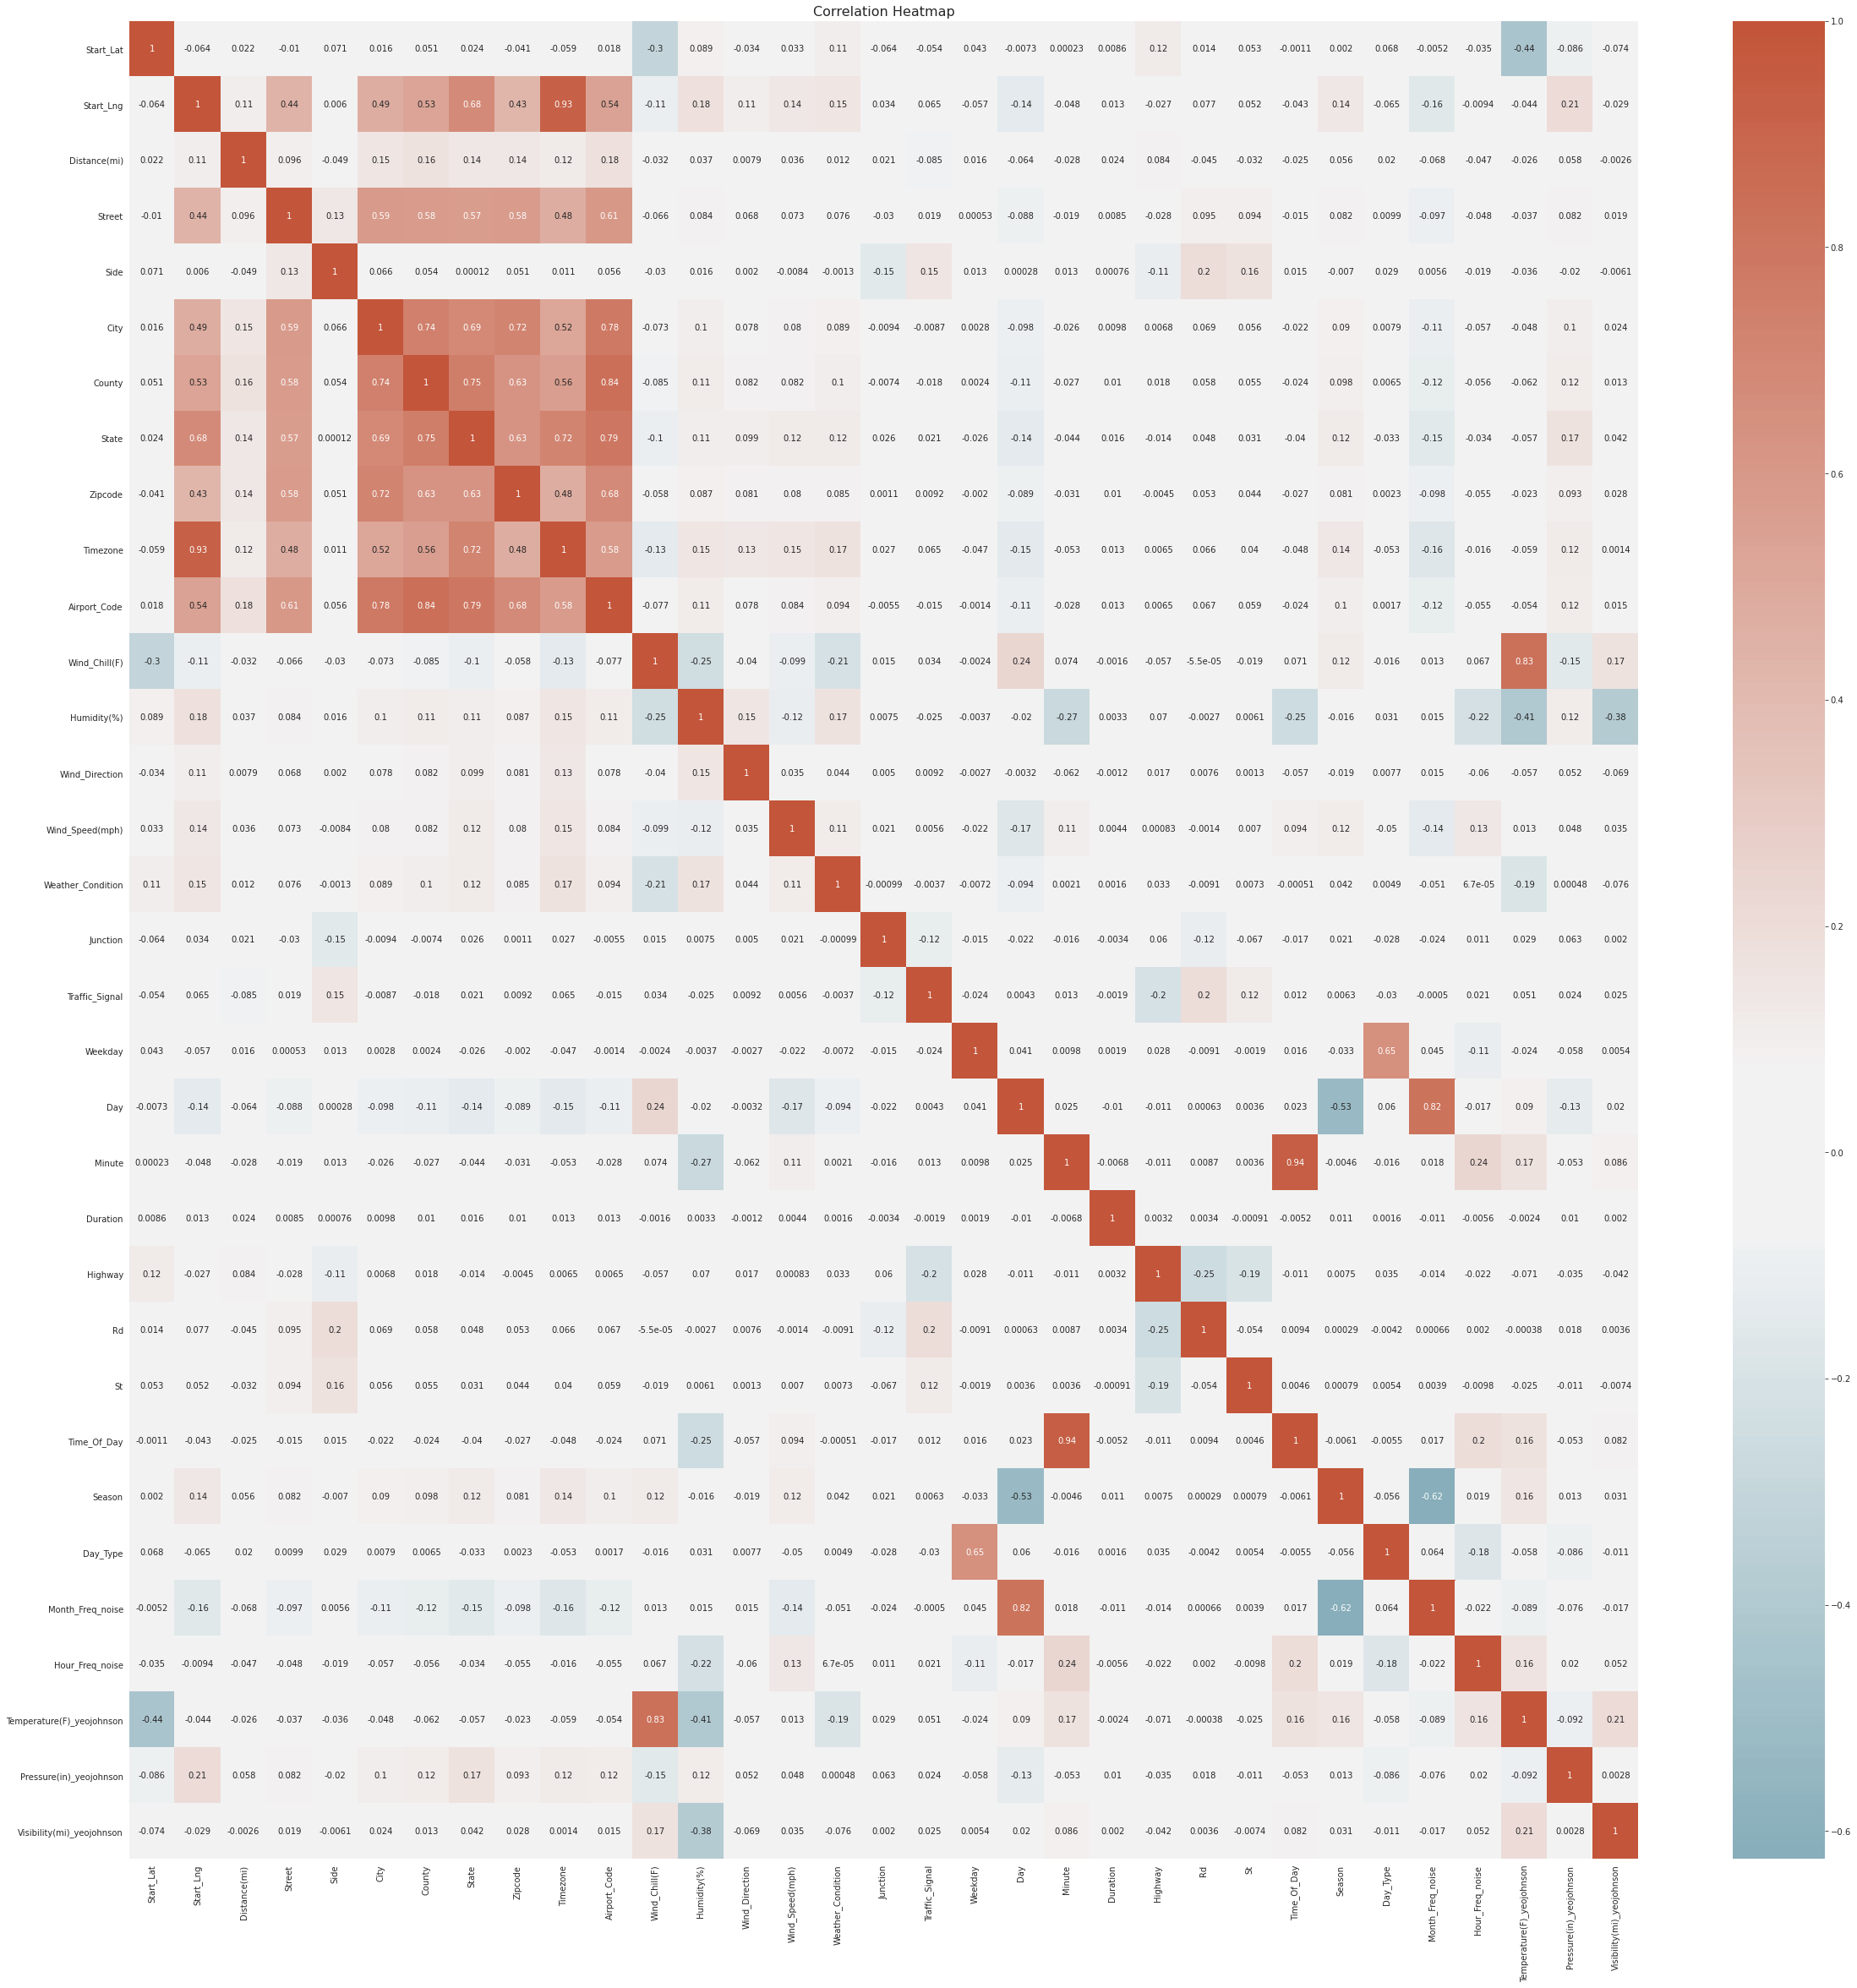

In [ ]:
df_sevconc_treeb = pd.concat([X_train_treeb, y_train], axis=1)

plt.figure(figsize=(40,40))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(df_sevconc_treeb.corr(), annot=True,cmap=cmap, center=0).set_title("Correlation Heatmap", fontsize=16)
plt.show()

In [ ]:
detect_collinear_features(X_train_treeb,0.95)

In [ ]:
%%time
vif = [variance_inflation_factor(X_train_treeb.values, i) for i in range(X_train_treeb.shape[1])]
vif = pd.DataFrame(vif, index=X_train_treeb.columns, columns=['VIF_value'])

CPU times: user 3min 21s, sys: 23.4 s, total: 3min 45s
Wall time: 2min 4s


In [ ]:
vif 

VIF_value
Start_Lat                   0.354291
Start_Lng                   0.473015
Distance(mi)                1.003830
Street                      0.377490
Side                        0.995111
City                        0.397727
County                      0.392307
State                       0.343565
Zipcode                     0.356443
Timezone                    0.196622
Airport_Code                0.431079
Wind_Chill(F)               0.813128
Humidity(%)                 0.858612
Wind_Direction              0.006488
Wind_Speed(mph)             0.976578
Weather_Condition           0.004546
Junction                    1.003347
Traffic_Signal              1.000375
Weekday                     0.928637
Day                         0.857101
Minute                      0.875194
Duration                    1.000141
Highway                     0.966736
Rd                          0.999614
St                          0.997025
Time_Of_Day                 8.434124
Season                      0.016962
Day_Type                    0.986434
Month_Freq_noise            0.703868
Hour_Freq_noise             0.965614
Temperature(F)_yeojohnson   0.866189
Pressure(in)_yeojohnson    31.156153
Visibility(mi)_yeojohnson   0.745922

In [ ]:
reduce_mem(X_train_treeb)
reduce_mem(X_test_treeb)
#save
#X_train_treeb.to_csv('/content/drive/MyDrive/X_train_treeb.csv',index=False)
#X_test_treeb.to_csv('/content/drive/MyDrive/X_test_treeb.csv',index=False)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_treeb = sc.fit_transform(X_train_treeb)
X_test_treeb = sc.transform (X_test_treeb)

-- Mem. usage decreased to 97.73 Mb (34.3% reduction),time spend:0.01 min
-- Mem. usage decreased to 24.43 Mb (34.3% reduction),time spend:0.00 min


In [ ]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()